In [6]:
#bibliotecas padrao
import pandas as pd
import numpy as np
import scipy as sci

from scipy.stats import pearsonr, spearmanr
import statistics as std
from windrose import WindroseAxes

#biblioteca para manipulacao de datas
from astropy.time import Time

#biblioteca para plot estatico
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import matplotlib.ticker as mtick 
#from matplotlib.ticker import PercentFormatter 

#biblioteca para plot interativo
#import chart_studio.plotly as py 
#import chart_studio.tools as tls
#import plotly.graph_objects as go
#import cufflinks as cf

In [151]:
plt.rcParams['figure.figsize'] = 10,7  #tamanho da figura de todos os plots

In [ ]:
#tls.set_credentials_file(username = 'taaaticorrea', api_key = 'cVyxkyjPvCNzCDggVzsn')

# **INMT - FLORESTA A351 (2011-2019)**

## **2011-2019 (dados incompletos)**

In [3]:
df = pd.read_csv('dados-meteorologicos/diario/dados_A351_D_2011-01-01_2019-12-31.csv', 
                 sep = ';', skiprows = 10)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Data Medicao                                   3287 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)           3046 non-null   float64
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)     3054 non-null   float64
 3   TEMPERATURA MEDIA, DIARIA (AUT)(°C)            3033 non-null   float64
 4   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  3093 non-null   float64
 5   VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)      3053 non-null   float64
 6   Unnamed: 6                                     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 179.9+ KB


In [4]:
df[['Data Medicao','PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)']].to_csv('floresta_data_pressao-sem_manipulacao')

In [5]:
del df['Unnamed: 6']
df.columns = ['Date','Rain','Pressure', 'Temp', 'Hum', 'Wind']
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 3286
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2980 non-null   object 
 1   Rain      2980 non-null   float64
 2   Pressure  2980 non-null   float64
 3   Temp      2980 non-null   float64
 4   Hum       2980 non-null   float64
 5   Wind      2980 non-null   float64
dtypes: float64(5), object(1)
memory usage: 163.0+ KB


In [6]:
df['Pressure'] = df['Pressure'].apply(lambda x: x * 0.750062)

In [7]:
df

Date  Rain    Pressure       Temp        Hum      Wind
0     2011-01-01   0.0  728.728986  28.054167  47.666667  2.225000
1     2011-01-02   0.0  728.163315  28.454167  52.750000  2.570833
2     2011-01-03  11.0  728.747738  26.850000  68.833333  1.454167
3     2011-01-04   0.0  729.125894  28.720833  58.166667  2.104167
4     2011-01-05   0.0  730.069722  28.787500  51.750000  3.758333
...          ...   ...         ...        ...        ...       ...
3282  2019-12-27   0.0  731.129185  29.450000  45.583333  3.241667
3283  2019-12-28   0.0  730.782281  28.787500  46.791667  3.079167
3284  2019-12-29   0.0  729.869706  29.133333  46.083333  3.208333
3285  2019-12-30   0.0  728.991508  28.929167  49.041667  2.495833
3286  2019-12-31   0.0  729.910334  25.979167  68.791667  1.808333

[2980 rows x 6 columns]

In [8]:
df[['Date','Pressure']].to_csv('floresta_data_pressao-manipulada')

In [9]:
df['Date'][0]

'2011-01-01'

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Date'][0]

Timestamp('2011-01-01 00:00:00')

In [12]:
df['Date'] = Time(df['Date'], scale = 'utc', precision = 3) 

In [13]:
df['Date'][0]

<Time object: scale='utc' format='datetime64' value=2011-01-01T00:00:00.000000000>

In [14]:
df_2011 = df.set_index('Date').filter(like = '2011', axis = 0).reset_index()
#df_2011['Date'] = Time(df_2011['Date'], format = 'isot', scale = 'utc', precision = 3 )

df_2012 = df.set_index('Date').filter(like = '2012', axis = 0).reset_index()
#df_2012['Date'] = Time(df_2012['Date'], format = 'isot', scale = 'utc', precision = 3 )

df_2013 = df.set_index('Date').filter(like = '2013', axis = 0).reset_index()
#df_2013['Date'] = Time(df_2013['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2014 = df.set_index('Date').filter(like = '2014', axis = 0).reset_index()
#df_2014['Date'] = Time(df_2014['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2015 = df.set_index('Date').filter(like = '2015', axis = 0).reset_index()
#df_2015['Date'] = Time(df_2015['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2016 = df.set_index('Date').filter(like = '2016', axis = 0).reset_index()
#df_2016['Date'] = Time(df_2016['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2017 = df.set_index('Date').filter(like = '2017', axis = 0).reset_index()
#df_2017['Date'] = Time(df_2017['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2018 = df.set_index('Date').filter(like = '2018', axis = 0).reset_index()
#df_2018['Date'] = Time(df_2018['Date'], format = 'iso', scale = 'utc', precision = 3 )

df_2019 = df.set_index('Date').filter(like = '2019', axis = 0).reset_index()
#df_2019['Date'] = Time(df_2019['Date'], format = 'iso', scale = 'utc', precision = 3 

df_2011.dtypes

Date         object
Rain        float64
Pressure    float64
Temp        float64
Hum         float64
Wind        float64
dtype: object

In [15]:
df_2014.head()

Date  Rain    Pressure       Temp        Hum  \
0  2014-01-01T00:00:00.000000000   0.0  730.626018  28.879167  48.166667   
1  2014-01-02T00:00:00.000000000   0.0  729.938461  28.495833  46.041667   
2  2014-01-03T00:00:00.000000000   0.0  730.435377  28.620833  47.041667   
3  2014-01-04T00:00:00.000000000   0.0  731.801116  28.541667  43.833333   
4  2014-01-05T00:00:00.000000000   0.0  731.923001  28.183333  46.833333   

       Wind  
0  3.266667  
1  2.904167  
2  3.925000  
3  3.145833  
4  3.308333

In [16]:
df_2017[['Date','Wind']].to_csv('dados_floresta_2017_ventovel')

In [17]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2011-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc', precision = 3 )

#calculando a diferenca de tempo e transformando float object para fazer o plot
dt_2011 = [ ((i - itime)/365).value for i in df_2011['Date']]
dt_2012 = [ ((i - itime)/365).value for i in df_2012['Date']]
dt_2013 = [ ((i - itime)/365).value for i in df_2013['Date']]
dt_2014 = [ ((i - itime)/365).value for i in df_2014['Date']]
dt_2015 = [ ((i - itime)/365).value for i in df_2015['Date']]
dt_2016 = [ ((i - itime)/365).value for i in df_2016['Date']]
dt_2017 = [ ((i - itime)/365).value for i in df_2017['Date']]
dt_2018 = [ ((i - itime)/365).value for i in df_2018['Date']]
dt_2019 = [ ((i - itime)/365).value for i in df_2019['Date']]

In [18]:
dt_2011[0]

0.0

### **Precipitação**

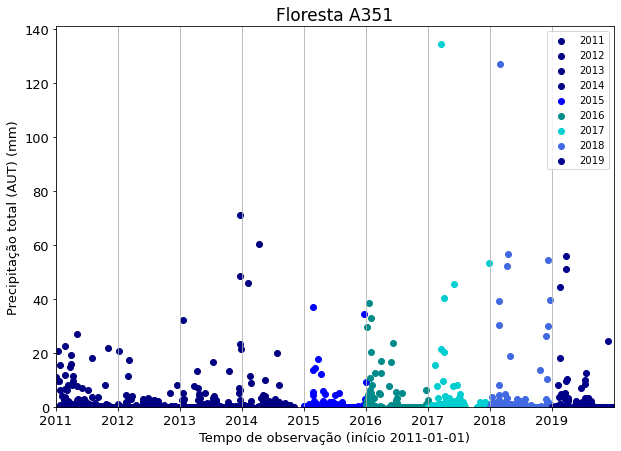

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(dt_2011,df_2011['Rain'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Rain'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Rain'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Rain'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.title('Floresta A351', size = 17)

plt.savefig('precipitacao_2011-2019.png')

<ipython-input-20-74ed8e82a9f2>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem


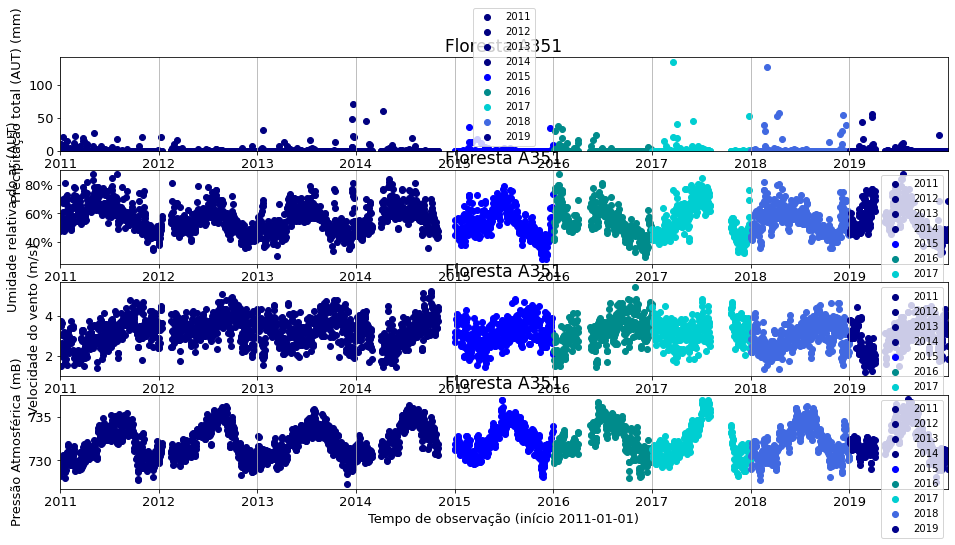

In [20]:
plt.figure(figsize=(35,10))
plt.subplot(5,2,1)
plt.scatter(dt_2011,df_2011['Rain'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Rain'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Rain'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Rain'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.title('Floresta A351', size = 17)



plt.subplot(5,2,3)
plt.scatter(dt_2011,df_2011['Hum'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Hum'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Hum'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'darkblue')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)


plt.subplot(5,2,5)
plt.scatter(dt_2011,df_2011['Wind'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Wind'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Wind'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Wind'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Wind'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Wind'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Wind'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Wind'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Wind'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)


plt.subplot(5,2,7)
plt.scatter(dt_2011,df_2011['Pressure'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Pressure'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Pressure'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Pressure'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mB)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)

plt.show()
#plt.savefig('precipitacao_2011-2019.png')

### **Umidade**

<ipython-input-21-fb612399cc81>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem


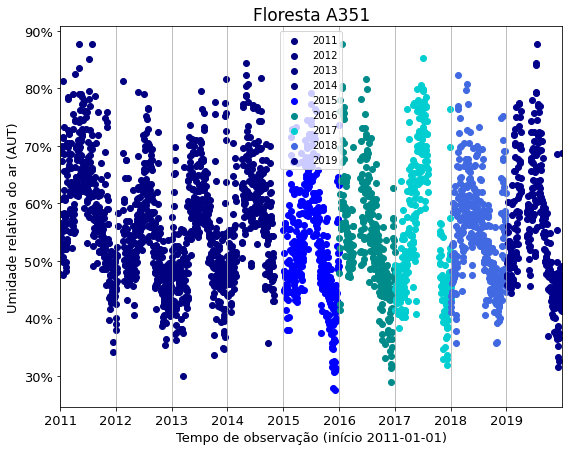

In [21]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2011,df_2011['Hum'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Hum'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Hum'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'darkblue')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('umidade_2011-2019.png')



#plt.savefig('floresta_2011-2019.png')
plt.show()

### **Velocidade do vento**

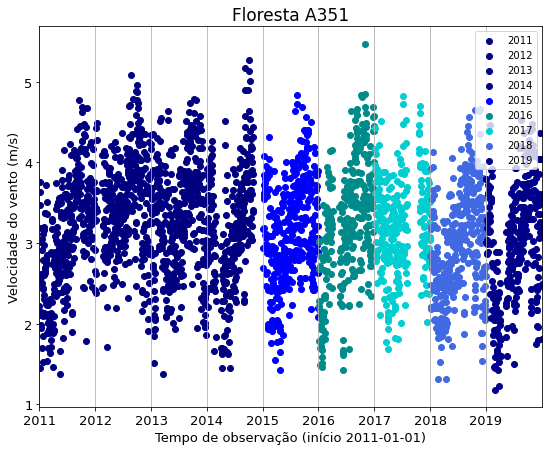

In [22]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2011,df_2011['Wind'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Wind'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Wind'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Wind'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Wind'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Wind'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Wind'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Wind'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Wind'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('vento_2011-2019.png')



#plt.savefig('floresta_2011-2019.png')
plt.show()

### **Pressão**

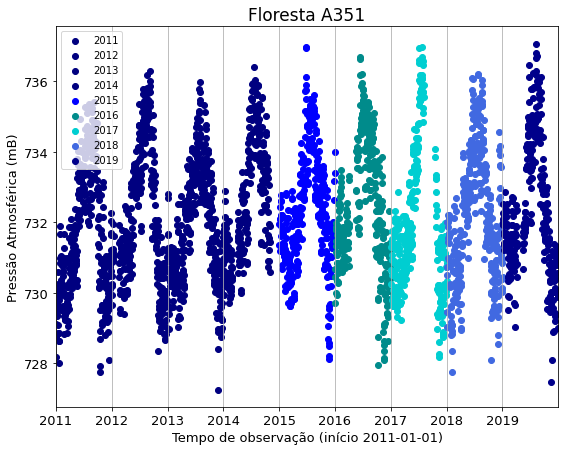

In [23]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2011,df_2011['Pressure'], label = 2011, color = 'navy')
plt.scatter(dt_2012,df_2012['Pressure'], label = 2012, color = 'navy')
plt.scatter(dt_2013,df_2013['Pressure'], label = 2013, color = 'navy')
plt.scatter(dt_2014,df_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Pressure'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2011-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mB)', size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(0,9,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('pressao_2011-2019.png')



#plt.savefig('floresta_2011-2019.png')
plt.show()

### **Temperatura**

## **2014-2019**

In [96]:
df = pd.read_csv('dados-meteorologicos/horario/dados_A351_D_2014-01-01_2019-12-31.csv', 
                 sep = ';', skiprows = 1, usecols = ['Data','Hora (UTC)','Temp. Ins. (C)',
                                                     'Umi. Ins. (%)','Pressao Ins. (hPa)',
                                                    'Vel. Vento (m/s)','Dir. Vento (m/s)',
                                                     'Chuva (mm)'])
df.dropna(inplace = True)
df.rename(columns = {'Dir. Vento (m/s)': 'Dir. Vento (º)'}, inplace = True)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48518 entries, 0 to 52581
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                48518 non-null  object
 1   Hora (UTC)          48518 non-null  int64 
 2   Temp. Ins. (C)      48518 non-null  object
 3   Umi. Ins. (%)       48518 non-null  object
 4   Pressao Ins. (hPa)  48518 non-null  object
 5   Vel. Vento (m/s)    48518 non-null  object
 6   Dir. Vento (º)      48518 non-null  object
 7   Chuva (mm)          48518 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB
None


Data  Hora (UTC) Temp. Ins. (C) Umi. Ins. (%) Pressao Ins. (hPa)  \
0      01/01/2014         100           28,4          48,0              974,2   
1      01/01/2014         200           27,1          59,0              974,3   
2      01/01/2014         300           26,1          63,0              974,3   
3      01/01/2014         400           25,3          66,0              974,0   
4      01/01/2014         500           24,7          68,0              973,7   
...           ...         ...            ...           ...                ...   
52577  31/12/2019        1900           25,6          75,0              972,7   
52578  31/12/2019        2000           25,3          77,0              972,7   
52579  31/12/2019        2100           24,8          78,0              972,9   
52580  31/12/2019        2200           24,2          85,0              973,9   
52581  31/12/2019        2300           24,0          88,0              974,9   

      Vel. Vento (m/s) Dir. Vento (º) Chuva (mm)  
0                  4,5          134,0        0,0  
1                  4,8          131,0        0,0  
2                  2,9          139,0        0,0  
3                  3,3          140,0        0,0  
4                  2,6          120,0        0,0  
...                ...            ...        ...  
52577              1,3            5,0        0,0  
52578              1,9          341,0        0,0  
52579              1,1          346,0        0,0  
52580              0,8          138,0        0,8  
52581              1,2          165,0        0,6  

[48518 rows x 8 columns]

In [97]:
#funcao que faz o mapeamento

def define_classe(hora):
    if hora == 0:
        return 0
    elif hora == 100:
        return 1
    elif hora == 200:
        return 2
    elif hora == 300:
        return 3
    elif hora == 400:
        return 4
    elif hora == 500:
        return 5
    elif hora == 600:
        return 6
    elif hora == 700:
        return 7
    elif hora == 800:
        return 8
    elif hora == 900:
        return 9
    elif hora == 1000:
        return 10
    elif hora == 1100:
        return 11
    elif hora == 1200:
        return 12
    elif hora == 1300:
        return 13
    elif hora == 1400:
        return 14
    elif hora == 1500:
        return 15
    elif hora == 1600:
        return 16
    elif hora == 1700:
        return 17
    elif hora == 1800:
        return 18
    elif hora == 1900:
        return 19
    elif hora == 2000:
        return 20
    elif hora == 2100:
        return 21
    elif hora == 2200:
        return 22
    elif hora == 2300:
        return 23

In [98]:
#mapeando os valores da hora
df['Hora (UTC)'] = df['Hora (UTC)'].map(define_classe)
df['Hora (UTC)']

0         1
1         2
2         3
3         4
4         5
         ..
52577    19
52578    20
52579    21
52580    22
52581    23
Name: Hora (UTC), Length: 48518, dtype: int64

In [99]:
#transformando em string
df['Hora (UTC)'] = df['Hora (UTC)'].astype(str)

In [100]:
#arrumando em formato de tempo
df['Datetime'] = df['Data'] + ' ' + df['Hora (UTC)'] + ':00'
del df['Data']
del df['Hora (UTC)']


#substituindo , por .
df['Temp. Ins. (C)'] = [i.replace(',','.') for i in df['Temp. Ins. (C)']]
df['Umi. Ins. (%)'] = [i.replace(',','.') for i in df['Umi. Ins. (%)']]
df['Pressao Ins. (hPa)'] = [i.replace(',','.') for i in df['Pressao Ins. (hPa)']]
df['Vel. Vento (m/s)'] = [i.replace(',','.') for i in df['Vel. Vento (m/s)']]
df['Dir. Vento (º)'] = [i.replace(',','.') for i in df['Dir. Vento (º)']]
df['Chuva (mm)'] = [i.replace(',','.') for i in df['Chuva (mm)']]


#transformando em float
df['Temp. Ins. (C)'] = df['Temp. Ins. (C)'].astype('float')
df['Umi. Ins. (%)'] = df['Umi. Ins. (%)'].astype('float')
df['Pressao Ins. (hPa)'] = df['Pressao Ins. (hPa)'].astype('float')
df['Vel. Vento (m/s)'] = df['Vel. Vento (m/s)'].astype('float')
df['Dir. Vento (º)'] = df['Dir. Vento (º)'].astype('float')
df['Chuva (mm)'] = df['Chuva (mm)'].astype('float')


#convertendo a data em um objeto datetime do pandas
df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%d/%m/%Y %H:%M%S')

#convertendo a data em um objeto datetime do astropy
df['Datetime'] = Time(df['Datetime'], scale = 'utc')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48518 entries, 0 to 52581
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temp. Ins. (C)      48518 non-null  float64
 1   Umi. Ins. (%)       48518 non-null  float64
 2   Pressao Ins. (hPa)  48518 non-null  float64
 3   Vel. Vento (m/s)    48518 non-null  float64
 4   Dir. Vento (º)      48518 non-null  float64
 5   Chuva (mm)          48518 non-null  float64
 6   Datetime            48518 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.0+ MB
None


Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  Vel. Vento (m/s)  \
0            28.4           48.0               974.2               4.5   
1            27.1           59.0               974.3               4.8   
2            26.1           63.0               974.3               2.9   
3            25.3           66.0               974.0               3.3   
4            24.7           68.0               973.7               2.6   

   Dir. Vento (º)  Chuva (mm)                       Datetime  
0           134.0         0.0  2014-01-01T01:00:00.000000000  
1           131.0         0.0  2014-01-01T02:00:00.000000000  
2           139.0         0.0  2014-01-01T03:00:00.000000000  
3           140.0         0.0  2014-01-01T04:00:00.000000000  
4           120.0         0.0  2014-01-01T05:00:00.000000000

In [101]:
df_2014 = df.set_index('Datetime').filter(like = '2014', axis = 0).reset_index()
df_2014['Datetime'] = pd.to_datetime(df_2014['Datetime'].astype('str'))

df_2015 = df.set_index('Datetime').filter(like = '2015', axis = 0).reset_index()
df_2015['Datetime'] = pd.to_datetime(df_2015['Datetime'].astype('str'))

df_2016 = df.set_index('Datetime').filter(like = '2016', axis = 0).reset_index()
df_2016['Datetime'] = pd.to_datetime(df_2016['Datetime'].astype('str'))

df_2017 = df.set_index('Datetime').filter(like = '2017', axis = 0).reset_index()
df_2017['Datetime'] = pd.to_datetime(df_2017['Datetime'].astype('str'))

df_2018 = df.set_index('Datetime').filter(like = '2018', axis = 0).reset_index()
df_2018['Datetime'] = pd.to_datetime(df_2018['Datetime'].astype('str'))

df_2019 = df.set_index('Datetime').filter(like = '2019', axis = 0).reset_index()
df_2019['Datetime'] = pd.to_datetime(df_2019['Datetime'].astype('str'))

In [102]:
df_2014[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2014')
df_2015[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2015')
df_2016[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2016')
df_2017[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2017')
df_2018[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2018')
df_2019[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2019')

### **Plots**

In [35]:
df_2014.dtypes

Datetime              datetime64[ns]
Temp. Ins. (C)               float64
Umi. Ins. (%)                float64
Pressao Ins. (hPa)           float64
Vel. Vento (m/s)             float64
Dir. Vento (º)               float64
Chuva (mm)                   float64
dtype: object

In [33]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2014-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc', precision = 3 )

#calculando a diferenca de tempo e transformando float object para fazer o plot
dt_2014 = [ ((i - itime)/365).value for i in df_2014['Datetime']]
dt_2015 = [ ((i - itime)/365).value for i in df_2015['Datetime']]
dt_2016 = [ ((i - itime)/365).value for i in df_2016['Datetime']]
dt_2017 = [ ((i - itime)/365).value for i in df_2017['Datetime']]
dt_2018 = [ ((i - itime)/365).value for i in df_2018['Datetime']]
dt_2019 = [ ((i - itime)/365).value for i in df_2019['Datetime']]

TypeError: bad operand type for unary -: 'NotImplementedType'

#### **Precipitação**

In [34]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014,df_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Rain'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.title('Floresta A351', size = 17)

plt.savefig('precipitacao_2014-2019.png')

KeyError: 'Rain'

<Figure size 648x504 with 0 Axes>

#### **Umidade**

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Floresta A351', size = 17)

plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'royalblue')

plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)

plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.yticks(size  = 13)

plt.grid(axis = 'x')
plt.legend()

plt.savefig('umidade_2014-2019.png')
plt.show()

#### **Velocidade do vento**

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014,df_2014['Wind'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Wind'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Wind'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Wind'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Wind'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Wind'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('ventovel_2014-2019.png')



#plt.savefig('floresta_2011-2019.png')
plt.show()

#### **Pressão**

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014,df_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Pressure'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('pressao_2014-2019.png')



#plt.savefig('floresta_2011-2019.png')
plt.show()

#### **Temperatura**

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014,df_2014['Temp'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Temp'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Temp'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Temp'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Temp'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Temp'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura ($\degree$ C)', size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('Floresta A351', size = 17)
plt.savefig('temp_2014-2019.png')



plt.show()

### **Rosa dos ventos**

#### **2014-2019**

In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'].astype(str))

In [10]:
#mediana da moda diaria da direcao do vento na Floresta entre 2014 e 2019
df_median_mode = df.groupby(df.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_median_mode.info())
df_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        2044 non-null   object 
 1   Dir. Vento (º)  2044 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.1+ KB
None


Datetime  Dir. Vento (º)
0     2014-01-01           181.0
1     2014-01-02           144.0
2     2014-01-03           134.5
3     2014-01-04           141.5
4     2014-01-05           145.0
...          ...             ...
2039  2019-12-27           138.0
2040  2019-12-28           127.0
2041  2019-12-29           138.5
2042  2019-12-30           153.0
2043  2019-12-31           167.0

[2044 rows x 2 columns]

In [11]:
#media diaria do módulo da velocidade do vento na Floresta entre 2014 e 2019
df_mean = df.groupby(df.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_mean.info())
df_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          2044 non-null   object 
 1   Vel. Vento (m/s)  2044 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.1+ KB
None


Datetime  Vel. Vento (m/s)
0     2014-01-01          3.191304
1     2014-01-02          2.908333
2     2014-01-03          3.866667
3     2014-01-04          3.329167
4     2014-01-05          3.254167
...          ...               ...
2039  2019-12-27          3.204167
2040  2019-12-28          3.254167
2041  2019-12-29          3.208333
2042  2019-12-30          2.508333
2043  2019-12-31          1.820833

[2044 rows x 2 columns]

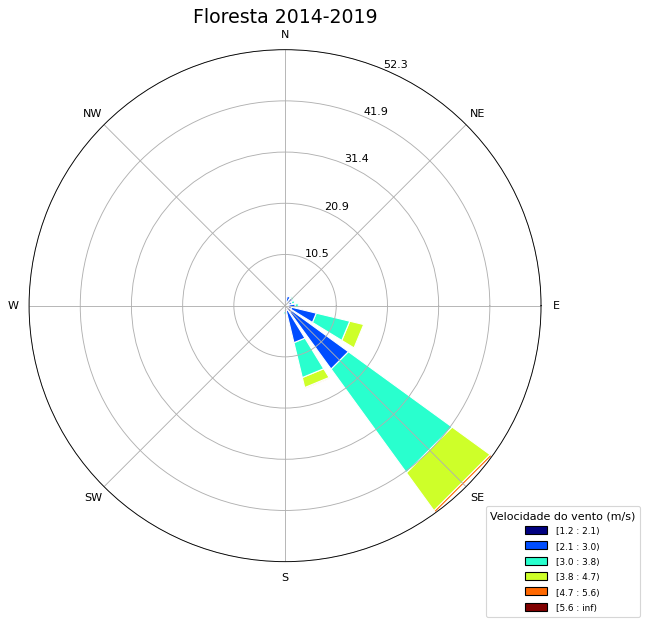

In [12]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta 2014-2019', size = 17)

plt.savefig('rosadosventos_Floresta_2014-2019')
plt.show()

#### **2014**

In [13]:
df_2014.head()

Datetime  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0 2014-01-01 01:00:00            28.4           48.0               974.2   
1 2014-01-01 02:00:00            27.1           59.0               974.3   
2 2014-01-01 03:00:00            26.1           63.0               974.3   
3 2014-01-01 04:00:00            25.3           66.0               974.0   
4 2014-01-01 05:00:00            24.7           68.0               973.7   

   Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0               4.5           134.0         0.0  
1               4.8           131.0         0.0  
2               2.9           139.0         0.0  
3               3.3           140.0         0.0  
4               2.6           120.0         0.0

In [14]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2014_median_mode = df_2014.groupby(df_2014.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2014_median_mode.info())
df_2014_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        334 non-null    object 
 1   Dir. Vento (º)  334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB
None


Datetime  Dir. Vento (º)
0    2014-01-01           181.0
1    2014-01-02           144.0
2    2014-01-03           134.5
3    2014-01-04           141.5
4    2014-01-05           145.0
..          ...             ...
329  2014-12-27           142.0
330  2014-12-28           134.0
331  2014-12-29           162.0
332  2014-12-30           143.0
333  2014-12-31           114.5

[334 rows x 2 columns]

In [15]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2014_mean = df_2014.groupby(df_2014.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_2014_mean.info())
df_2014_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          334 non-null    object 
 1   Vel. Vento (m/s)  334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB
None


Datetime  Vel. Vento (m/s)
0    2014-01-01          3.191304
1    2014-01-02          2.908333
2    2014-01-03          3.866667
3    2014-01-04          3.329167
4    2014-01-05          3.254167
..          ...               ...
329  2014-12-27          3.575000
330  2014-12-28          3.000000
331  2014-12-29          2.779167
332  2014-12-30          2.129167
333  2014-12-31          1.570833

[334 rows x 2 columns]

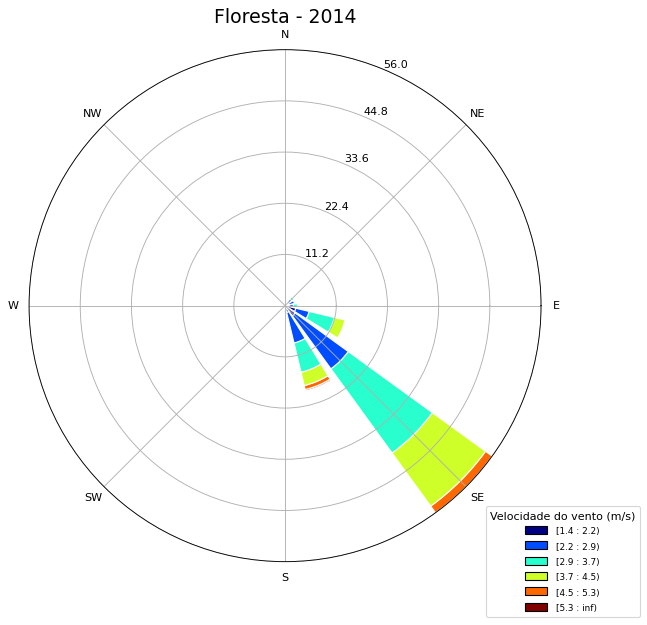

In [546]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2014_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2014_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2014', size = 17)

plt.savefig('rosadosventos_Floresta_2014')
plt.show()

In [17]:
df_2014_median_mode['Datetime'] = pd.to_datetime(df_2014_median_mode['Datetime'])
df_2014_median_mode.dtypes

Datetime          datetime64[ns]
Dir. Vento (º)           float64
dtype: object

([<matplotlib.axis.XTick at 0x7fef2cd7afd0>,
 [Text(0, 0, 'N'),
  Text(45, 0, 'NE'),
  Text(90, 0, 'E'),
  Text(135, 0, 'SE'),
  Text(180, 0, 'S'),
  Text(225, 0, 'SW'),
  Text(270, 0, 'W')])

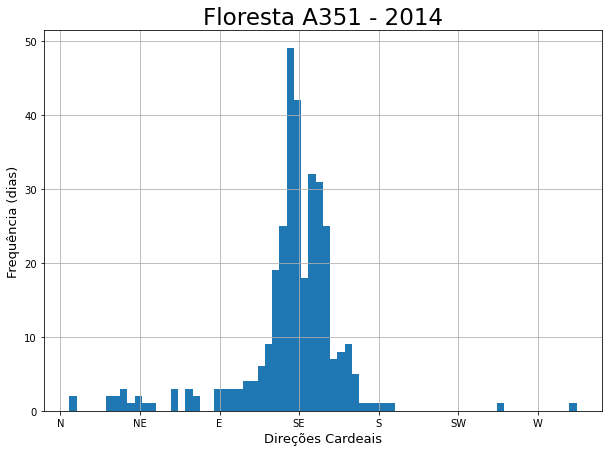

In [18]:
df_2014_median_mode['Dir. Vento (º)'].hist(bins = 70)
plt.title('Floresta A351 - 2014', size = 23)
plt.xlabel('Direções Cardeais', size = 13)
plt.ylabel('Frequência (dias)',size = 13)
plt.savefig('floresta_2014_direcoes')
plt.xticks(ticks = [0,45,90,135,180,225,270], labels = ['N','NE','E','SE','S','SW','W'])

In [19]:
df_2014_median_mode.groupby(df_2014_median_mode['Datetime'].dt.month).agg(pd.Series.mode)

Dir. Vento (º)
Datetime                                     
1                                         132
2                [106.0, 130.0, 131.5, 140.0]
4                                         135
5                              [146.0, 156.0]
6                              [124.0, 143.0]
7         [134.0, 145.0, 149.0, 150.0, 159.0]
8                              [134.0, 138.0]
9                              [141.0, 146.0]
10               [127.0, 128.0, 129.0, 133.0]
11                      [123.5, 128.0, 131.0]
12                                        129

#### **2015**

In [20]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2015_median_mode = df_2015.groupby(df_2015.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2015_median_mode.info())
df_2015_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        365 non-null    object 
 1   Dir. Vento (º)  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


Datetime  Dir. Vento (º)
0    2015-01-01           125.0
1    2015-01-02           131.0
2    2015-01-03           116.0
3    2015-01-04           106.5
4    2015-01-05            37.0
..          ...             ...
360  2015-12-27           117.0
361  2015-12-28           123.0
362  2015-12-29           132.0
363  2015-12-30           116.0
364  2015-12-31           121.0

[365 rows x 2 columns]

In [21]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2015_mean = df_2015.groupby(df_2015.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_2015_mean.info())
df_2015_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          365 non-null    object 
 1   Vel. Vento (m/s)  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


Datetime  Vel. Vento (m/s)
0    2015-01-01          2.525000
1    2015-01-02          3.141667
2    2015-01-03          3.062500
3    2015-01-04          2.522222
4    2015-01-05          2.541176
..          ...               ...
360  2015-12-27          3.891667
361  2015-12-28          2.916667
362  2015-12-29          2.200000
363  2015-12-30          2.204167
364  2015-12-31          2.983333

[365 rows x 2 columns]

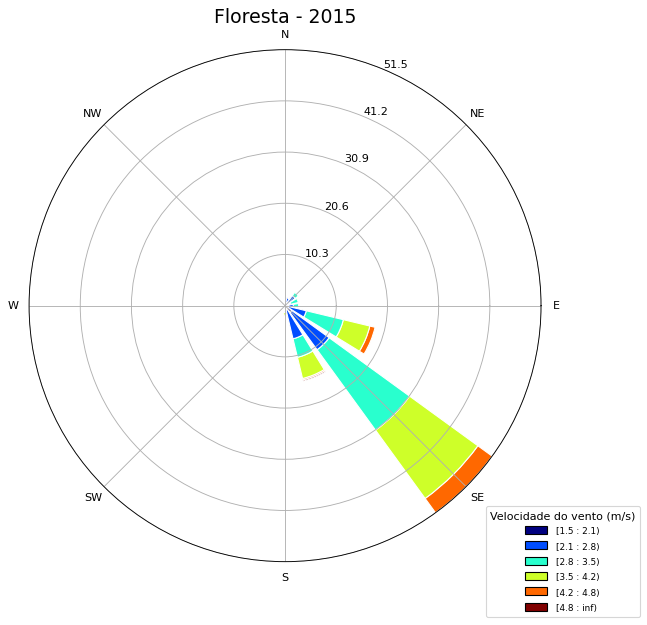

In [22]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2015_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2015_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2015', size = 17)

plt.savefig('rosadosventos_Floresta_2015')
plt.show()

#### **2016**

In [23]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2016_median_mode = df_2016.groupby(df_2016.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2016_median_mode.info())
df_2016_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        353 non-null    object 
 1   Dir. Vento (º)  353 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB
None


Datetime  Dir. Vento (º)
0    2016-01-01           122.0
1    2016-01-02           107.5
2    2016-01-03           186.5
3    2016-01-04             6.0
4    2016-01-05           124.5
..          ...             ...
348  2016-12-27           130.5
349  2016-12-28           121.0
350  2016-12-29           118.0
351  2016-12-30           132.5
352  2016-12-31           117.0

[353 rows x 2 columns]

In [24]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2016_mean = df_2016.groupby(df_2016.Datetime.dt.date)[['Vel. Vento (m/s)']].median().reset_index()

print(df_2016_mean.info())
df_2016_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          353 non-null    object 
 1   Vel. Vento (m/s)  353 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB
None


Datetime  Vel. Vento (m/s)
0    2016-01-01              2.55
1    2016-01-02              1.75
2    2016-01-03              2.00
3    2016-01-04              2.95
4    2016-01-05              2.35
..          ...               ...
348  2016-12-27              4.40
349  2016-12-28              3.95
350  2016-12-29              4.40
351  2016-12-30              4.80
352  2016-12-31              3.95

[353 rows x 2 columns]

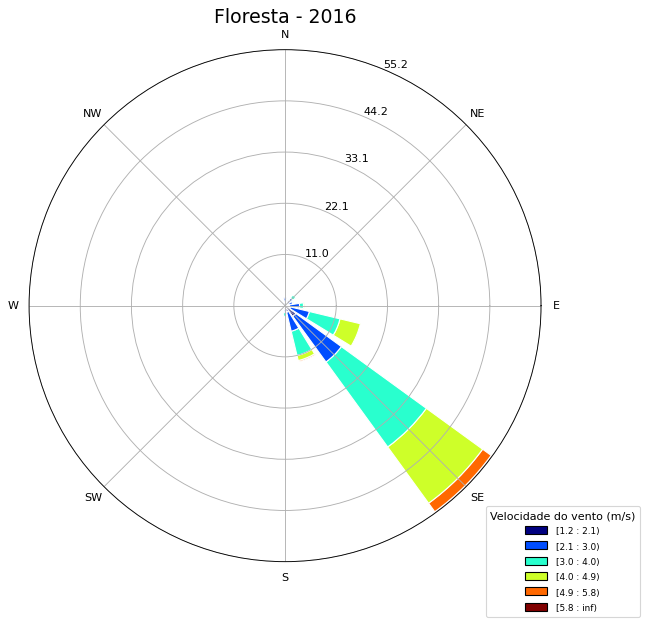

In [25]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2016_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2016_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2016', size = 17)

plt.savefig('rosadosventos_Floresta_2016')
plt.show()

#### **2017**

In [26]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2017_median_mode = df_2017.groupby(df_2017.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2017_median_mode.info())
df_2017_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        293 non-null    object 
 1   Dir. Vento (º)  293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB
None


Datetime  Dir. Vento (º)
0    2017-01-01           130.0
1    2017-01-02           131.5
2    2017-01-03           148.5
3    2017-01-04           119.0
4    2017-01-05           126.5
..          ...             ...
288  2017-12-27           125.0
289  2017-12-28           130.0
290  2017-12-29           136.0
291  2017-12-30           142.5
292  2017-12-31           107.0

[293 rows x 2 columns]

In [27]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2017_mean = df_2017.groupby(df_2017.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_2017_mean.info())
df_2017_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          293 non-null    object 
 1   Vel. Vento (m/s)  293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB
None


Datetime  Vel. Vento (m/s)
0    2017-01-01          4.512500
1    2017-01-02          3.637500
2    2017-01-03          3.175000
3    2017-01-04          3.733333
4    2017-01-05          4.254167
..          ...               ...
288  2017-12-27          3.475000
289  2017-12-28          2.866667
290  2017-12-29          2.920833
291  2017-12-30          3.033333
292  2017-12-31          3.345833

[293 rows x 2 columns]

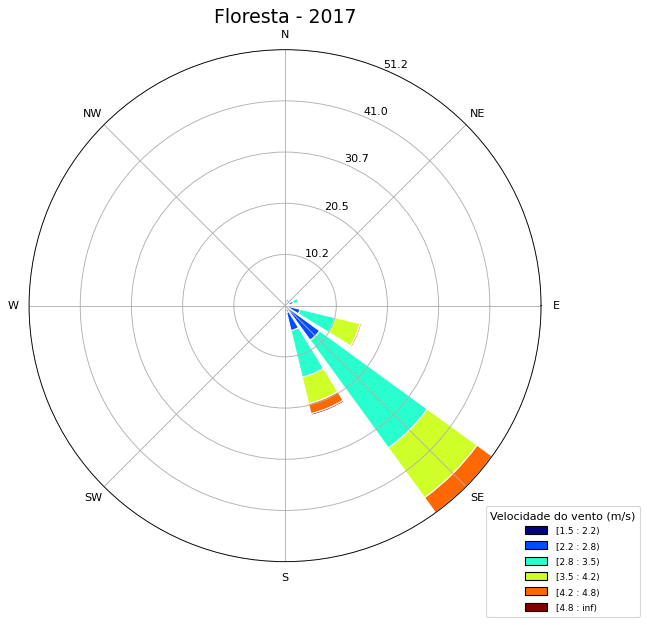

In [28]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2017_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2017_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2017', size = 17)

plt.savefig('rosadosventos_Floresta_2017')
plt.show()

#### **2018**

In [29]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2018_median_mode = df_2018.groupby(df_2018.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2018_median_mode.info())
df_2018_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        365 non-null    object 
 1   Dir. Vento (º)  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


Datetime  Dir. Vento (º)
0    2018-01-01           123.0
1    2018-01-02           151.0
2    2018-01-03           126.5
3    2018-01-04           352.0
4    2018-01-05           193.0
..          ...             ...
360  2018-12-27           107.5
361  2018-12-28           177.0
362  2018-12-29           129.5
363  2018-12-30           173.0
364  2018-12-31           150.0

[365 rows x 2 columns]

In [30]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2018_mean = df_2018.groupby(df_2018.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_2018_mean.info())
df_2018_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          365 non-null    object 
 1   Vel. Vento (m/s)  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


Datetime  Vel. Vento (m/s)
0    2018-01-01          2.925000
1    2018-01-02          2.212500
2    2018-01-03          2.183333
3    2018-01-04          2.145833
4    2018-01-05          2.558333
..          ...               ...
360  2018-12-27          2.095833
361  2018-12-28          2.158333
362  2018-12-29          2.691667
363  2018-12-30          2.675000
364  2018-12-31          2.595833

[365 rows x 2 columns]

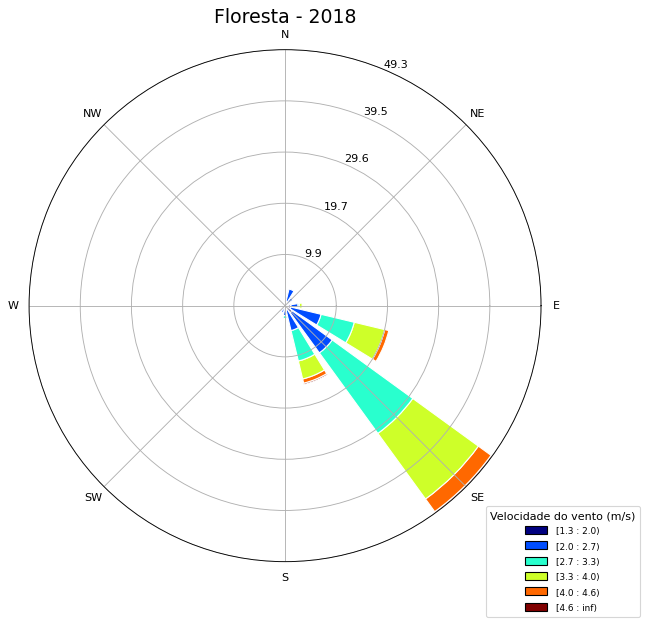

In [31]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2018_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2018_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2018', size = 17)

plt.savefig('rosadosventos_Floresta_2018')
plt.show()

#### **2019**

In [32]:
#mediana da moda diaria da direcao do vento na Floresta em 2014
df_2019_median_mode = df_2019.groupby(df_2019.Datetime.dt.date)['Dir. Vento (º)'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

print(df_2019_median_mode.info())
df_2019_median_mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        334 non-null    object 
 1   Dir. Vento (º)  334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB
None


Datetime  Dir. Vento (º)
0    2019-01-01           136.0
1    2019-01-02           113.0
2    2019-01-03           121.0
3    2019-01-04           141.0
4    2019-01-05           119.0
..          ...             ...
329  2019-12-27           138.0
330  2019-12-28           127.0
331  2019-12-29           138.5
332  2019-12-30           153.0
333  2019-12-31           167.0

[334 rows x 2 columns]

In [33]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
df_2019_mean = df_2019.groupby(df_2019.Datetime.dt.date)[['Vel. Vento (m/s)']].mean().reset_index()

print(df_2019_mean.info())
df_2019_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          334 non-null    object 
 1   Vel. Vento (m/s)  334 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB
None


Datetime  Vel. Vento (m/s)
0    2019-01-01          3.769565
1    2019-01-02          3.758333
2    2019-01-03          3.045833
3    2019-01-04          2.962500
4    2019-01-05          2.916667
..          ...               ...
329  2019-12-27          3.204167
330  2019-12-28          3.254167
331  2019-12-29          3.208333
332  2019-12-30          2.508333
333  2019-12-31          1.820833

[334 rows x 2 columns]

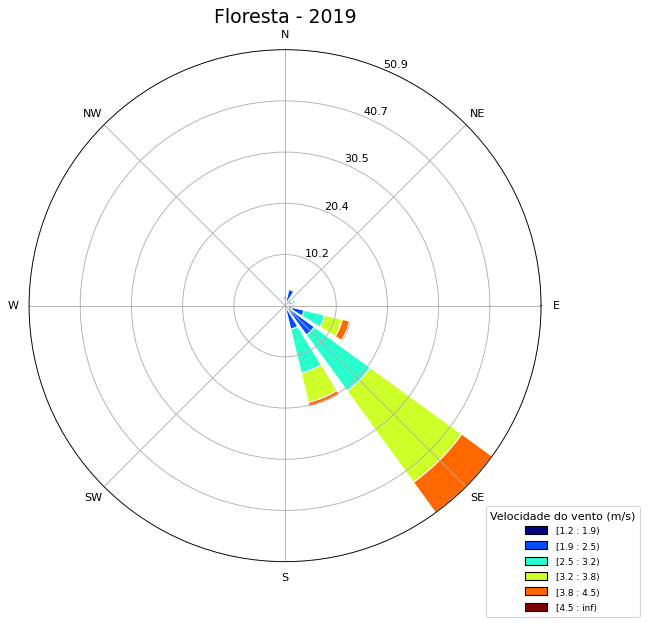

In [34]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]
ws = df_2019_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2019_median_mode['Dir. Vento (º)'].values


ax.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2019', size = 17)

plt.savefig('rosadosventos_Floresta_2019')
plt.show()

#### direção x tempo

In [35]:
df_2014[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2014')
df_2015[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2015')
df_2016[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2016')
df_2017[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2017')
df_2018[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2018')
df_2019[['Datetime', 'Vel. Vento (m/s)','Dir. Vento (º)']].to_csv('df_2019')

In [36]:
df_2014_median_mode.to_csv('df_2014_dia')
df_2015_median_mode.to_csv('df_2015_dia')
df_2016_median_mode.to_csv('df_2016_dia')
df_2017_median_mode.to_csv('df_2017_dia')
df_2018_median_mode.to_csv('df_2018_dia')
df_2019_median_mode.to_csv('df_2019_dia')

In [224]:
df_2014.set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()

Datetime  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-02-01 00:00:00            28.8           47.0               975.1   
1   2014-02-01 01:00:00            27.5           55.0               975.5   
2   2014-02-01 02:00:00            26.3           61.0               975.4   
3   2014-02-01 03:00:00            25.6           60.0               975.4   
4   2014-02-01 04:00:00            24.9           57.0               974.9   
..                  ...             ...            ...                 ...   
667 2014-02-28 19:00:00            30.4           41.0               972.7   
668 2014-02-28 20:00:00            30.4           40.0               972.6   
669 2014-02-28 21:00:00            29.6           42.0               972.9   
670 2014-02-28 22:00:00            28.7           47.0               973.4   
671 2014-02-28 23:00:00            28.0           51.0               973.8   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 5.7           134.0         0.0  
1                 4.7           132.0         0.0  
2                 3.9           130.0         0.0  
3                 3.5           125.0         0.0  
4                 3.7           115.0         0.0  
..                ...             ...         ...  
667               1.7             1.0         0.0  
668               1.6            29.0         0.0  
669               1.2             3.0         0.0  
670               0.5            80.0         0.0  
671               0.7           137.0         0.0  

[672 rows x 7 columns]

In [37]:
df_2014_JAN =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-01', axis = 0).reset_index()
df_2014_FEV =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()
df_2014_MAR =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-03', axis = 0).reset_index()
df_2014_ABR =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-04', axis = 0).reset_index()
df_2014_MAI =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-05', axis = 0).reset_index()
df_2014_JUN =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-06', axis = 0).reset_index()
df_2014_JUL =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-07', axis = 0).reset_index()
df_2014_AGO =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-08', axis = 0).reset_index()
df_2014_SET =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-09', axis = 0).reset_index()
df_2014_OUT =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-10', axis = 0).reset_index()
df_2014_NOV =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-11', axis = 0).reset_index()
df_2014_DEZ =  df_2014_median_mode.set_index('Datetime').filter(like = '2014-12', axis = 0).reset_index()

In [38]:
mode_2014_JAN = sci.stats.mode(df_2014_JAN['Dir. Vento (º)'])
mode_2014_FEV = sci.stats.mode(df_2014_FEV['Dir. Vento (º)'])
mode_2014_MAR = sci.stats.mode(df_2014_MAR['Dir. Vento (º)'])
mode_2014_ABR = sci.stats.mode(df_2014_ABR['Dir. Vento (º)'])
mode_2014_MAI = sci.stats.mode(df_2014_MAI['Dir. Vento (º)'])
mode_2014_JUN = sci.stats.mode(df_2014_JUN['Dir. Vento (º)'])
mode_2014_JUL = sci.stats.mode(df_2014_JUL['Dir. Vento (º)'])
mode_2014_AGO = sci.stats.mode(df_2014_AGO['Dir. Vento (º)'])
mode_2014_SET = sci.stats.mode(df_2014_SET['Dir. Vento (º)'])
mode_2014_OUT = sci.stats.mode(df_2014_OUT['Dir. Vento (º)'])
mode_2014_NOV = sci.stats.mode(df_2014_NOV['Dir. Vento (º)']) 
mode_2014_DEZ = sci.stats.mode(df_2014_DEZ['Dir. Vento (º)'])

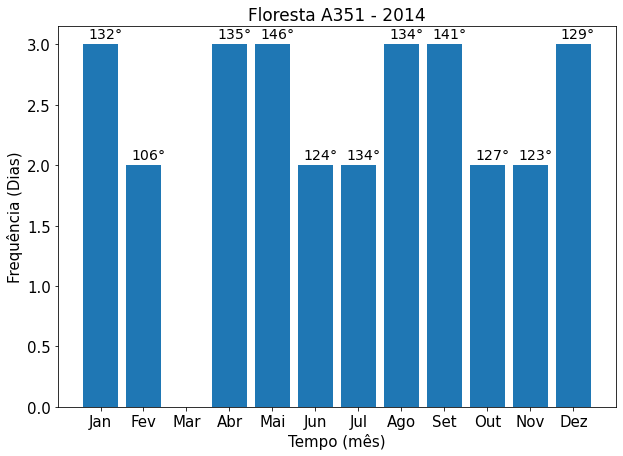

In [523]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2014_JAN[1]), int(mode_2014_FEV[1]), 0, int(mode_2014_ABR[1]),
        int(mode_2014_MAI[1]) , int(mode_2014_JUN[1]), int(mode_2014_JUL[1]),
        int(mode_2014_AGO[1]) , int(mode_2014_SET[1]), int(mode_2014_OUT[1]),
        int(mode_2014_NOV[1]) , int(mode_2014_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.text(0.7,3.05,str(int(mode_2014_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,2.05,str(int(mode_2014_FEV[0])) + r'$\degree$', size = 14)
plt.text(3.7,3.05,str(int(mode_2014_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,3.05,str(int(mode_2014_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,2.05,str(int(mode_2014_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,2.05,str(int(mode_2014_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,3.05,str(int(mode_2014_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.7,3.05,str(int(mode_2014_SET[0])) + r'$\degree$', size = 14)
plt.text(9.7,2.05,str(int(mode_2014_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,2.05,str(int(mode_2014_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,3.05,str(int(mode_2014_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2014', size = 17)
plt.savefig('direcoes_floresta-2014')

In [40]:
df_2015_JAN =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-01', axis = 0).reset_index()
df_2015_FEV =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-02', axis = 0).reset_index()
df_2015_MAR =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-03', axis = 0).reset_index()
df_2015_ABR =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-04', axis = 0).reset_index()
df_2015_MAI =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-05', axis = 0).reset_index()
df_2015_JUN =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-06', axis = 0).reset_index()
df_2015_JUL =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-07', axis = 0).reset_index()
df_2015_AGO =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-08', axis = 0).reset_index()
df_2015_SET =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-09', axis = 0).reset_index()
df_2015_OUT =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-10', axis = 0).reset_index()
df_2015_NOV =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-11', axis = 0).reset_index()
df_2015_DEZ =  df_2015_median_mode.set_index('Datetime').filter(like = '2015-12', axis = 0).reset_index()

In [41]:
mode_2015_JAN = sci.stats.mode(df_2015_JAN['Dir. Vento (º)'])
mode_2015_FEV = sci.stats.mode(df_2015_FEV['Dir. Vento (º)'])
mode_2015_MAR = sci.stats.mode(df_2015_MAR['Dir. Vento (º)'])
mode_2015_ABR = sci.stats.mode(df_2015_ABR['Dir. Vento (º)'])
mode_2015_MAI = sci.stats.mode(df_2015_MAI['Dir. Vento (º)'])
mode_2015_JUN = sci.stats.mode(df_2015_JUN['Dir. Vento (º)'])
mode_2015_JUL = sci.stats.mode(df_2015_JUL['Dir. Vento (º)'])
mode_2015_AGO = sci.stats.mode(df_2015_AGO['Dir. Vento (º)'])
mode_2015_SET = sci.stats.mode(df_2015_SET['Dir. Vento (º)'])
mode_2015_OUT = sci.stats.mode(df_2015_OUT['Dir. Vento (º)'])
mode_2015_NOV = sci.stats.mode(df_2015_NOV['Dir. Vento (º)']) 
mode_2015_DEZ = sci.stats.mode(df_2015_DEZ['Dir. Vento (º)'])

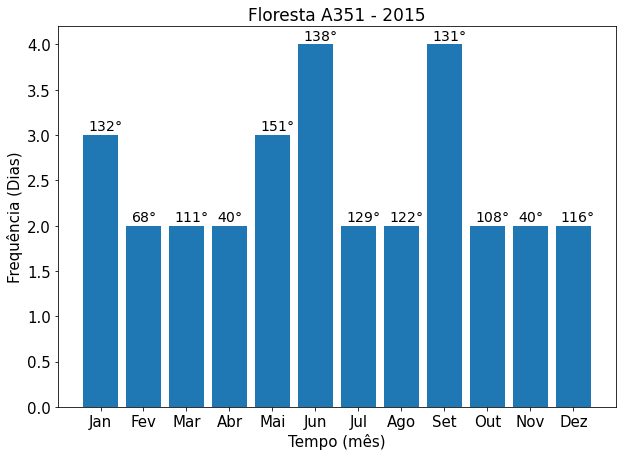

In [524]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2015_JAN[1]), int(mode_2015_FEV[1]), int(mode_2015_MAR[1]), int(mode_2015_ABR[1]),
        int(mode_2015_MAI[1]) , int(mode_2015_JUN[1]), int(mode_2015_JUL[1]),
        int(mode_2015_AGO[1]) , int(mode_2015_SET[1]), int(mode_2015_OUT[1]),
        int(mode_2015_NOV[1]) , int(mode_2015_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.text(0.7,3.05,str(int(mode_2015_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,2.05,str(int(mode_2015_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.7,2.05,str(int(mode_2015_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.7,2.05,str(int(mode_2015_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,3.05,str(int(mode_2015_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,4.05,str(int(mode_2015_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,2.05,str(int(mode_2015_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,2.05,str(int(mode_2015_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.7,4.05,str(int(mode_2015_SET[0])) + r'$\degree$', size = 14)
plt.text(9.7,2.05,str(int(mode_2015_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,2.05,str(int(mode_2015_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,2.05,str(int(mode_2015_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2015', size = 17)
plt.savefig('direcoes_floresta-2015')

In [43]:
df_2016_JAN =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-01', axis = 0).reset_index()
df_2016_FEV =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-02', axis = 0).reset_index()
df_2016_MAR =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-03', axis = 0).reset_index()
df_2016_ABR =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-04', axis = 0).reset_index()
df_2016_MAI =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-05', axis = 0).reset_index()
df_2016_JUN =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-06', axis = 0).reset_index()
df_2016_JUL =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-07', axis = 0).reset_index()
df_2016_AGO =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-08', axis = 0).reset_index()
df_2016_SET =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-09', axis = 0).reset_index()
df_2016_OUT =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-10', axis = 0).reset_index()
df_2016_NOV =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-11', axis = 0).reset_index()
df_2016_DEZ =  df_2016_median_mode.set_index('Datetime').filter(like = '2016-12', axis = 0).reset_index()

In [44]:
mode_2016_JAN = sci.stats.mode(df_2016_JAN['Dir. Vento (º)'])
mode_2016_FEV = sci.stats.mode(df_2016_FEV['Dir. Vento (º)'])
mode_2016_MAR = sci.stats.mode(df_2016_MAR['Dir. Vento (º)'])
mode_2016_ABR = sci.stats.mode(df_2016_ABR['Dir. Vento (º)'])
mode_2016_MAI = sci.stats.mode(df_2016_MAI['Dir. Vento (º)'])
mode_2016_JUN = sci.stats.mode(df_2016_JUN['Dir. Vento (º)'])
mode_2016_JUL = sci.stats.mode(df_2016_JUL['Dir. Vento (º)'])
mode_2016_AGO = sci.stats.mode(df_2016_AGO['Dir. Vento (º)'])
mode_2016_SET = sci.stats.mode(df_2016_SET['Dir. Vento (º)'])
mode_2016_OUT = sci.stats.mode(df_2016_OUT['Dir. Vento (º)'])
mode_2016_NOV = sci.stats.mode(df_2016_NOV['Dir. Vento (º)']) 
mode_2016_DEZ = sci.stats.mode(df_2016_DEZ['Dir. Vento (º)'])

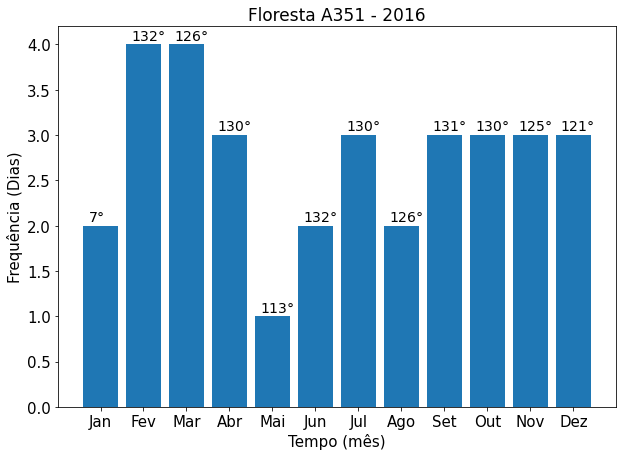

In [525]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2016_JAN[1]), int(mode_2016_FEV[1]), int(mode_2016_MAR[1]), int(mode_2016_ABR[1]),
        int(mode_2016_MAI[1]) , int(mode_2016_JUN[1]), int(mode_2016_JUL[1]),
        int(mode_2016_AGO[1]) , int(mode_2016_SET[1]), int(mode_2016_OUT[1]),
        int(mode_2016_NOV[1]) , int(mode_2016_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.text(0.7,2.05,str(int(mode_2016_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,4.05,str(int(mode_2016_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.7,4.05,str(int(mode_2016_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.7,3.05,str(int(mode_2016_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,1.05,str(int(mode_2016_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,2.05,str(int(mode_2016_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,3.05,str(int(mode_2016_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,2.05,str(int(mode_2016_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.7,3.05,str(int(mode_2016_SET[0])) + r'$\degree$', size = 14)
plt.text(9.7,3.05,str(int(mode_2016_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,3.05,str(int(mode_2016_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,3.05,str(int(mode_2016_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2016', size = 17)
plt.savefig('direcoes_floresta-2016')

In [46]:
df_2017_JAN =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-01', axis = 0).reset_index()
df_2017_FEV =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-02', axis = 0).reset_index()
df_2017_MAR =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-03', axis = 0).reset_index()
df_2017_ABR =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-04', axis = 0).reset_index()
df_2017_MAI =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-05', axis = 0).reset_index()
df_2017_JUN =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-06', axis = 0).reset_index()
df_2017_JUL =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-07', axis = 0).reset_index()
df_2017_AGO =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-08', axis = 0).reset_index()
df_2017_SET =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-09', axis = 0).reset_index()
df_2017_OUT =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-10', axis = 0).reset_index()
df_2017_NOV =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-11', axis = 0).reset_index()
df_2017_DEZ =  df_2017_median_mode.set_index('Datetime').filter(like = '2017-12', axis = 0).reset_index()

In [47]:
mode_2017_JAN = sci.stats.mode(df_2017_JAN['Dir. Vento (º)'])
mode_2017_FEV = sci.stats.mode(df_2017_FEV['Dir. Vento (º)'])
mode_2017_MAR = sci.stats.mode(df_2017_MAR['Dir. Vento (º)'])
mode_2017_ABR = sci.stats.mode(df_2017_ABR['Dir. Vento (º)'])
mode_2017_MAI = sci.stats.mode(df_2017_MAI['Dir. Vento (º)'])
mode_2017_JUN = sci.stats.mode(df_2017_JUN['Dir. Vento (º)'])
mode_2017_JUL = sci.stats.mode(df_2017_JUL['Dir. Vento (º)'])
mode_2017_AGO = sci.stats.mode(df_2017_AGO['Dir. Vento (º)'])
mode_2017_SET = sci.stats.mode(df_2017_SET['Dir. Vento (º)'])
mode_2017_OUT = sci.stats.mode(df_2017_OUT['Dir. Vento (º)'])
mode_2017_NOV = sci.stats.mode(df_2017_NOV['Dir. Vento (º)']) 
mode_2017_DEZ = sci.stats.mode(df_2017_DEZ['Dir. Vento (º)'])

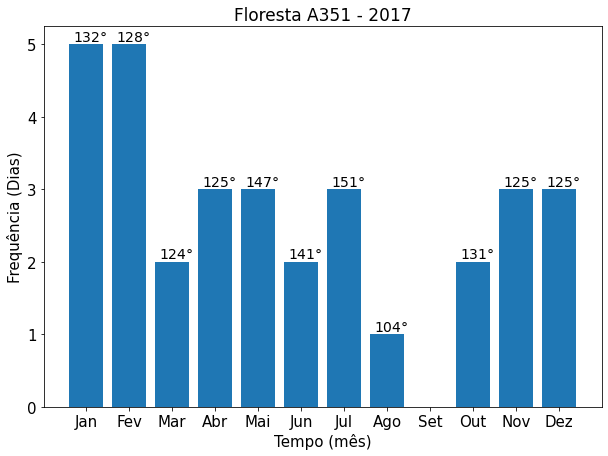

In [526]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2017_JAN[1]), int(mode_2017_FEV[1]), int(mode_2017_MAR[1]), int(mode_2017_ABR[1]),
        int(mode_2017_MAI[1]) , int(mode_2017_JUN[1]), int(mode_2017_JUL[1]),
        int(mode_2017_AGO[1]) , 0, int(mode_2017_OUT[1]),
        int(mode_2017_NOV[1]) , int(mode_2017_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.text(0.7,5.05,str(int(mode_2017_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,5.05,str(int(mode_2017_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.7,2.05,str(int(mode_2017_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.7,3.05,str(int(mode_2017_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,3.05,str(int(mode_2017_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,2.05,str(int(mode_2017_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,3.05,str(int(mode_2017_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,1.05,str(int(mode_2017_AGO[0])) + r'$\degree$', size = 14)
#plt.text(8.7,4.05,int(mode_2017_SET[0]), size = 14)
plt.text(9.7,2.05,str(int(mode_2017_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,3.05,str(int(mode_2017_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,3.05,str(int(mode_2017_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2017', size = 17)
plt.savefig('direcoes_floresta-2017')

In [49]:
df_2018_JAN =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-01', axis = 0).reset_index()
df_2018_FEV =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-02', axis = 0).reset_index()
df_2018_MAR =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-03', axis = 0).reset_index()
df_2018_ABR =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-04', axis = 0).reset_index()
df_2018_MAI =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-05', axis = 0).reset_index()
df_2018_JUN =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-06', axis = 0).reset_index()
df_2018_JUL =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-07', axis = 0).reset_index()
df_2018_AGO =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-08', axis = 0).reset_index()
df_2018_SET =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-09', axis = 0).reset_index()
df_2018_OUT =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-10', axis = 0).reset_index()
df_2018_NOV =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-11', axis = 0).reset_index()
df_2018_DEZ =  df_2018_median_mode.set_index('Datetime').filter(like = '2018-12', axis = 0).reset_index()

In [50]:
mode_2018_JAN = sci.stats.mode(df_2018_JAN['Dir. Vento (º)'])
mode_2018_FEV = sci.stats.mode(df_2018_FEV['Dir. Vento (º)'])
mode_2018_MAR = sci.stats.mode(df_2018_MAR['Dir. Vento (º)'])
mode_2018_ABR = sci.stats.mode(df_2018_ABR['Dir. Vento (º)'])
mode_2018_MAI = sci.stats.mode(df_2018_MAI['Dir. Vento (º)'])
mode_2018_JUN = sci.stats.mode(df_2018_JUN['Dir. Vento (º)'])
mode_2018_JUL = sci.stats.mode(df_2018_JUL['Dir. Vento (º)'])
mode_2018_AGO = sci.stats.mode(df_2018_AGO['Dir. Vento (º)'])
mode_2018_SET = sci.stats.mode(df_2018_SET['Dir. Vento (º)'])
mode_2018_OUT = sci.stats.mode(df_2018_OUT['Dir. Vento (º)'])
mode_2018_NOV = sci.stats.mode(df_2018_NOV['Dir. Vento (º)']) 
mode_2018_DEZ = sci.stats.mode(df_2018_DEZ['Dir. Vento (º)'])

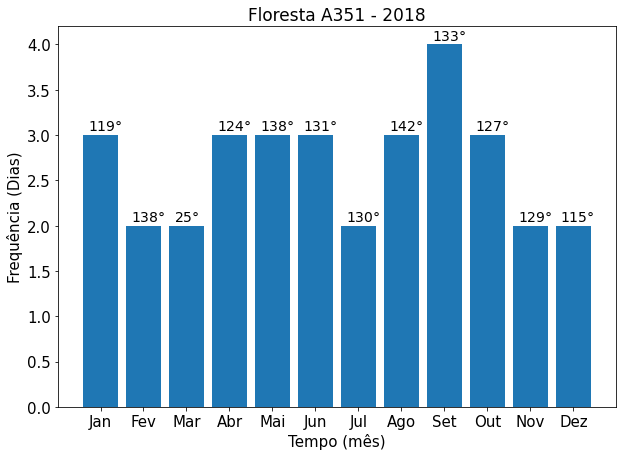

In [527]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2018_JAN[1]), int(mode_2018_FEV[1]), int(mode_2018_MAR[1]), int(mode_2018_ABR[1]),
        int(mode_2018_MAI[1]) , int(mode_2018_JUN[1]), int(mode_2018_JUL[1]),
        int(mode_2018_AGO[1]) , int(mode_2018_SET[1]), int(mode_2018_OUT[1]),
        int(mode_2018_NOV[1]) , int(mode_2018_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.text(0.7,3.05,str(int(mode_2018_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,2.05,str(int(mode_2018_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.7,2.05,str(int(mode_2018_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.7,3.05,str(int(mode_2018_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,3.05,str(int(mode_2018_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,3.05,str(int(mode_2018_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,2.05,str(int(mode_2018_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,3.05,str(int(mode_2018_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.7,4.05,str(int(mode_2018_SET[0])) + r'$\degree$', size = 14)
plt.text(9.7,3.05,str(int(mode_2018_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,2.05,str(int(mode_2018_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,2.05,str(int(mode_2018_DEZ[0])) + r'$\degree$', size = 14)


plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2018', size = 17)
plt.savefig('direcoes_floresta-2018')

In [52]:
df_2019_JAN =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-01', axis = 0).reset_index()
df_2019_FEV =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-02', axis = 0).reset_index()
df_2019_MAR =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-03', axis = 0).reset_index()
df_2019_ABR =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-04', axis = 0).reset_index()
df_2019_MAI =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-05', axis = 0).reset_index()
df_2019_JUN =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-06', axis = 0).reset_index()
df_2019_JUL =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-07', axis = 0).reset_index()
df_2019_AGO =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-08', axis = 0).reset_index()
df_2019_SET =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-09', axis = 0).reset_index()
df_2019_OUT =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-10', axis = 0).reset_index()
df_2019_NOV =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-11', axis = 0).reset_index()
df_2019_DEZ =  df_2019_median_mode.set_index('Datetime').filter(like = '2019-12', axis = 0).reset_index()

In [53]:
mode_2019_JAN = sci.stats.mode(df_2019_JAN['Dir. Vento (º)'])
mode_2019_FEV = sci.stats.mode(df_2019_FEV['Dir. Vento (º)'])
mode_2019_MAR = sci.stats.mode(df_2019_MAR['Dir. Vento (º)'])
mode_2019_ABR = sci.stats.mode(df_2019_ABR['Dir. Vento (º)'])
mode_2019_MAI = sci.stats.mode(df_2019_MAI['Dir. Vento (º)'])
mode_2019_JUN = sci.stats.mode(df_2019_JUN['Dir. Vento (º)'])
mode_2019_JUL = sci.stats.mode(df_2019_JUL['Dir. Vento (º)'])
mode_2019_AGO = sci.stats.mode(df_2019_AGO['Dir. Vento (º)'])
mode_2019_SET = sci.stats.mode(df_2019_SET['Dir. Vento (º)'])
mode_2019_OUT = sci.stats.mode(df_2019_OUT['Dir. Vento (º)'])
mode_2019_NOV = sci.stats.mode(df_2019_NOV['Dir. Vento (º)']) 
mode_2019_DEZ = sci.stats.mode(df_2019_DEZ['Dir. Vento (º)'])

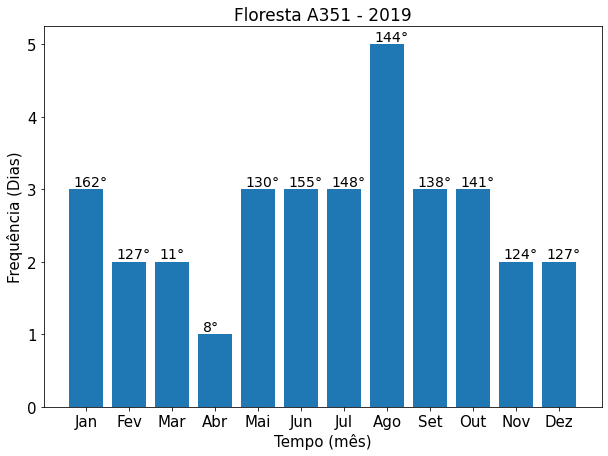

In [528]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2019_JAN[1]), int(mode_2019_FEV[1]), int(mode_2019_MAR[1]), int(mode_2019_ABR[1]),
        int(mode_2019_MAI[1]) , int(mode_2019_JUN[1]), int(mode_2019_JUL[1]),
        int(mode_2019_AGO[1]) , int(mode_2019_SET[1]), int(mode_2019_OUT[1]),
        int(mode_2019_NOV[1]) , int(mode_2019_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.text(0.7,3.05,str(int(mode_2019_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.7,2.05,str(int(mode_2019_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.7,2.05,str(int(mode_2019_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.7,1.05,str(int(mode_2019_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.7,3.05,str(int(mode_2019_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.7,3.05,str(int(mode_2019_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.7,3.05,str(int(mode_2019_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.7,5.05,str(int(mode_2019_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.7,3.05,str(int(mode_2019_SET[0])) + r'$\degree$', size = 14)
plt.text(9.7,3.05,str(int(mode_2019_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.7,2.05,str(int(mode_2019_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.7,2.05,str(int(mode_2019_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('Floresta A351 - 2019', size = 17)
plt.savefig('direcoes_floresta-2019')

#### velocidade x tempo

In [462]:
df.set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index().loc[df.set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()['Vel. Vento (m/s)'] > 7]

Datetime  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
48  2014-02-03 00:00:00            29.1           50.0               972.7   
66  2014-02-03 18:00:00            32.7           41.0               970.7   
216 2014-02-10 00:00:00            27.9           56.0               974.3   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
48                7.2           140.0         0.0  
66                7.6           163.0         0.0  
216               7.1           122.0         0.0

In [450]:
median_2014_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2014_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2014-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [451]:
median_2014_vel_JAN = [median_2014_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_JAN['Vel. Vento (m/s)']))]
median_2014_vel_FEV = [median_2014_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_FEV['Vel. Vento (m/s)']))]
median_2014_vel_MAR = [median_2014_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_MAR['Vel. Vento (m/s)']))]
median_2014_vel_ABR = [median_2014_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_ABR['Vel. Vento (m/s)']))]
median_2014_vel_MAI = [median_2014_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_MAI['Vel. Vento (m/s)']))]
median_2014_vel_JUN = [median_2014_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_JUN['Vel. Vento (m/s)']))]
median_2014_vel_JUL = [median_2014_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_JUL['Vel. Vento (m/s)']))]
median_2014_vel_AGO = [median_2014_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_AGO['Vel. Vento (m/s)']))]
median_2014_vel_SET = [median_2014_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_SET['Vel. Vento (m/s)']))]
median_2014_vel_OUT = [median_2014_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_OUT['Vel. Vento (m/s)']))]
median_2014_vel_NOV = [median_2014_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_NOV['Vel. Vento (m/s)']))]
median_2014_vel_DEZ = [median_2014_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2014_vel_DEZ['Vel. Vento (m/s)']))]

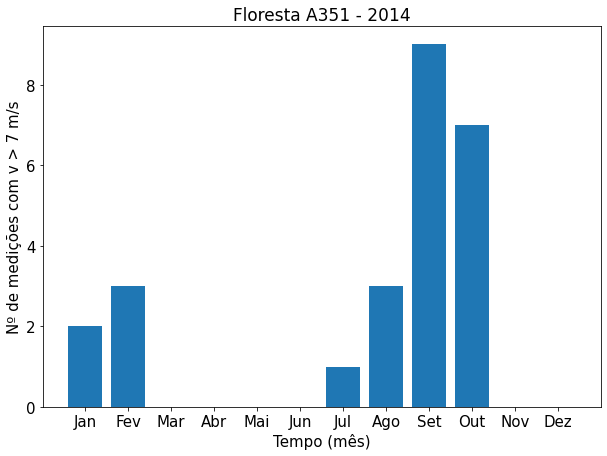

In [529]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2014_vel_JAN), len(median_2014_vel_FEV), len(median_2014_vel_MAR), 
         len(median_2014_vel_ABR), len(median_2014_vel_MAI), len(median_2014_vel_JUN),
         len(median_2014_vel_JUL), len(median_2014_vel_AGO), len(median_2014_vel_SET),
         len(median_2014_vel_OUT), len(median_2014_vel_NOV), len(median_2014_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2014', size = 17)
plt.savefig('velocidades_floresta-2014')

In [463]:
median_2015_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2015_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2015-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [464]:
median_2015_vel_JAN = [median_2015_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_JAN['Vel. Vento (m/s)']))]
median_2015_vel_FEV = [median_2015_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_FEV['Vel. Vento (m/s)']))]
median_2015_vel_MAR = [median_2015_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_MAR['Vel. Vento (m/s)']))]
median_2015_vel_ABR = [median_2015_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_ABR['Vel. Vento (m/s)']))]
median_2015_vel_MAI = [median_2015_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_MAI['Vel. Vento (m/s)']))]
median_2015_vel_JUN = [median_2015_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_JUN['Vel. Vento (m/s)']))]
median_2015_vel_JUL = [median_2015_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_JUL['Vel. Vento (m/s)']))]
median_2015_vel_AGO = [median_2015_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_AGO['Vel. Vento (m/s)']))]
median_2015_vel_SET = [median_2015_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_SET['Vel. Vento (m/s)']))]
median_2015_vel_OUT = [median_2015_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_OUT['Vel. Vento (m/s)']))]
median_2015_vel_NOV = [median_2015_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_NOV['Vel. Vento (m/s)']))]
median_2015_vel_DEZ = [median_2015_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2015_vel_DEZ['Vel. Vento (m/s)']))]

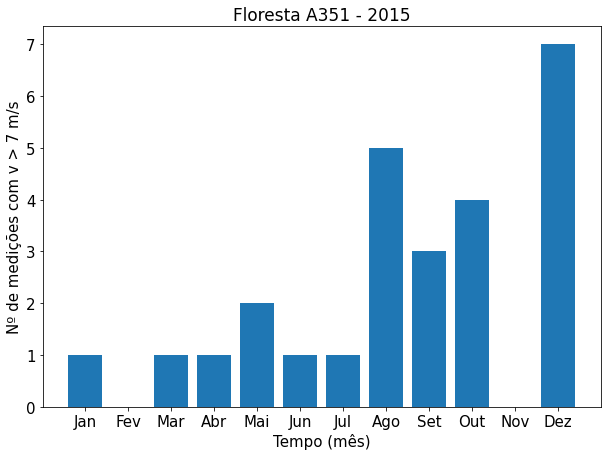

In [530]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2015_vel_JAN), len(median_2015_vel_FEV), len(median_2015_vel_MAR), 
         len(median_2015_vel_ABR), len(median_2015_vel_MAI), len(median_2015_vel_JUN),
         len(median_2015_vel_JUL), len(median_2015_vel_AGO), len(median_2015_vel_SET),
         len(median_2015_vel_OUT), len(median_2015_vel_NOV), len(median_2015_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2015', size = 17)
plt.savefig('velocidades_floresta-2015')

In [466]:
median_2016_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2016_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2016-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [467]:
median_2016_vel_JAN = [median_2016_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_JAN['Vel. Vento (m/s)']))]
median_2016_vel_FEV = [median_2016_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_FEV['Vel. Vento (m/s)']))]
median_2016_vel_MAR = [median_2016_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_MAR['Vel. Vento (m/s)']))]
median_2016_vel_ABR = [median_2016_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_ABR['Vel. Vento (m/s)']))]
median_2016_vel_MAI = [median_2016_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_MAI['Vel. Vento (m/s)']))]
median_2016_vel_JUN = [median_2016_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_JUN['Vel. Vento (m/s)']))]
median_2016_vel_JUL = [median_2016_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_JUL['Vel. Vento (m/s)']))]
median_2016_vel_AGO = [median_2016_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_AGO['Vel. Vento (m/s)']))]
median_2016_vel_SET = [median_2016_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_SET['Vel. Vento (m/s)']))]
median_2016_vel_OUT = [median_2016_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_OUT['Vel. Vento (m/s)']))]
median_2016_vel_NOV = [median_2016_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_NOV['Vel. Vento (m/s)']))]
median_2016_vel_DEZ = [median_2016_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2016_vel_DEZ['Vel. Vento (m/s)']))]

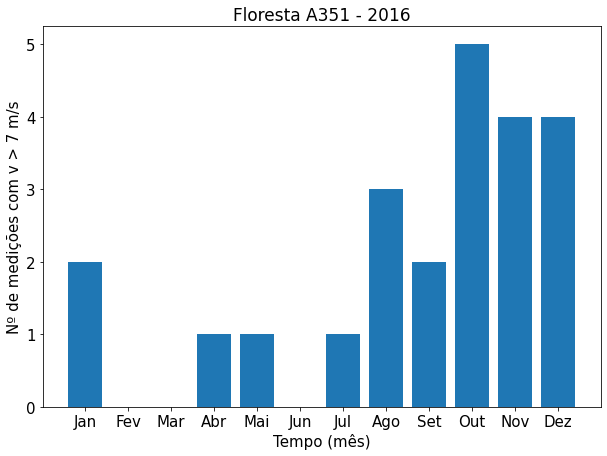

In [531]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2016_vel_JAN), len(median_2016_vel_FEV), len(median_2016_vel_MAR), 
         len(median_2016_vel_ABR), len(median_2016_vel_MAI), len(median_2016_vel_JUN),
         len(median_2016_vel_JUL), len(median_2016_vel_AGO), len(median_2016_vel_SET),
         len(median_2016_vel_OUT), len(median_2016_vel_NOV), len(median_2016_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2016', size = 17)
plt.savefig('velocidades_floresta-2016')

In [469]:
median_2017_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2017_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2017-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [470]:
median_2017_vel_JAN = [median_2017_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_JAN['Vel. Vento (m/s)']))]
median_2017_vel_FEV = [median_2017_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_FEV['Vel. Vento (m/s)']))]
median_2017_vel_MAR = [median_2017_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_MAR['Vel. Vento (m/s)']))]
median_2017_vel_ABR = [median_2017_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_ABR['Vel. Vento (m/s)']))]
median_2017_vel_MAI = [median_2017_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_MAI['Vel. Vento (m/s)']))]
median_2017_vel_JUN = [median_2017_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_JUN['Vel. Vento (m/s)']))]
median_2017_vel_JUL = [median_2017_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_JUL['Vel. Vento (m/s)']))]
median_2017_vel_AGO = [median_2017_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_AGO['Vel. Vento (m/s)']))]
median_2017_vel_SET = [median_2017_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_SET['Vel. Vento (m/s)']))]
median_2017_vel_OUT = [median_2017_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_OUT['Vel. Vento (m/s)']))]
median_2017_vel_NOV = [median_2017_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_NOV['Vel. Vento (m/s)']))]
median_2017_vel_DEZ = [median_2017_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2017_vel_DEZ['Vel. Vento (m/s)']))]

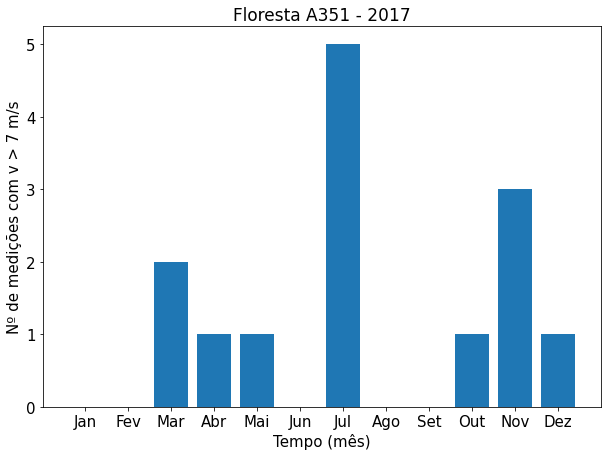

In [532]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2017_vel_JAN), len(median_2017_vel_FEV), len(median_2017_vel_MAR), 
         len(median_2017_vel_ABR), len(median_2017_vel_MAI), len(median_2017_vel_JUN),
         len(median_2017_vel_JUL), len(median_2017_vel_AGO), len(median_2017_vel_SET),
         len(median_2017_vel_OUT), len(median_2017_vel_NOV), len(median_2017_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2017', size = 17)
plt.savefig('velocidades_floresta-2017')

In [472]:
median_2018_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2018_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2018-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [473]:
median_2018_vel_JAN = [median_2018_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_JAN['Vel. Vento (m/s)']))]
median_2018_vel_FEV = [median_2018_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_FEV['Vel. Vento (m/s)']))]
median_2018_vel_MAR = [median_2018_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_MAR['Vel. Vento (m/s)']))]
median_2018_vel_ABR = [median_2018_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_ABR['Vel. Vento (m/s)']))]
median_2018_vel_MAI = [median_2018_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_MAI['Vel. Vento (m/s)']))]
median_2018_vel_JUN = [median_2018_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_JUN['Vel. Vento (m/s)']))]
median_2018_vel_JUL = [median_2018_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_JUL['Vel. Vento (m/s)']))]
median_2018_vel_AGO = [median_2018_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_AGO['Vel. Vento (m/s)']))]
median_2018_vel_SET = [median_2018_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_SET['Vel. Vento (m/s)']))]
median_2018_vel_OUT = [median_2018_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_OUT['Vel. Vento (m/s)']))]
median_2018_vel_NOV = [median_2018_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_NOV['Vel. Vento (m/s)']))]
median_2018_vel_DEZ = [median_2018_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2018_vel_DEZ['Vel. Vento (m/s)']))]

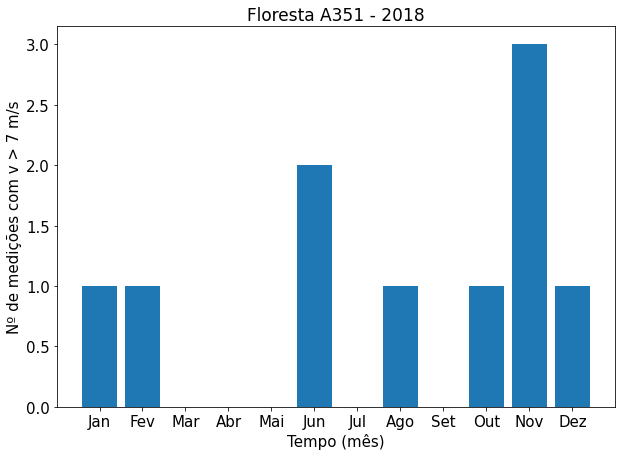

In [534]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2018_vel_JAN), len(median_2018_vel_FEV), len(median_2018_vel_MAR), 
         len(median_2018_vel_ABR), len(median_2018_vel_MAI), len(median_2018_vel_JUN),
         len(median_2018_vel_JUL), len(median_2018_vel_AGO), len(median_2018_vel_SET),
         len(median_2018_vel_OUT), len(median_2018_vel_NOV), len(median_2018_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2018', size = 17)
plt.savefig('velocidades_floresta-2018')

In [475]:
median_2019_vel_JAN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-01', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_FEV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-02', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_MAR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-03', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_ABR = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-04', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_MAI = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-05', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_JUN = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-06', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_JUL = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-07', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_AGO = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-08', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_SET = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-09', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_OUT = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-10', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_NOV = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-11', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]
median_2019_vel_DEZ = df.loc[df['Vel. Vento (m/s)'] > 7].set_index('Datetime').filter(like = '2019-12', axis = 0).reset_index()[['Datetime', 'Vel. Vento (m/s)']]

In [476]:
median_2019_vel_JAN = [median_2019_vel_JAN['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_JAN['Vel. Vento (m/s)']))]
median_2019_vel_FEV = [median_2019_vel_FEV['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_FEV['Vel. Vento (m/s)']))]
median_2019_vel_MAR = [median_2019_vel_MAR['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_MAR['Vel. Vento (m/s)']))]
median_2019_vel_ABR = [median_2019_vel_ABR['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_ABR['Vel. Vento (m/s)']))]
median_2019_vel_MAI = [median_2019_vel_MAI['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_MAI['Vel. Vento (m/s)']))]
median_2019_vel_JUN = [median_2019_vel_JUN['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_JUN['Vel. Vento (m/s)']))]
median_2019_vel_JUL = [median_2019_vel_JUL['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_JUL['Vel. Vento (m/s)']))]
median_2019_vel_AGO = [median_2019_vel_AGO['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_AGO['Vel. Vento (m/s)']))]
median_2019_vel_SET = [median_2019_vel_SET['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_SET['Vel. Vento (m/s)']))]
median_2019_vel_OUT = [median_2019_vel_OUT['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_OUT['Vel. Vento (m/s)']))]
median_2019_vel_NOV = [median_2019_vel_NOV['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_NOV['Vel. Vento (m/s)']))]
median_2019_vel_DEZ = [median_2019_vel_DEZ['Vel. Vento (m/s)'][i] for i in range(len(median_2019_vel_DEZ['Vel. Vento (m/s)']))]

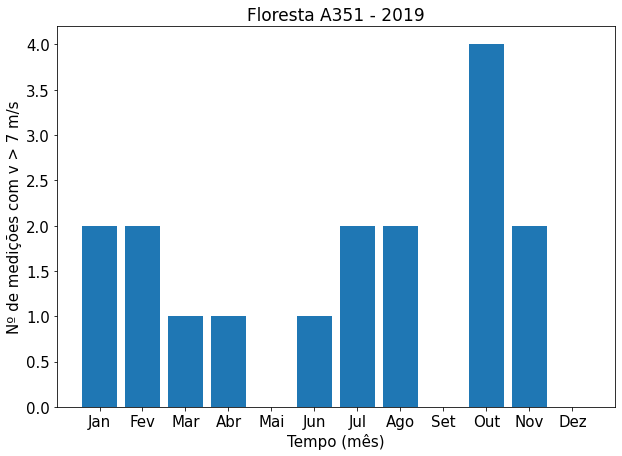

In [535]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(median_2019_vel_JAN), len(median_2019_vel_FEV), len(median_2019_vel_MAR), 
         len(median_2019_vel_ABR), len(median_2019_vel_MAI), len(median_2019_vel_JUN),
         len(median_2019_vel_JUL), len(median_2019_vel_AGO), len(median_2019_vel_SET),
         len(median_2019_vel_OUT), len(median_2019_vel_NOV), len(median_2019_vel_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 7 m/s', size = 15)
plt.title('Floresta A351 - 2019', size = 17)
plt.savefig('velocidades_floresta-2019')

# **Dados OASI**

In [22]:
#importando dados  pressao em mmHg
df_OASI = pd.read_csv('Data_Todo.txt',delimiter = '\t', skiprows = 1, 
                      usecols = ['Date','Unnamed: 1', 'Temp','Temp.1','Rain', 'Pt.', 'Speed', 'Index.2'])

print(df_OASI.info())
df_OASI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235640 entries, 0 to 235639
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        235640 non-null  object 
 1   Unnamed: 1  235640 non-null  object 
 2   Temp        235640 non-null  object 
 3   Temp.1      235640 non-null  object 
 4   Pt.         235640 non-null  float64
 5   Speed       235640 non-null  object 
 6   Index.2     235640 non-null  object 
 7   Rain        235640 non-null  float64
dtypes: float64(2), object(6)
memory usage: 14.4+ MB
None


/home/tatiane/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Date Unnamed: 1  Temp Temp.1  Pt. Speed Index.2  Rain
0  03/09/14       7:02  24.7     78  6.7     E   760.1   0.0
1  03/09/14       7:03  24.7     78  5.8     E   760.1   0.0
2  03/09/14       7:04  24.7     78  5.8     N   760.1   0.0
3  03/09/14       7:05  24.7     78  5.8     N   760.1   0.0
4  03/09/14       7:06  24.7     78  5.8     N   760.1   0.0

In [23]:
# arrumando especificidades do arquivo
df_OASI['Datetime'] = df_OASI['Date'] + ' ' + df_OASI['Unnamed: 1']
del df_OASI['Unnamed: 1']
del df_OASI['Date']

In [24]:
df_OASI['Datetime']

0          03/09/14 7:02
1          03/09/14 7:03
2          03/09/14 7:04
3          03/09/14 7:05
4          03/09/14 7:06
               ...      
235635    06/12/18 22:21
235636    06/12/18 22:22
235637    06/12/18 22:23
235638    06/12/18 22:24
235639    06/12/18 22:25
Name: Datetime, Length: 235640, dtype: object

In [25]:
#convertendo a data em um objeto datetime do pandas
df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'], format = '%d/%m/%y %H:%M')

#convertendo a data em um objeto datetime do astropy
df_OASI['Datetime'] = Time(df_OASI['Datetime'], scale = 'utc')

In [26]:
df_OASI.head()

Temp Temp.1  Pt. Speed Index.2  Rain                       Datetime
0  24.7     78  6.7     E   760.1   0.0  2014-09-03T07:02:00.000000000
1  24.7     78  5.8     E   760.1   0.0  2014-09-03T07:03:00.000000000
2  24.7     78  5.8     N   760.1   0.0  2014-09-03T07:04:00.000000000
3  24.7     78  5.8     N   760.1   0.0  2014-09-03T07:05:00.000000000
4  24.7     78  5.8     N   760.1   0.0  2014-09-03T07:06:00.000000000

In [27]:
#transformando valores de umidade em float
#df_OASI['Temp.1'] = df_OASI['Temp.1'].astype('float64')

#pegando apenas os valores diferentes de '---'
df_OASI = df_OASI.loc[(df_OASI['Temp.1']) != '---', :]
df_OASI = df_OASI.loc[(df_OASI['Temp']) != '---', :]

#transformando a coluna de umidade em float
df_OASI['Temp.1'] = df_OASI['Temp.1'].astype('float64')

#transformando a coluna de temperatura externa em float
df_OASI['Temp'] = df_OASI['Temp'].astype('float64')

#transformando a coluna de pressao em float
df_OASI['Index.2'] = df_OASI['Index.2'].astype('float64')

In [28]:
df_OASI.columns = ['Temp Ext','Hum', 'Wind Speed', 'Wind Dir', 'Pressure', 'Rain', 'Datetime']
df_OASI.head()

Temp Ext   Hum  Wind Speed Wind Dir  Pressure  Rain  \
0      24.7  78.0         6.7        E     760.1   0.0   
1      24.7  78.0         5.8        E     760.1   0.0   
2      24.7  78.0         5.8        N     760.1   0.0   
3      24.7  78.0         5.8        N     760.1   0.0   
4      24.7  78.0         5.8        N     760.1   0.0   

                        Datetime  
0  2014-09-03T07:02:00.000000000  
1  2014-09-03T07:03:00.000000000  
2  2014-09-03T07:04:00.000000000  
3  2014-09-03T07:05:00.000000000  
4  2014-09-03T07:06:00.000000000

In [29]:
mapeamento = {'N':0, 'NNE':22.5, 'NE':45, 'ENE':67.5, 'E':90, 
'ESE':112.5, 'SE':135, 'SSE':157.5, 'S':180, 'SSW':202.5, 'SW':225, 'WSW':247.5,
'W':270, 'WNW':292.5, 'NW':315, 'NNW':337.5}

df_OASI['Angles'] = df_OASI['Wind Dir'].map(mapeamento)

In [30]:
df_OASI.dropna(inplace = True)

In [31]:
df_OASI

Temp Ext   Hum  Wind Speed Wind Dir  Pressure  Rain  \
0           24.7  78.0         6.7        E     760.1   0.0   
1           24.7  78.0         5.8        E     760.1   0.0   
2           24.7  78.0         5.8        N     760.1   0.0   
3           24.7  78.0         5.8        N     760.1   0.0   
4           24.7  78.0         5.8        N     760.1   0.0   
...          ...   ...         ...      ...       ...   ...   
235634      24.9  78.0         0.0        N     760.3   0.0   
235636      24.9  78.0         0.0        N     760.3   0.0   
235637      24.9  78.0         0.4        N     760.3   0.0   
235638      24.9  78.0         0.0        N     760.3   0.0   
235639      24.9  78.0         0.0        N     760.3   0.0   

                             Datetime  Angles  
0       2014-09-03T07:02:00.000000000    90.0  
1       2014-09-03T07:03:00.000000000    90.0  
2       2014-09-03T07:04:00.000000000     0.0  
3       2014-09-03T07:05:00.000000000     0.0  
4       2014-09-03T07:06:00.000000000     0.0  
...                               ...     ...  
235634  2018-12-06T22:20:00.000000000     0.0  
235636  2018-12-06T22:22:00.000000000     0.0  
235637  2018-12-06T22:23:00.000000000     0.0  
235638  2018-12-06T22:24:00.000000000     0.0  
235639  2018-12-06T22:25:00.000000000     0.0  

[187745 rows x 8 columns]

In [32]:
df_OASI.to_csv('dados_2014-2018_OASI')

In [33]:
#filtrando dados por ano -- o método .filter() filtra por indice
df_OASI_2014 = df_OASI.set_index('Datetime').filter(like='2014-',axis=0).reset_index()
df_OASI_2015 = df_OASI.set_index('Datetime').filter(like='2015-',axis=0).reset_index()
df_OASI_2016 = df_OASI.set_index('Datetime').filter(like='2016-',axis=0).reset_index()
df_OASI_2017 = df_OASI.set_index('Datetime').filter(like='2017-',axis=0).reset_index()
df_OASI_2018 = df_OASI.set_index('Datetime').filter(like='2018-',axis=0).reset_index()

## **PLOTS**

In [ ]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2014-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc' )

dt_2014 = [ (i - itime)/365 for i in df_OASI_2014['Datetime']]
dt_2015 = [ (i - itime)/365 for i in df_OASI_2015['Datetime']]
dt_2016 = [ (i - itime)/365 for i in df_OASI_2016['Datetime']]
dt_2017 = [ (i - itime)/365 for i in df_OASI_2017['Datetime']]
dt_2018 = [ (i - itime)/365 for i in df_OASI_2018['Datetime']]

In [ ]:
dt_2014[0]

In [ ]:
#transformando float object para fazer o plot
dt_2014 = [dt_2014[i].value for i in range(len(dt_2014))]
dt_2015 = [dt_2015[i].value for i in range(len(dt_2015))]
dt_2016 = [dt_2016[i].value for i in range(len(dt_2016))]
dt_2017 = [dt_2017[i].value for i in range(len(dt_2017))]
dt_2018 = [dt_2018[i].value for i in range(len(dt_2018))]

In [ ]:
dt_2014[0]

In [ ]:
plt.figure(figsize=(9,7))

plt.scatter(dt_2014,df_OASI_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Hum'], label = 2018, color = 'royalblue')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,6,1),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('OASI', size = 17)
plt.savefig('umidade_2014-2018_OASI.png')

plt.show()

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014,df_OASI_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Rain'], label = 2018, color = 'royalblue')
plt.title('OASI', size = 17)
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')' ,size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,5)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2014-2018_OASI.png')

In [ ]:
plt.subplot(121)
plt.scatter(dt_2014,df_OASI_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Rain'], label = 2018, color = 'royalblue')
plt.title(r'Precipitação', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')' ,size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,5)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
#plt.savefig('precipitacao_2014-2018_OASI.png')

plt.subplot(122)
plt.scatter(dt_2014,df_OASI_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_OASI_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_OASI_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_OASI_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_OASI_2018['Hum'], label = 2018, color = 'royalblue')
#plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'Umidade relativa', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI['Datetime'][0]) + ')', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,6,1),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.suptitle('OASI', size = 17)
#plt.savefig('umidade_2014-2018_OASI.png')

plt.show()

## **PLOTS INDIVIDUAIS**

### **2014**

In [ ]:
#tempos para plotar apenas o ano de 2014
dt_2014 = [dt_2014[i]*365/30 for i in range(len(dt_2014))]

In [ ]:
plt.subplot(121)
plt.scatter(dt_2014,df_OASI_2014['Rain'], label = '2014', color = 'navy')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2014['Datetime'][0]) + ')', size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2014.png')

plt.subplot(122)
plt.scatter(dt_2014,df_OASI_2014['Hum'], label = '2014', color = 'navy')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2014['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.legend()

plt.suptitle('OASI - 2014', size = 17)
plt.savefig('umidade_OASI-2014.png')


plt.savefig('OASI-2014.png')
plt.show

In [ ]:
#inicializando listas
dt_2015 = []
dt_2016 = []
dt_2017 = []
dt_2018 = []

#Inicio das observaçoes
it = '2015-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2015 = [ (i - itime)/30 for i in df_OASI_2015['Datetime']]

#Inicio das observaçoes
it = '2016-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2016 = [ (i - itime)/30 for i in df_OASI_2016['Datetime']]

#Inicio das observaçoes
it = '2017-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2017 = [ (i - itime)/30 for i in df_OASI_2017['Datetime']]

#Inicio das observaçoes
it = '2018-01-01 00:00:00'
itime = Time(it, format = 'iso', scale = 'utc' )
dt_2018 = [ (i - itime)/30 for i in df_OASI_2018['Datetime']]


dt_2015 = [dt_2015[i].value for i in range(len(dt_2015))]
dt_2016 = [dt_2016[i].value for i in range(len(dt_2016))]
dt_2017 = [dt_2017[i].value for i in range(len(dt_2017))]
dt_2018 = [dt_2018[i].value for i in range(len(dt_2018))]

### **2015**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2015,df_OASI_2015['Rain'], label = '2015', color = 'blue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2015['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 5)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2015.png')


plt.subplot(122)
plt.scatter(dt_2015,df_OASI_2015['Hum'], label = '2015', color = 'blue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2015['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size = 13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()


plt.suptitle('OASI', size = 17)
plt.savefig('umidade_OASI-2015.png')

plt.savefig('OASI-2015.png')
plt.show

### **2016**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2016,df_OASI_2016['Rain'], label = '2016', color = 'darkcyan')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2016['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(0)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2016.png')


plt.subplot(122)
plt.scatter(dt_2016,df_OASI_2016['Hum'], label = '2016', color = 'darkcyan')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2016['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('umidade_OASI-2016.png')

plt.suptitle('OASI - 2016', size = 17)

plt.savefig('OASI-2016.png')
plt.show

### **2017**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2017,df_OASI_2017['Rain'], label = '2017', color = 'darkturquoise')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2017['Datetime'][0]) + ')', size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 1)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2017.png')


plt.subplot(122)
plt.scatter(dt_2017,df_OASI_2017['Hum'], label = '2017', color = 'darkturquoise')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2017['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')lecyccs@hotmail.com
plt.legend()
plt.savefig('umidade_OASI-2017.png')


plt.suptitle('OASI - 2017', size = 17)

plt.savefig('OASI-2017.png')
plt.show

### **2018**

In [ ]:
plt.subplot(121)
plt.scatter(dt_2018,df_OASI_2018['Hum'], label = '2018', color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2018['Datetime'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('umidade_OASI-2018.png')

plt.subplot(122)
plt.scatter(dt_2018,df_OASI_2018['Rain'], label = '2018', color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início ' + str(df_OASI_2018['Datetime'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 30)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_OASI-2018.png')

plt.suptitle('OASI - 2018', size = 17)

plt.savefig('OASI-2018.png')
plt.show

## **VALORES MÉDIOS**

In [37]:
df_OASI.head()

Temp Ext   Hum  Wind Speed Wind Dir  Pressure  Rain  \
0      24.7  78.0         6.7        E     760.1   0.0   
1      24.7  78.0         5.8        E     760.1   0.0   
2      24.7  78.0         5.8        N     760.1   0.0   
3      24.7  78.0         5.8        N     760.1   0.0   
4      24.7  78.0         5.8        N     760.1   0.0   

                        Datetime  Angles  
0  2014-09-03T07:02:00.000000000    90.0  
1  2014-09-03T07:03:00.000000000    90.0  
2  2014-09-03T07:04:00.000000000     0.0  
3  2014-09-03T07:05:00.000000000     0.0  
4  2014-09-03T07:06:00.000000000     0.0

In [38]:
df_OASI['Datetime'][0]

<Time object: scale='utc' format='datetime64' value=2014-09-03T07:02:00.000000000>

In [39]:
#df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'], utc = True) 

df_OASI['Datetime'] = pd.to_datetime(df_OASI['Datetime'].astype(str))
df_OASI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187745 entries, 0 to 235639
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Temp Ext    187745 non-null  float64       
 1   Hum         187745 non-null  float64       
 2   Wind Speed  187745 non-null  float64       
 3   Wind Dir    187745 non-null  object        
 4   Pressure    187745 non-null  float64       
 5   Rain        187745 non-null  float64       
 6   Datetime    187745 non-null  datetime64[ns]
 7   Angles      187745 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 17.9+ MB


### **VALORES MÉDIOS ANUAIS**

In [40]:
#media anual
dados_ano = df_OASI.groupby(by = df_OASI.Datetime.dt.year).mean()
dados_ano

Temp Ext        Hum  Wind Speed    Pressure      Rain     Angles
Datetime                                                                   
2014      28.946240  55.810505    5.336674  759.580906  0.092030  34.492209
2015      28.945842  57.138626    5.343017  760.668778  0.002271  27.737724
2016      30.214121  52.214112    5.685621  758.991043  0.000000  24.337251
2017      32.966139  45.351370    5.091621  758.775240  0.000000  34.153972
2018      28.035852  62.503399    4.893060  759.849185  0.032834  20.114697

### **VALORES MÉDIOS DIÁRIOS**

In [41]:
#media diaria
dados_dia = df_OASI.groupby(by = df_OASI.Datetime.dt.date).mean().reset_index()
dados_dia['Datetime'] = pd.to_datetime(dados_dia['Datetime'])
del dados_dia['Angles']
print(dados_dia.dtypes)
dados_dia

Datetime      datetime64[ns]
Temp Ext             float64
Hum                  float64
Wind Speed           float64
Pressure             float64
Rain                 float64
dtype: object


Datetime   Temp Ext        Hum  Wind Speed    Pressure      Rain
0   2014-09-03  24.221074  75.652893    7.407231  761.327686  0.000000
1   2014-09-04  27.152471  62.340304    8.105038  761.209981  0.000000
2   2014-09-05  26.796304  59.585077    6.485983  761.950139  0.000000
3   2014-09-06  27.344306  58.622917    6.678056  761.891875  0.000000
4   2014-09-07  29.739083  49.670306    5.808079  761.641376  0.000000
..         ...        ...        ...         ...         ...       ...
195 2018-12-01  30.567439  55.903158    3.115860  756.976982  0.068351
196 2018-12-02  29.272244  66.373513    2.735924  756.707058  0.811737
197 2018-12-03  28.860151  65.537358    3.039170  756.038717  0.000000
198 2018-12-05  28.264425  67.208577    2.631579  757.611988  0.844932
199 2018-12-06  27.111708  70.198944    1.983979  759.496479  0.212060

[200 rows x 6 columns]

In [42]:
dados_dia.to_csv('dados_media-diaria_OASI')

In [43]:
dados_dia_2014 = dados_dia.set_index('Datetime').filter(like = '2014', axis = 0).reset_index()
dados_dia_2015 = dados_dia.set_index('Datetime').filter(like = '2015', axis = 0).reset_index()
dados_dia_2016 = dados_dia.set_index('Datetime').filter(like = '2016', axis = 0).reset_index()
dados_dia_2017 = dados_dia.set_index('Datetime').filter(like = '2017', axis = 0).reset_index()
dados_dia_2018 = dados_dia.set_index('Datetime').filter(like = '2018', axis = 0).reset_index()

In [44]:
dados_dia_2014['Datetime'] = [str(i) for i in dados_dia_2014['Datetime']]
dados_dia_2015['Datetime'] = [str(i) for i in dados_dia_2015['Datetime']]
dados_dia_2016['Datetime'] = [str(i) for i in dados_dia_2016['Datetime']]
dados_dia_2017['Datetime'] = [str(i) for i in dados_dia_2017['Datetime']]
dados_dia_2018['Datetime'] = [str(i) for i in dados_dia_2018['Datetime']]

In [45]:
dados_dia_2014['Datetime'] = pd.to_datetime(dados_dia_2014['Datetime'])
dados_dia_2014['Datetime'] = Time(dados_dia_2014['Datetime'], scale = 'utc' )

dados_dia_2015['Datetime'] = pd.to_datetime(dados_dia_2015['Datetime'])
dados_dia_2015['Datetime'] = Time(dados_dia_2015['Datetime'], scale = 'utc' )

dados_dia_2016['Datetime'] = pd.to_datetime(dados_dia_2016['Datetime'])
dados_dia_2016['Datetime'] = Time(dados_dia_2016['Datetime'], scale = 'utc' )

dados_dia_2017['Datetime'] = pd.to_datetime(dados_dia_2017['Datetime'])
dados_dia_2017['Datetime'] = Time(dados_dia_2017['Datetime'], scale = 'utc' )

dados_dia_2018['Datetime'] = pd.to_datetime(dados_dia_2018['Datetime'])
dados_dia_2018['Datetime'] = Time(dados_dia_2018['Datetime'], scale = 'utc' )

In [47]:
### criando objeto datetime para cado ano individualmente

#Inicio das observaçoes
it    = '2014-01-01 00:00:00'
#transformando em objeto Time do astropy
itime = Time(it, format = 'iso', scale = 'utc', precision = 3 )

#calculando a diferenca de tempo e transformando float object para fazer o plot

dt_2014_OASI = [ ((i - itime)/365).value for i in dados_dia_2014['Datetime']]

dt_2015_OASI = [ ((i - itime)/365).value for i in dados_dia_2015['Datetime']]

dt_2016_OASI = [ ((i - itime)/365).value for i in dados_dia_2016['Datetime']]

dt_2017_OASI = [ ((i - itime)/365).value for i in dados_dia_2017['Datetime']]

dt_2018_OASI = [ ((i - itime)/365).value for i in dados_dia_2018['Datetime']]

dt_2019_OASI = [ ((i - itime)/365).value for i in df_2019['Datetime']]

TypeError: bad operand type for unary -: 'NotImplementedType'

#### **precipitação**

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014_OASI,dados_dia_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Rain'], label = 2018, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,5),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,5)
plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.legend()
plt.title('OASI', size = 17)

plt.savefig('precipitacao_2014-2018_OASI_diaria.png')

#### **umidade**

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(dt_2014_OASI,dados_dia_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
#plt.ylim(14,25)
plt.ylim(25, 90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.grid(axis = 'x')
plt.legend(loc = 'lower left')
plt.title('OASI', size = 17)

plt.savefig('umidade_2014-2018_OASI_diaria.png')


#### **velocidade do vento**

In [ ]:
plt.scatter(dt_2014_OASI,dados_dia_2014['Wind Speed'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Wind Speed'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Wind Speed'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Wind Speed'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Wind Speed'], label = 2018, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,5)
plt.ylim(-1,10)
plt.xticks(np.arange(0,5),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('OASI', size = 17)
plt.savefig('ventovel_2014-2018-diaria_OASI.png')

plt.show()

#### **pressão**

In [ ]:
plt.scatter(dt_2014_OASI,dados_dia_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Pressure'], label = 2018, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,5),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('OASI', size = 17)
plt.savefig('pressao_2014-2018-diaria_OASI.png')

plt.show()

#### **temperatura externa**

In [ ]:
plt.scatter(dt_2014_OASI,dados_dia_2014['Temp Ext'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Temp Ext'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Temp Ext'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Temp Ext'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Temp Ext'], label = 2018, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura externa ($\degree$ C)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,5),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.legend()

plt.title('OASI', size = 17)
plt.savefig('tempout_2014-2018-diaria_OASI.png')

plt.show()

## **Rosa dos ventos**

In [254]:
df_OASI['Wind Dir'].unique()

array(['E', 'N', 'SSE', 'SE', 'ESE', 'ENE', 'NE', 'NNE', 'NNW', 'S', 'NW',
       'WNW', 'SSW', 'SW', 'WSW', 'W'], dtype=object)

In [255]:
print(df_OASI['Wind Dir'].value_counts().sum())
df_OASI['Wind Dir'].value_counts()

187745


N      147985
E       15940
SSE      8064
ENE      3576
NNE      2652
NE       2542
NW       1259
NNW      1152
S        1149
ESE       906
WNW       753
SE        687
SSW       492
SW        240
W         206
WSW       142
Name: Wind Dir, dtype: int64

In [256]:
df_OASI.dtypes

Temp Ext             float64
Hum                  float64
Wind Speed           float64
Wind Dir              object
Pressure             float64
Rain                 float64
Datetime      datetime64[ns]
Angles               float64
dtype: object

In [257]:
#mediana da moda diaria da direção do vento (em ângulos) no OASI
dados_dia_moda = df_OASI.groupby(df_OASI.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()

#dados_dia_moda = dados_dia_moda[['Datetime','Angles']]

dados_dia_moda.to_csv('OASI_Dirvento_moda')

print(dados_dia_moda.info())
dados_dia_moda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  200 non-null    object 
 1   Angles    200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None


Datetime  Angles
0    2014-09-03     0.0
1    2014-09-04     0.0
2    2014-09-05     0.0
3    2014-09-06     0.0
4    2014-09-07     0.0
..          ...     ...
195  2018-12-01     0.0
196  2018-12-02     0.0
197  2018-12-03     0.0
198  2018-12-05     0.0
199  2018-12-06     0.0

[200 rows x 2 columns]

In [258]:
#media diaria do módulo da velocidade do vento na Floresta em 2014
dados_dia_WindSpeed_median = df_OASI.groupby(df_OASI.Datetime.dt.date)[['Wind Speed']].mean().reset_index()

print(dados_dia_WindSpeed_median.info())
dados_dia_WindSpeed_median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Datetime    200 non-null    object 
 1   Wind Speed  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
None


Datetime  Wind Speed
0    2014-09-03    7.407231
1    2014-09-04    8.105038
2    2014-09-05    6.485983
3    2014-09-06    6.678056
4    2014-09-07    5.808079
..          ...         ...
195  2018-12-01    3.115860
196  2018-12-02    2.735924
197  2018-12-03    3.039170
198  2018-12-05    2.631579
199  2018-12-06    1.983979

[200 rows x 2 columns]

In [259]:
print(dados_dia_moda['Angles'].value_counts().sum())
dados_dia_moda['Angles'].value_counts()

200


0.0      187
315.0      5
90.0       2
157.5      1
247.5      1
22.5       1
180.0      1
225.0      1
67.5       1
Name: Angles, dtype: int64

In [260]:
dados_dia_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  200 non-null    object 
 1   Angles    200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


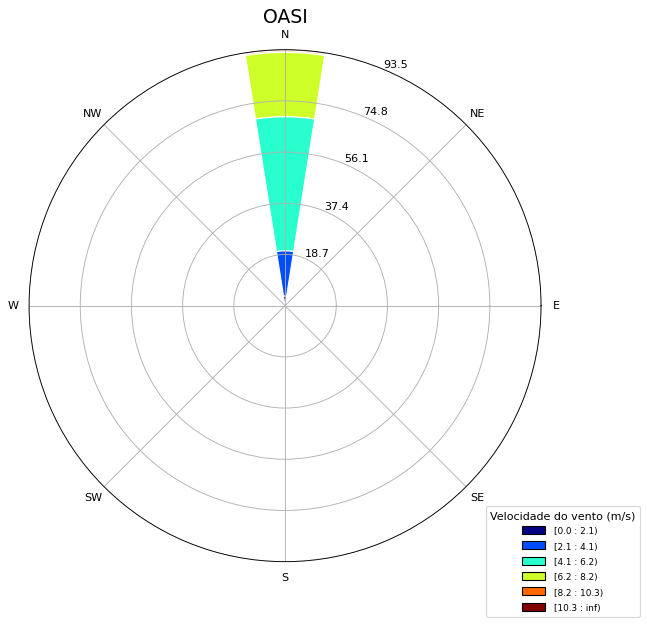

In [261]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(dados_dia_moda['Angles'], dados_dia_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI', size = 17)

plt.savefig('rosadosventos_OASI')
plt.show()

In [262]:
df_OASI_2014['Datetime'] = pd.to_datetime(df_OASI_2014['Datetime'].astype(str))
df_OASI_2015['Datetime'] = pd.to_datetime(df_OASI_2015['Datetime'].astype(str))
df_OASI_2016['Datetime'] = pd.to_datetime(df_OASI_2016['Datetime'].astype(str))
df_OASI_2017['Datetime'] = pd.to_datetime(df_OASI_2017['Datetime'].astype(str))
df_OASI_2018['Datetime'] = pd.to_datetime(df_OASI_2018['Datetime'].astype(str))

In [263]:
#mediana diaria da moda das direções do vento
df_OASI_2014_mode = df_OASI_2014.groupby(df_OASI_2014.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()
df_OASI_2015_mode = df_OASI_2015.groupby(df_OASI_2015.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()
df_OASI_2016_mode = df_OASI_2016.groupby(df_OASI_2016.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()
df_OASI_2017_mode = df_OASI_2017.groupby(df_OASI_2017.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()
df_OASI_2018_mode = df_OASI_2018.groupby(df_OASI_2018.Datetime.dt.date)['Angles'].agg(lambda x: np.median(pd.Series.mode(x))).reset_index()


#media diaria do módulo da velocidade do vento no OASI por ano
df_OASI_2014_WindSpeed_median = df_OASI_2014.groupby(df_OASI_2014.Datetime.dt.date)[['Wind Speed']].mean().reset_index()
df_OASI_2015_WindSpeed_median = df_OASI_2015.groupby(df_OASI_2015.Datetime.dt.date)[['Wind Speed']].mean().reset_index()
df_OASI_2016_WindSpeed_median = df_OASI_2016.groupby(df_OASI_2016.Datetime.dt.date)[['Wind Speed']].mean().reset_index()
df_OASI_2017_WindSpeed_median = df_OASI_2017.groupby(df_OASI_2017.Datetime.dt.date)[['Wind Speed']].mean().reset_index()
df_OASI_2018_WindSpeed_median = df_OASI_2018.groupby(df_OASI_2018.Datetime.dt.date)[['Wind Speed']].mean().reset_index()

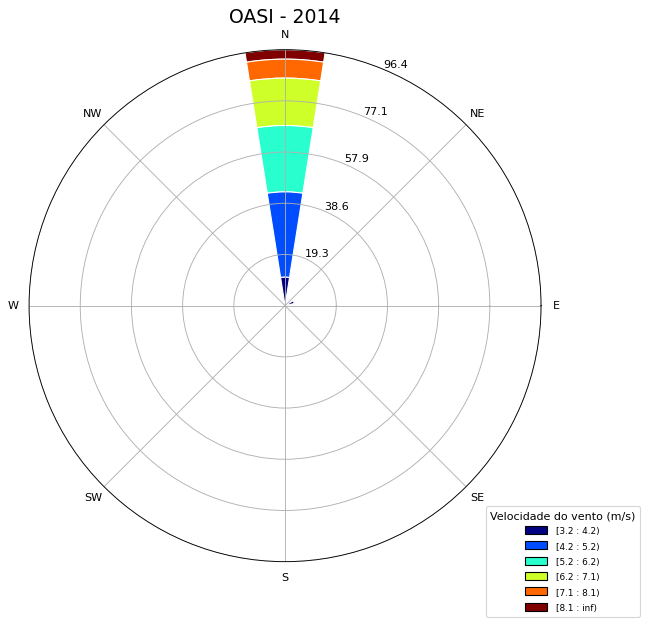

In [264]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(df_OASI_2014_mode['Angles'], df_OASI_2014_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2014', size = 17)

plt.savefig('rosadosventos_OASI_2014')
plt.show()

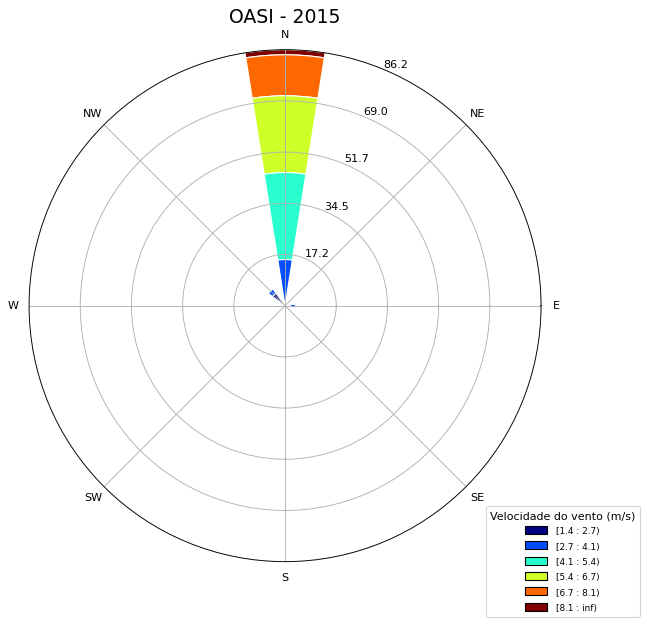

In [265]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(df_OASI_2015_mode['Angles'], df_OASI_2015_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2015', size = 17)

plt.savefig('rosadosventos_OASI_2015')
plt.show()

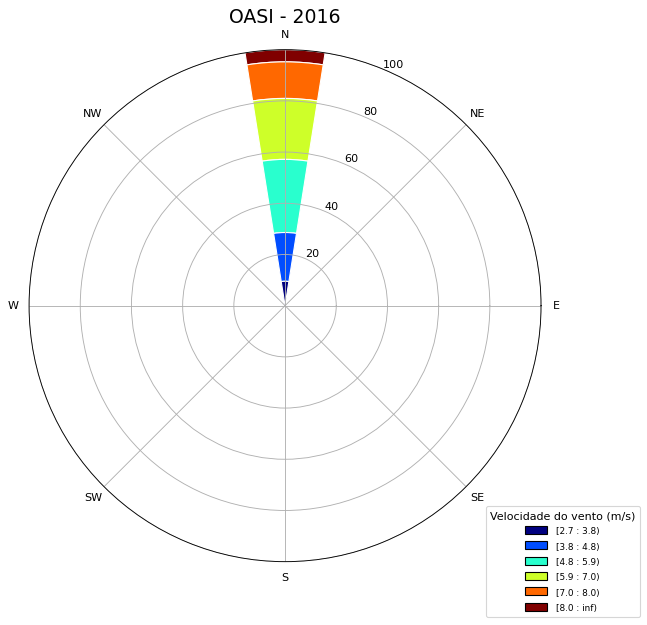

In [266]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(df_OASI_2016_mode['Angles'], df_OASI_2016_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2016', size = 17)

plt.savefig('rosadosventos_OASI_2016')
plt.show()

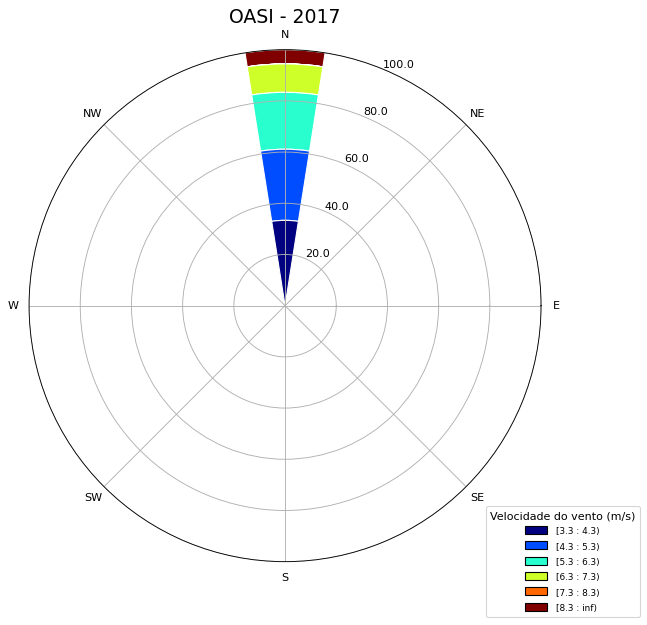

In [267]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(df_OASI_2017_mode['Angles'], df_OASI_2017_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2017', size = 17)

plt.savefig('rosadosventos_OASI_2017')
plt.show()

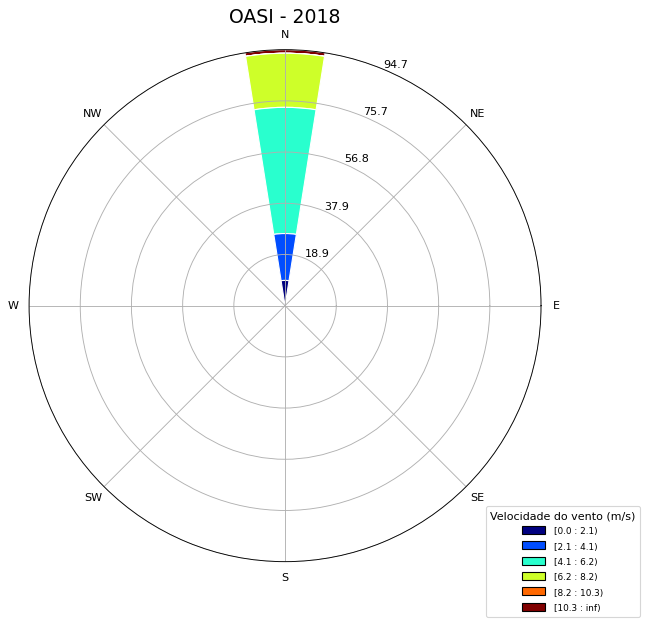

In [268]:
ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade

#ws =[0,4,5,5,6]

#wd =[0,0,0,0,22.5]



ax.bar(df_OASI_2018_mode['Angles'], df_OASI_2018_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2018', size = 17)

plt.savefig('rosadosventos_OASI_2018')
plt.show()

#### direção x tempo

In [294]:
df_OASI_2014_JAN =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-01', axis = 0).reset_index()
df_OASI_2014_FEV =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()
df_OASI_2014_MAR =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-03', axis = 0).reset_index()
df_OASI_2014_ABR =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-04', axis = 0).reset_index()
df_OASI_2014_MAI =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-05', axis = 0).reset_index()
df_OASI_2014_JUN =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-06', axis = 0).reset_index()
df_OASI_2014_JUL =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-07', axis = 0).reset_index()
df_OASI_2014_AGO =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-08', axis = 0).reset_index()
df_OASI_2014_SET =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-09', axis = 0).reset_index()
df_OASI_2014_OUT =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-10', axis = 0).reset_index()
df_OASI_2014_NOV =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-11', axis = 0).reset_index()
df_OASI_2014_DEZ =  df_OASI_2014_mode.set_index('Datetime').filter(like = '2014-12', axis = 0).reset_index()

In [270]:
mode_OASI_2014_JAN = sci.stats.mode(df_OASI_2014_JAN['Angles'])
mode_OASI_2014_FEV = sci.stats.mode(df_OASI_2014_FEV['Angles'])
mode_OASI_2014_MAR = sci.stats.mode(df_OASI_2014_MAR['Angles'])
mode_OASI_2014_ABR = sci.stats.mode(df_OASI_2014_ABR['Angles'])
mode_OASI_2014_MAI = sci.stats.mode(df_OASI_2014_MAI['Angles'])
mode_OASI_2014_JUN = sci.stats.mode(df_OASI_2014_JUN['Angles'])
mode_OASI_2014_JUL = sci.stats.mode(df_OASI_2014_JUL['Angles'])
mode_OASI_2014_AGO = sci.stats.mode(df_OASI_2014_AGO['Angles'])
mode_OASI_2014_SET = sci.stats.mode(df_OASI_2014_SET['Angles'])
mode_OASI_2014_OUT = sci.stats.mode(df_OASI_2014_OUT['Angles'])
mode_OASI_2014_NOV = sci.stats.mode(df_OASI_2014_NOV['Angles']) 
mode_OASI_2014_DEZ = sci.stats.mode(df_OASI_2014_DEZ['Angles'])

In [271]:
mode_OASI_2014_DEZ

ModeResult(mode=array([0.]), count=array([13]))

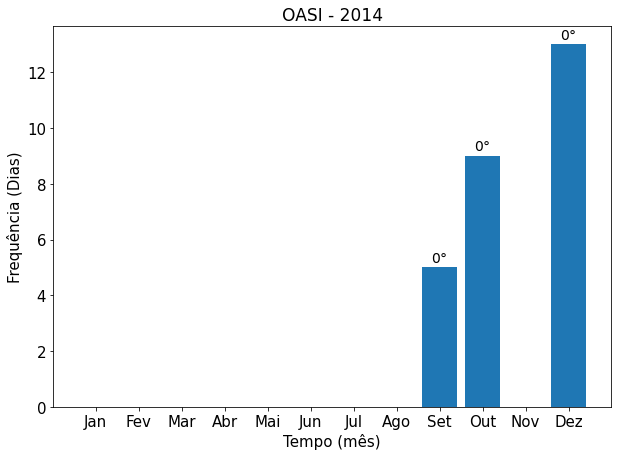

In [536]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [0, 0, 0, 
         0, 0, 0, 
         0, 0, int(mode_OASI_2014_SET[1]), 
         int(mode_OASI_2014_OUT[1]), 0 , int(mode_OASI_2014_DEZ[1])])
        
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

#plt.text(0.7,3.05,str(int(mode_OASI_2014_JAN[0])) + r'$\degree$', size = 14)
#plt.text(1.7,2.05,str(int(mode_OASI_2014_FEV[0])) + r'$\degree$', size = 14)
#plt.text(3.7,3.05,str(int(mode_OASI_2014_ABR[0])) + r'$\degree$', size = 14)
#plt.text(4.7,3.05,str(int(mode_OASI_2014_MAI[0])) + r'$\degree$', size = 14)
#plt.text(5.7,2.05,str(int(mode_OASI_2014_JUN[0])) + r'$\degree$', size = 14)
#plt.text(6.7,2.05,str(int(mode_OASI_2014_JUL[0])) + r'$\degree$', size = 14)
#plt.text(7.7,3.05,str(int(mode_OASI_2014_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.8,5.2,str(int(mode_OASI_2014_SET[0])) + r'$\degree$', size = 14)
plt.text(9.8,9.2,str(int(mode_OASI_2014_OUT[0])) + r'$\degree$', size = 14)
#plt.text(10.7,2.05,str(int(mode_OASI_2014_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.8,13.2,str(int(mode_OASI_2014_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('OASI - 2014', size = 17)
plt.savefig('direcoes_OASI-2014')

In [273]:
df_OASI_2015_JAN =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-01', axis = 0).reset_index()
df_OASI_2015_FEV =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-02', axis = 0).reset_index()
df_OASI_2015_MAR =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-03', axis = 0).reset_index()
df_OASI_2015_ABR =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-04', axis = 0).reset_index()
df_OASI_2015_MAI =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-05', axis = 0).reset_index()
df_OASI_2015_JUN =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-06', axis = 0).reset_index()
df_OASI_2015_JUL =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-07', axis = 0).reset_index()
df_OASI_2015_AGO =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-08', axis = 0).reset_index()
df_OASI_2015_SET =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-09', axis = 0).reset_index()
df_OASI_2015_OUT =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-10', axis = 0).reset_index()
df_OASI_2015_NOV =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-11', axis = 0).reset_index()
df_OASI_2015_DEZ =  df_OASI_2015_mode.set_index('Datetime').filter(like = '2015-12', axis = 0).reset_index()

In [274]:
mode_OASI_2015_JAN = sci.stats.mode(df_OASI_2015_JAN['Angles'])
mode_OASI_2015_FEV = sci.stats.mode(df_OASI_2015_FEV['Angles'])
mode_OASI_2015_MAR = sci.stats.mode(df_OASI_2015_MAR['Angles'])
mode_OASI_2015_ABR = sci.stats.mode(df_OASI_2015_ABR['Angles'])
mode_OASI_2015_MAI = sci.stats.mode(df_OASI_2015_MAI['Angles'])
mode_OASI_2015_JUN = sci.stats.mode(df_OASI_2015_JUN['Angles'])
mode_OASI_2015_JUL = sci.stats.mode(df_OASI_2015_JUL['Angles'])
mode_OASI_2015_AGO = sci.stats.mode(df_OASI_2015_AGO['Angles'])
mode_OASI_2015_SET = sci.stats.mode(df_OASI_2015_SET['Angles'])
mode_OASI_2015_OUT = sci.stats.mode(df_OASI_2015_OUT['Angles'])
mode_OASI_2015_NOV = sci.stats.mode(df_OASI_2015_NOV['Angles']) 
mode_OASI_2015_DEZ = sci.stats.mode(df_OASI_2015_DEZ['Angles'])

In [275]:
mode_OASI_2015_DEZ

ModeResult(mode=array([0.]), count=array([2]))

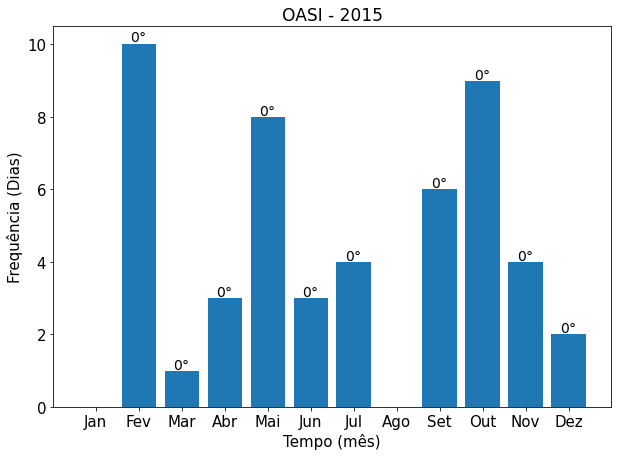

In [537]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [0, int(mode_OASI_2015_FEV[1]), int(mode_OASI_2015_MAR[1]), int(mode_OASI_2015_ABR[1]),
        int(mode_OASI_2015_MAI[1]) , int(mode_OASI_2015_JUN[1]), int(mode_OASI_2015_JUL[1]),
        0 , int(mode_OASI_2015_SET[1]), int(mode_OASI_2015_OUT[1]),
        int(mode_OASI_2015_NOV[1]) , int(mode_OASI_2015_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

#plt.text(0.7,3.05,str(int(mode_OASI_2015_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.8,10.1,str(int(mode_OASI_2015_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.8,1.05,str(int(mode_OASI_2015_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.8,3.05,str(int(mode_OASI_2015_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.8,8.05,str(int(mode_OASI_2015_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.8,3.05,str(int(mode_OASI_2015_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.8,4.05,str(int(mode_OASI_2015_JUL[0])) + r'$\degree$', size = 14)
#plt.text(7.7,2.05,str(int(mode_OASI_2015_AGO[0])) + r'$\degree$', size = 14)
plt.text(8.8,6.05,str(int(mode_OASI_2015_SET[0])) + r'$\degree$', size = 14)
plt.text(9.8,9.05,str(int(mode_OASI_2015_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.8,4.05,str(int(mode_OASI_2015_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.8,2.05,str(int(mode_OASI_2015_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('OASI - 2015', size = 17)
plt.savefig('direcoes_OASI-2015')

In [277]:
df_OASI_2016_JAN =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-01', axis = 0).reset_index()
df_OASI_2016_FEV =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-02', axis = 0).reset_index()
df_OASI_2016_MAR =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-03', axis = 0).reset_index()
df_OASI_2016_ABR =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-04', axis = 0).reset_index()
df_OASI_2016_MAI =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-05', axis = 0).reset_index()
df_OASI_2016_JUN =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-06', axis = 0).reset_index()
df_OASI_2016_JUL =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-07', axis = 0).reset_index()
df_OASI_2016_AGO =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-08', axis = 0).reset_index()
df_OASI_2016_SET =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-09', axis = 0).reset_index()
df_OASI_2016_OUT =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-10', axis = 0).reset_index()
df_OASI_2016_NOV =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-11', axis = 0).reset_index()
df_OASI_2016_DEZ =  df_OASI_2016_mode.set_index('Datetime').filter(like = '2016-12', axis = 0).reset_index()

In [278]:
mode_OASI_2016_JAN = sci.stats.mode(df_OASI_2016_JAN['Angles'])
mode_OASI_2016_FEV = sci.stats.mode(df_OASI_2016_FEV['Angles'])
mode_OASI_2016_MAR = sci.stats.mode(df_OASI_2016_MAR['Angles'])
mode_OASI_2016_ABR = sci.stats.mode(df_OASI_2016_ABR['Angles'])
mode_OASI_2016_MAI = sci.stats.mode(df_OASI_2016_MAI['Angles'])
mode_OASI_2016_JUN = sci.stats.mode(df_OASI_2016_JUN['Angles'])
mode_OASI_2016_JUL = sci.stats.mode(df_OASI_2016_JUL['Angles'])
mode_OASI_2016_AGO = sci.stats.mode(df_OASI_2016_AGO['Angles'])
mode_OASI_2016_SET = sci.stats.mode(df_OASI_2016_SET['Angles'])
mode_OASI_2016_OUT = sci.stats.mode(df_OASI_2016_OUT['Angles'])
mode_OASI_2016_NOV = sci.stats.mode(df_OASI_2016_NOV['Angles']) 
mode_OASI_2016_DEZ = sci.stats.mode(df_OASI_2016_DEZ['Angles'])

In [279]:
mode_OASI_2016_DEZ

ModeResult(mode=array([0.]), count=array([6]))

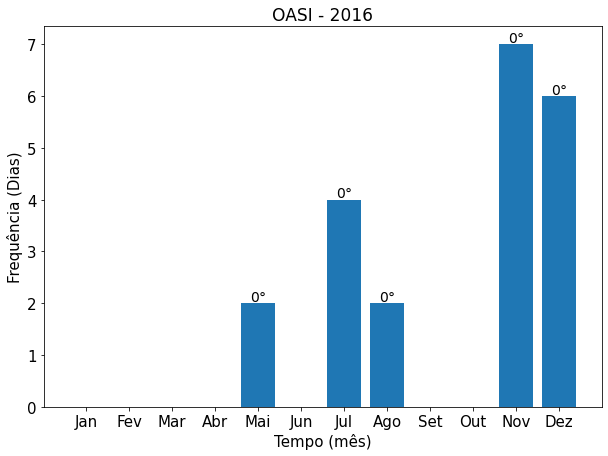

In [538]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [0, 0, 0, 0,
        int(mode_OASI_2016_MAI[1]) , 0, int(mode_OASI_2016_JUL[1]),
        int(mode_OASI_2016_AGO[1]) , 0, 0,
        int(mode_OASI_2016_NOV[1]) , int(mode_OASI_2016_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

#plt.text(0.7,2.05,str(int(mode_OASI_2016_JAN[0])) + r'$\degree$', size = 14)
#plt.text(1.7,4.05,str(int(mode_OASI_2016_FEV[0])) + r'$\degree$', size = 14)
#plt.text(2.7,4.05,str(int(mode_OASI_2016_MAR[0])) + r'$\degree$', size = 14)
#plt.text(3.7,3.05,str(int(mode_OASI_2016_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.8,2.05,str(int(mode_OASI_2016_MAI[0])) + r'$\degree$', size = 14)
#plt.text(5.7,2.05,str(int(mode_OASI_2016_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.8,4.05,str(int(mode_OASI_2016_JUL[0])) + r'$\degree$', size = 14)
plt.text(7.8,2.05,str(int(mode_OASI_2016_AGO[0])) + r'$\degree$', size = 14)
#plt.text(8.7,3.05,str(int(mode_OASI_2016_SET[0])) + r'$\degree$', size = 14)
#plt.text(9.7,3.05,str(int(mode_OASI_2016_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.8,7.05,str(int(mode_OASI_2016_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.8,6.05,str(int(mode_OASI_2016_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('OASI - 2016', size = 17)
plt.savefig('direcoes_OASI-2016')

In [281]:
df_OASI_2017_JAN =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-01', axis = 0).reset_index()
df_OASI_2017_FEV =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-02', axis = 0).reset_index()
df_OASI_2017_MAR =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-03', axis = 0).reset_index()
df_OASI_2017_ABR =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-04', axis = 0).reset_index()
df_OASI_2017_MAI =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-05', axis = 0).reset_index()
df_OASI_2017_JUN =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-06', axis = 0).reset_index()
df_OASI_2017_JUL =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-07', axis = 0).reset_index()
df_OASI_2017_AGO =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-08', axis = 0).reset_index()
df_OASI_2017_SET =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-09', axis = 0).reset_index()
df_OASI_2017_OUT =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-10', axis = 0).reset_index()
df_OASI_2017_NOV =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-11', axis = 0).reset_index()
df_OASI_2017_DEZ =  df_OASI_2017_mode.set_index('Datetime').filter(like = '2017-12', axis = 0).reset_index()

In [282]:
mode_OASI_2017_JAN = sci.stats.mode(df_OASI_2017_JAN['Angles'])
mode_OASI_2017_FEV = sci.stats.mode(df_OASI_2017_FEV['Angles'])
mode_OASI_2017_MAR = sci.stats.mode(df_OASI_2017_MAR['Angles'])
mode_OASI_2017_ABR = sci.stats.mode(df_OASI_2017_ABR['Angles'])
mode_OASI_2017_MAI = sci.stats.mode(df_OASI_2017_MAI['Angles'])
mode_OASI_2017_JUN = sci.stats.mode(df_OASI_2017_JUN['Angles'])
mode_OASI_2017_JUL = sci.stats.mode(df_OASI_2017_JUL['Angles'])
mode_OASI_2017_AGO = sci.stats.mode(df_OASI_2017_AGO['Angles'])
mode_OASI_2017_SET = sci.stats.mode(df_OASI_2017_SET['Angles'])
mode_OASI_2017_OUT = sci.stats.mode(df_OASI_2017_OUT['Angles'])
mode_OASI_2017_NOV = sci.stats.mode(df_OASI_2017_NOV['Angles']) 
mode_OASI_2017_DEZ = sci.stats.mode(df_OASI_2017_DEZ['Angles'])

In [283]:
mode_OASI_2017_DEZ

ModeResult(mode=array([], dtype=float64), count=array([], dtype=float64))

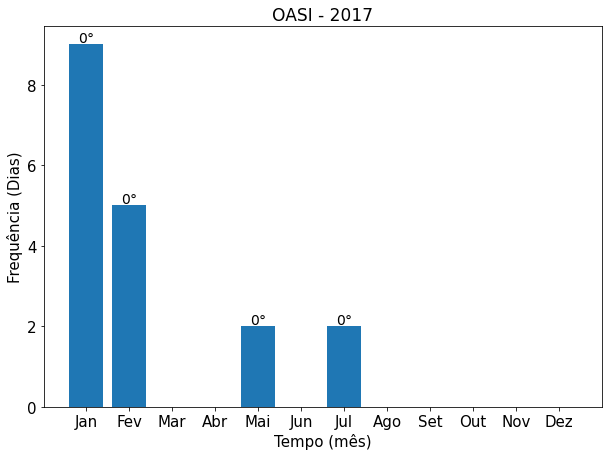

In [539]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_OASI_2017_JAN[1]), int(mode_OASI_2017_FEV[1]), 0, 0,
        int(mode_OASI_2017_MAI[1]) , 0, int(mode_OASI_2017_JUL[1]),
        0 , 0, 0,0,0])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.text(0.8,9.05,str(int(mode_OASI_2017_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.8,5.05,str(int(mode_OASI_2017_FEV[0])) + r'$\degree$', size = 14)
#plt.text(2.7,2.05,str(int(mode_OASI_2017_MAR[0])) + r'$\degree$', size = 14)
#plt.text(3.7,3.05,str(int(mode_OASI_2017_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.8,2.05,str(int(mode_OASI_2017_MAI[0])) + r'$\degree$', size = 14)
#plt.text(5.7,2.05,str(int(mode_OASI_2017_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.8,2.05,str(int(mode_OASI_2017_JUL[0])) + r'$\degree$', size = 14)
#plt.text(7.7,1.05,str(int(mode_OASI_2017_AGO[0])) + r'$\degree$', size = 14)
#plt.text(8.7,4.05,int(mode_2017_SET[0]), size = 14)
#plt.text(9.7,2.05,str(int(mode_OASI_2017_OUT[0])) + r'$\degree$', size = 14)
#plt.text(10.7,3.05,str(int(mode_OASI_2017_NOV[0])) + r'$\degree$', size = 14)
#plt.text(11.7,3.05,str(int(mode_OASI_2017_DEZ[0])) + r'$\degree$', size = 14)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('OASI - 2017', size = 17)
plt.savefig('direcoes_OASI-2017')

In [285]:
df_OASI_2018_JAN =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-01', axis = 0).reset_index()
df_OASI_2018_FEV =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-02', axis = 0).reset_index()
df_OASI_2018_MAR =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-03', axis = 0).reset_index()
df_OASI_2018_ABR =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-04', axis = 0).reset_index()
df_OASI_2018_MAI =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-05', axis = 0).reset_index()
df_OASI_2018_JUN =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-06', axis = 0).reset_index()
df_OASI_2018_JUL =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-07', axis = 0).reset_index()
df_OASI_2018_AGO =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-08', axis = 0).reset_index()
df_OASI_2018_SET =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-09', axis = 0).reset_index()
df_OASI_2018_OUT =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-10', axis = 0).reset_index()
df_OASI_2018_NOV =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-11', axis = 0).reset_index()
df_OASI_2018_DEZ =  df_OASI_2018_mode.set_index('Datetime').filter(like = '2018-12', axis = 0).reset_index()

In [286]:
mode_OASI_2018_JAN = sci.stats.mode(df_OASI_2018_JAN['Angles'])
mode_OASI_2018_FEV = sci.stats.mode(df_OASI_2018_FEV['Angles'])
mode_OASI_2018_MAR = sci.stats.mode(df_OASI_2018_MAR['Angles'])
mode_OASI_2018_ABR = sci.stats.mode(df_OASI_2018_ABR['Angles'])
mode_OASI_2018_MAI = sci.stats.mode(df_OASI_2018_MAI['Angles'])
mode_OASI_2018_JUN = sci.stats.mode(df_OASI_2018_JUN['Angles'])
mode_OASI_2018_JUL = sci.stats.mode(df_OASI_2018_JUL['Angles'])
mode_OASI_2018_AGO = sci.stats.mode(df_OASI_2018_AGO['Angles'])
mode_OASI_2018_SET = sci.stats.mode(df_OASI_2018_SET['Angles'])
mode_OASI_2018_OUT = sci.stats.mode(df_OASI_2018_OUT['Angles'])
mode_OASI_2018_NOV = sci.stats.mode(df_OASI_2018_NOV['Angles']) 
mode_OASI_2018_DEZ = sci.stats.mode(df_OASI_2018_DEZ['Angles'])

In [287]:
mode_OASI_2018_DEZ

ModeResult(mode=array([0.]), count=array([5]))

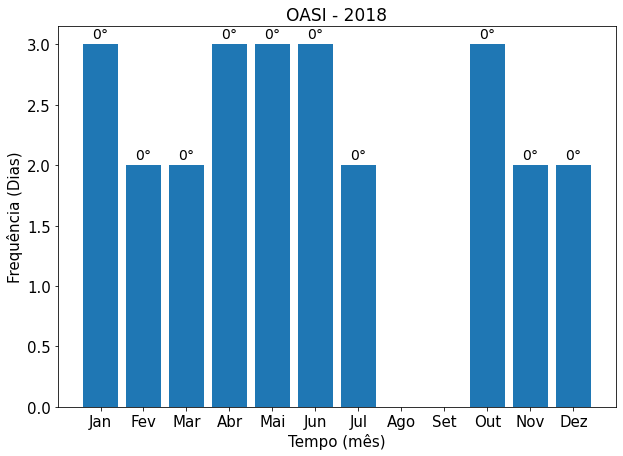

In [540]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [int(mode_2018_JAN[1]), int(mode_2018_FEV[1]), int(mode_2018_MAR[1]), int(mode_2018_ABR[1]),
        int(mode_2018_MAI[1]) , int(mode_2018_JUN[1]), int(mode_2018_JUL[1]),
        0 , 0, int(mode_2018_OUT[1]),
        int(mode_2018_NOV[1]) , int(mode_2018_DEZ[1])])
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.text(0.8,3.05,str(int(mode_OASI_2018_JAN[0])) + r'$\degree$', size = 14)
plt.text(1.8,2.05,str(int(mode_OASI_2018_FEV[0])) + r'$\degree$', size = 14)
plt.text(2.8,2.05,str(int(mode_OASI_2018_MAR[0])) + r'$\degree$', size = 14)
plt.text(3.8,3.05,str(int(mode_OASI_2018_ABR[0])) + r'$\degree$', size = 14)
plt.text(4.8,3.05,str(int(mode_OASI_2018_MAI[0])) + r'$\degree$', size = 14)
plt.text(5.8,3.05,str(int(mode_OASI_2018_JUN[0])) + r'$\degree$', size = 14)
plt.text(6.8,2.05,str(int(mode_OASI_2018_JUL[0])) + r'$\degree$', size = 14)
#plt.text(7.7,3.05,str(int(mode_OASI_2018_AGO[0])) + r'$\degree$', size = 14)
#plt.text(8.7,4.05,str(int(mode_OASI_2018_SET[0])) + r'$\degree$', size = 14)
plt.text(9.8,3.05,str(int(mode_OASI_2018_OUT[0])) + r'$\degree$', size = 14)
plt.text(10.8,2.05,str(int(mode_OASI_2018_NOV[0])) + r'$\degree$', size = 14)
plt.text(11.8,2.05,str(int(mode_OASI_2018_DEZ[0])) + r'$\degree$', size = 14)


plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Frequência (Dias)', size = 15)
plt.title('OASI - 2018', size = 17)
plt.savefig('direcoes_OASI-2018')

#### velocidade x tempo

In [491]:
df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-12', axis = 0).reset_index()

Datetime  Temp Ext   Hum  Wind Speed Wind Dir  Pressure  Rain  \
0   2014-12-01 18:04:00      30.6  49.0        10.7        N     759.3   0.0   
1   2014-12-01 18:07:00      30.5  50.0        10.3        N     759.3   0.0   
2   2014-12-01 18:08:00      30.4  50.0        10.7        N     759.3   0.0   
3   2014-12-01 18:49:00      29.5  54.0        10.3        N     759.9   0.0   
4   2014-12-01 18:50:00      29.5  54.0        10.3        N     759.9   0.0   
..                  ...       ...   ...         ...      ...       ...   ...   
343 2014-12-17 07:06:00      26.9  62.0        10.3        N     759.3   0.0   
344 2014-12-17 07:11:00      26.8  63.0        10.3        N     759.4   0.0   
345 2014-12-17 07:15:00      26.8  63.0        10.3        N     759.5   0.0   
346 2014-12-17 07:20:00      26.7  63.0        10.7        N     759.5   0.0   
347 2014-12-17 07:21:00      26.7  63.0        10.3        N     759.5   0.0   

     Angles  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
343     0.0  
344     0.0  
345     0.0  
346     0.0  
347     0.0  

[348 rows x 8 columns]

In [487]:
df_OASI_vel_2014_JAN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-01', axis = 0).reset_index()
df_OASI_vel_2014_FEV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-02', axis = 0).reset_index()
df_OASI_vel_2014_MAR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-03', axis = 0).reset_index()
df_OASI_vel_2014_ABR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-04', axis = 0).reset_index()
df_OASI_vel_2014_MAI =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-05', axis = 0).reset_index()
df_OASI_vel_2014_JUN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-06', axis = 0).reset_index()
df_OASI_vel_2014_JUL =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-07', axis = 0).reset_index()
df_OASI_vel_2014_AGO =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-08', axis = 0).reset_index()
df_OASI_vel_2014_SET =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-09', axis = 0).reset_index()
df_OASI_vel_2014_OUT =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-10', axis = 0).reset_index()
df_OASI_vel_2014_NOV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-11', axis = 0).reset_index()
df_OASI_vel_2014_DEZ =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2014-12', axis = 0).reset_index()

In [488]:
df_OASI_vel_2014_JAN = [df_OASI_vel_2014_JAN['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_JAN['Wind Speed']))]
df_OASI_vel_2014_FEV = [df_OASI_vel_2014_FEV['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_FEV['Wind Speed']))]
df_OASI_vel_2014_MAR = [df_OASI_vel_2014_MAR['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_MAR['Wind Speed']))]
df_OASI_vel_2014_ABR = [df_OASI_vel_2014_ABR['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_ABR['Wind Speed']))]
df_OASI_vel_2014_MAI = [df_OASI_vel_2014_MAI['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_MAI['Wind Speed']))]
df_OASI_vel_2014_JUN = [df_OASI_vel_2014_JUN['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_JUN['Wind Speed']))]
df_OASI_vel_2014_JUL = [df_OASI_vel_2014_JUL['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_JUL['Wind Speed']))]
df_OASI_vel_2014_AGO = [df_OASI_vel_2014_AGO['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_AGO['Wind Speed']))]
df_OASI_vel_2014_SET = [df_OASI_vel_2014_SET['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_SET['Wind Speed']))]
df_OASI_vel_2014_OUT = [df_OASI_vel_2014_OUT['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_OUT['Wind Speed']))]
df_OASI_vel_2014_NOV = [df_OASI_vel_2014_NOV['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_NOV['Wind Speed']))]
df_OASI_vel_2014_DEZ = [df_OASI_vel_2014_DEZ['Wind Speed'][i] for i in range(len(df_OASI_vel_2014_DEZ['Wind Speed']))]

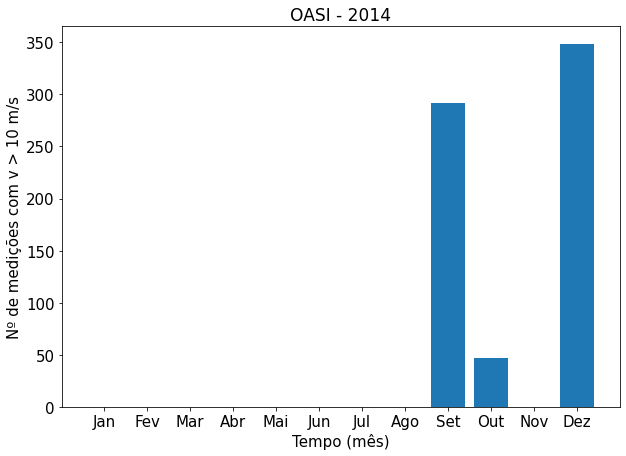

In [541]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(df_OASI_vel_2014_JAN), len(df_OASI_vel_2014_FEV), len(df_OASI_vel_2014_MAR), 
         len(df_OASI_vel_2014_ABR), len(df_OASI_vel_2014_MAI), len(df_OASI_vel_2014_JUN),
         len(df_OASI_vel_2014_JUL), len(df_OASI_vel_2014_AGO), len(df_OASI_vel_2014_SET),
         len(df_OASI_vel_2014_OUT), len(df_OASI_vel_2014_NOV), len(df_OASI_vel_2014_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 10 m/s', size = 15)
plt.title('OASI - 2014', size = 17)
plt.savefig('velocidades_OASI-2014')

In [500]:
df_OASI_vel_2015_JAN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-01', axis = 0).reset_index()
df_OASI_vel_2015_FEV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-02', axis = 0).reset_index()
df_OASI_vel_2015_MAR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-03', axis = 0).reset_index()
df_OASI_vel_2015_ABR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-04', axis = 0).reset_index()
df_OASI_vel_2015_MAI =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-05', axis = 0).reset_index()
df_OASI_vel_2015_JUN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-06', axis = 0).reset_index()
df_OASI_vel_2015_JUL =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-07', axis = 0).reset_index()
df_OASI_vel_2015_AGO =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-08', axis = 0).reset_index()
df_OASI_vel_2015_SET =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-09', axis = 0).reset_index()
df_OASI_vel_2015_OUT =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-10', axis = 0).reset_index()
df_OASI_vel_2015_NOV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-11', axis = 0).reset_index()
df_OASI_vel_2015_DEZ =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2015-12', axis = 0).reset_index()

In [501]:
df_OASI_vel_2015_JAN = [df_OASI_vel_2015_JAN['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_JAN['Wind Speed']))]
df_OASI_vel_2015_FEV = [df_OASI_vel_2015_FEV['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_FEV['Wind Speed']))]
df_OASI_vel_2015_MAR = [df_OASI_vel_2015_MAR['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_MAR['Wind Speed']))]
df_OASI_vel_2015_ABR = [df_OASI_vel_2015_ABR['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_ABR['Wind Speed']))]
df_OASI_vel_2015_MAI = [df_OASI_vel_2015_MAI['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_MAI['Wind Speed']))]
df_OASI_vel_2015_JUN = [df_OASI_vel_2015_JUN['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_JUN['Wind Speed']))]
df_OASI_vel_2015_JUL = [df_OASI_vel_2015_JUL['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_JUL['Wind Speed']))]
df_OASI_vel_2015_AGO = [df_OASI_vel_2015_AGO['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_AGO['Wind Speed']))]
df_OASI_vel_2015_SET = [df_OASI_vel_2015_SET['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_SET['Wind Speed']))]
df_OASI_vel_2015_OUT = [df_OASI_vel_2015_OUT['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_OUT['Wind Speed']))]
df_OASI_vel_2015_NOV = [df_OASI_vel_2015_NOV['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_NOV['Wind Speed']))]
df_OASI_vel_2015_DEZ = [df_OASI_vel_2015_DEZ['Wind Speed'][i] for i in range(len(df_OASI_vel_2015_DEZ['Wind Speed']))]

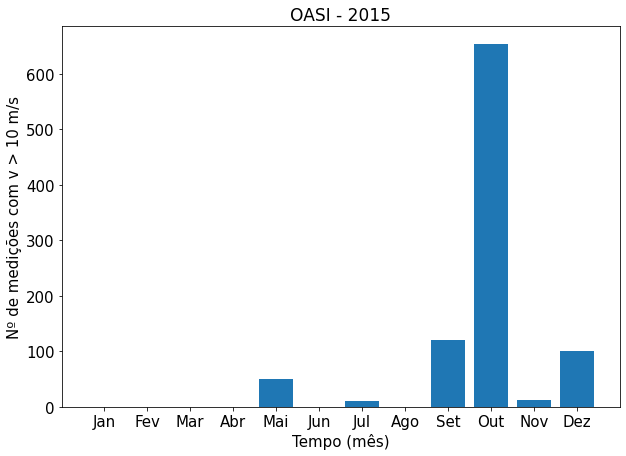

In [542]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(df_OASI_vel_2015_JAN), len(df_OASI_vel_2015_FEV), len(df_OASI_vel_2015_MAR), 
         len(df_OASI_vel_2015_ABR), len(df_OASI_vel_2015_MAI), len(df_OASI_vel_2015_JUN),
         len(df_OASI_vel_2015_JUL), len(df_OASI_vel_2015_AGO), len(df_OASI_vel_2015_SET),
         len(df_OASI_vel_2015_OUT), len(df_OASI_vel_2015_NOV), len(df_OASI_vel_2015_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 10 m/s', size = 15)
plt.title('OASI - 2015', size = 17)
plt.savefig('velocidades_OASI-2015')

In [503]:
df_OASI_vel_2016_JAN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-01', axis = 0).reset_index()
df_OASI_vel_2016_FEV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-02', axis = 0).reset_index()
df_OASI_vel_2016_MAR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-03', axis = 0).reset_index()
df_OASI_vel_2016_ABR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-04', axis = 0).reset_index()
df_OASI_vel_2016_MAI =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-05', axis = 0).reset_index()
df_OASI_vel_2016_JUN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-06', axis = 0).reset_index()
df_OASI_vel_2016_JUL =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-07', axis = 0).reset_index()
df_OASI_vel_2016_AGO =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-08', axis = 0).reset_index()
df_OASI_vel_2016_SET =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-09', axis = 0).reset_index()
df_OASI_vel_2016_OUT =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-10', axis = 0).reset_index()
df_OASI_vel_2016_NOV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-11', axis = 0).reset_index()
df_OASI_vel_2016_DEZ =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2016-12', axis = 0).reset_index()

In [504]:
df_OASI_vel_2016_JAN = [df_OASI_vel_2016_JAN['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_JAN['Wind Speed']))]
df_OASI_vel_2016_FEV = [df_OASI_vel_2016_FEV['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_FEV['Wind Speed']))]
df_OASI_vel_2016_MAR = [df_OASI_vel_2016_MAR['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_MAR['Wind Speed']))]
df_OASI_vel_2016_ABR = [df_OASI_vel_2016_ABR['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_ABR['Wind Speed']))]
df_OASI_vel_2016_MAI = [df_OASI_vel_2016_MAI['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_MAI['Wind Speed']))]
df_OASI_vel_2016_JUN = [df_OASI_vel_2016_JUN['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_JUN['Wind Speed']))]
df_OASI_vel_2016_JUL = [df_OASI_vel_2016_JUL['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_JUL['Wind Speed']))]
df_OASI_vel_2016_AGO = [df_OASI_vel_2016_AGO['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_AGO['Wind Speed']))]
df_OASI_vel_2016_SET = [df_OASI_vel_2016_SET['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_SET['Wind Speed']))]
df_OASI_vel_2016_OUT = [df_OASI_vel_2016_OUT['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_OUT['Wind Speed']))]
df_OASI_vel_2016_NOV = [df_OASI_vel_2016_NOV['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_NOV['Wind Speed']))]
df_OASI_vel_2016_DEZ = [df_OASI_vel_2016_DEZ['Wind Speed'][i] for i in range(len(df_OASI_vel_2016_DEZ['Wind Speed']))]

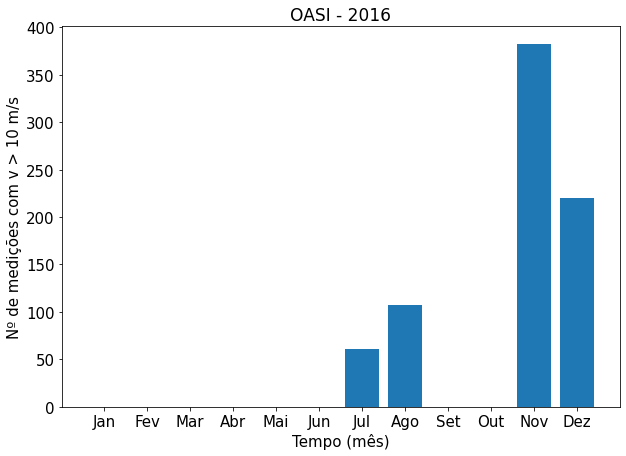

In [543]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(df_OASI_vel_2016_JAN), len(df_OASI_vel_2016_FEV), len(df_OASI_vel_2016_MAR), 
         len(df_OASI_vel_2016_ABR), len(df_OASI_vel_2016_MAI), len(df_OASI_vel_2016_JUN),
         len(df_OASI_vel_2016_JUL), len(df_OASI_vel_2016_AGO), len(df_OASI_vel_2016_SET),
         len(df_OASI_vel_2016_OUT), len(df_OASI_vel_2016_NOV), len(df_OASI_vel_2016_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)
plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 10 m/s', size = 15)
plt.title('OASI - 2016', size = 17)
plt.savefig('velocidades_OASI-2016')

In [506]:
df_OASI_vel_2017_JAN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-01', axis = 0).reset_index()
df_OASI_vel_2017_FEV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-02', axis = 0).reset_index()
df_OASI_vel_2017_MAR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-03', axis = 0).reset_index()
df_OASI_vel_2017_ABR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-04', axis = 0).reset_index()
df_OASI_vel_2017_MAI =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-05', axis = 0).reset_index()
df_OASI_vel_2017_JUN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-06', axis = 0).reset_index()
df_OASI_vel_2017_JUL =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-07', axis = 0).reset_index()
df_OASI_vel_2017_AGO =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-08', axis = 0).reset_index()
df_OASI_vel_2017_SET =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-09', axis = 0).reset_index()
df_OASI_vel_2017_OUT =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-10', axis = 0).reset_index()
df_OASI_vel_2017_NOV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-11', axis = 0).reset_index()
df_OASI_vel_2017_DEZ =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2017-12', axis = 0).reset_index()

In [507]:
df_OASI_vel_2017_JAN = [df_OASI_vel_2017_JAN['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_JAN['Wind Speed']))]
df_OASI_vel_2017_FEV = [df_OASI_vel_2017_FEV['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_FEV['Wind Speed']))]
df_OASI_vel_2017_MAR = [df_OASI_vel_2017_MAR['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_MAR['Wind Speed']))]
df_OASI_vel_2017_ABR = [df_OASI_vel_2017_ABR['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_ABR['Wind Speed']))]
df_OASI_vel_2017_MAI = [df_OASI_vel_2017_MAI['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_MAI['Wind Speed']))]
df_OASI_vel_2017_JUN = [df_OASI_vel_2017_JUN['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_JUN['Wind Speed']))]
df_OASI_vel_2017_JUL = [df_OASI_vel_2017_JUL['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_JUL['Wind Speed']))]
df_OASI_vel_2017_AGO = [df_OASI_vel_2017_AGO['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_AGO['Wind Speed']))]
df_OASI_vel_2017_SET = [df_OASI_vel_2017_SET['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_SET['Wind Speed']))]
df_OASI_vel_2017_OUT = [df_OASI_vel_2017_OUT['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_OUT['Wind Speed']))]
df_OASI_vel_2017_NOV = [df_OASI_vel_2017_NOV['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_NOV['Wind Speed']))]
df_OASI_vel_2017_DEZ = [df_OASI_vel_2017_DEZ['Wind Speed'][i] for i in range(len(df_OASI_vel_2017_DEZ['Wind Speed']))]

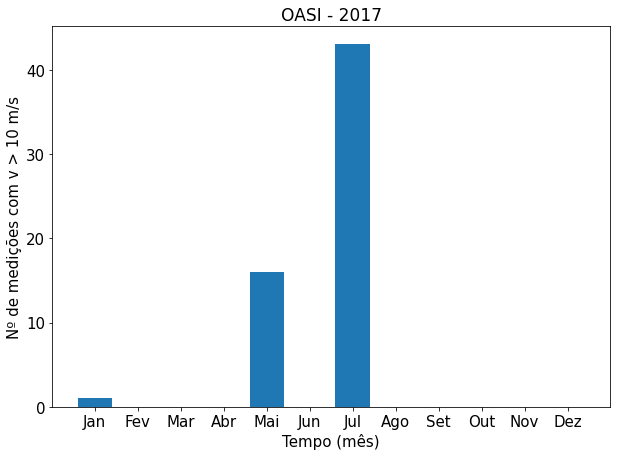

In [544]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(df_OASI_vel_2017_JAN), len(df_OASI_vel_2017_FEV), len(df_OASI_vel_2017_MAR), 
         len(df_OASI_vel_2017_ABR), len(df_OASI_vel_2017_MAI), len(df_OASI_vel_2017_JUN),
         len(df_OASI_vel_2017_JUL), len(df_OASI_vel_2017_AGO), len(df_OASI_vel_2017_SET),
         len(df_OASI_vel_2017_OUT), len(df_OASI_vel_2017_NOV), len(df_OASI_vel_2017_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 10 m/s', size = 15)
plt.title('OASI - 2017', size = 17)
plt.savefig('velocidades_OASI-2017')

In [509]:
df_OASI_vel_2018_JAN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-01', axis = 0).reset_index()
df_OASI_vel_2018_FEV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-02', axis = 0).reset_index()
df_OASI_vel_2018_MAR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-03', axis = 0).reset_index()
df_OASI_vel_2018_ABR =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-04', axis = 0).reset_index()
df_OASI_vel_2018_MAI =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-05', axis = 0).reset_index()
df_OASI_vel_2018_JUN =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-06', axis = 0).reset_index()
df_OASI_vel_2018_JUL =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-07', axis = 0).reset_index()
df_OASI_vel_2018_AGO =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-08', axis = 0).reset_index()
df_OASI_vel_2018_SET =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-09', axis = 0).reset_index()
df_OASI_vel_2018_OUT =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-10', axis = 0).reset_index()
df_OASI_vel_2018_NOV =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-11', axis = 0).reset_index()
df_OASI_vel_2018_DEZ =  df_OASI.loc[df_OASI['Wind Speed'] > 10].set_index('Datetime').filter(like = '2018-12', axis = 0).reset_index()

In [510]:
df_OASI_vel_2018_JAN = [df_OASI_vel_2018_JAN['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_JAN['Wind Speed']))]
df_OASI_vel_2018_FEV = [df_OASI_vel_2018_FEV['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_FEV['Wind Speed']))]
df_OASI_vel_2018_MAR = [df_OASI_vel_2018_MAR['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_MAR['Wind Speed']))]
df_OASI_vel_2018_ABR = [df_OASI_vel_2018_ABR['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_ABR['Wind Speed']))]
df_OASI_vel_2018_MAI = [df_OASI_vel_2018_MAI['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_MAI['Wind Speed']))]
df_OASI_vel_2018_JUN = [df_OASI_vel_2018_JUN['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_JUN['Wind Speed']))]
df_OASI_vel_2018_JUL = [df_OASI_vel_2018_JUL['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_JUL['Wind Speed']))]
df_OASI_vel_2018_AGO = [df_OASI_vel_2018_AGO['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_AGO['Wind Speed']))]
df_OASI_vel_2018_SET = [df_OASI_vel_2018_SET['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_SET['Wind Speed']))]
df_OASI_vel_2018_OUT = [df_OASI_vel_2018_OUT['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_OUT['Wind Speed']))]
df_OASI_vel_2018_NOV = [df_OASI_vel_2018_NOV['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_NOV['Wind Speed']))]
df_OASI_vel_2018_DEZ = [df_OASI_vel_2018_DEZ['Wind Speed'][i] for i in range(len(df_OASI_vel_2018_DEZ['Wind Speed']))]

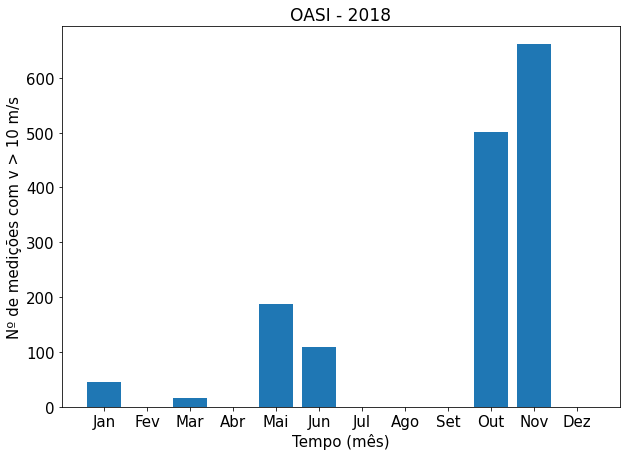

In [545]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        [len(df_OASI_vel_2018_JAN), len(df_OASI_vel_2018_FEV), len(df_OASI_vel_2018_MAR), 
         len(df_OASI_vel_2018_ABR), len(df_OASI_vel_2018_MAI), len(df_OASI_vel_2018_JUN),
         len(df_OASI_vel_2018_JUL), len(df_OASI_vel_2018_AGO), len(df_OASI_vel_2018_SET),
         len(df_OASI_vel_2018_OUT), len(df_OASI_vel_2018_NOV), len(df_OASI_vel_2018_DEZ)])

plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10,11,12], labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], size = 15)

plt.yticks(size = 15)

plt.xlabel('Tempo (mês)', size = 15)
plt.ylabel('Nº de medições com v > 10 m/s', size = 15)
plt.title('OASI - 2018', size = 17)
plt.savefig('velocidades_OASI-2018')

# **OASI + Floresta A351**

In [118]:
df.head()

Date  Rain    Pressure       Temp        Hum  \
0  2011-01-01T00:00:00.000000000   0.0  728.728986  28.054167  47.666667   
1  2011-01-02T00:00:00.000000000   0.0  728.163315  28.454167  52.750000   
2  2011-01-03T00:00:00.000000000  11.0  728.747738  26.850000  68.833333   
3  2011-01-04T00:00:00.000000000   0.0  729.125894  28.720833  58.166667   
4  2011-01-05T00:00:00.000000000   0.0  730.069722  28.787500  51.750000   

       Wind  
0  2.225000  
1  2.570833  
2  1.454167  
3  2.104167  
4  3.758333

In [119]:
df.columns = ['Datetime', 'Rain (Floresta)', 'Pressure (Floresta)', 'Temp (Floresta)', 'Hum (Floresta)', 'Wind (Floresta)']
df.head()

Datetime  Rain (Floresta)  Pressure (Floresta)  \
0  2011-01-01T00:00:00.000000000              0.0           728.728986   
1  2011-01-02T00:00:00.000000000              0.0           728.163315   
2  2011-01-03T00:00:00.000000000             11.0           728.747738   
3  2011-01-04T00:00:00.000000000              0.0           729.125894   
4  2011-01-05T00:00:00.000000000              0.0           730.069722   

   Temp (Floresta)  Hum (Floresta)  Wind (Floresta)  
0        28.054167       47.666667         2.225000  
1        28.454167       52.750000         2.570833  
2        26.850000       68.833333         1.454167  
3        28.720833       58.166667         2.104167  
4        28.787500       51.750000         3.758333

In [120]:
df.dtypes

Datetime                object
Rain (Floresta)        float64
Pressure (Floresta)    float64
Temp (Floresta)        float64
Hum (Floresta)         float64
Wind (Floresta)        float64
dtype: object

In [121]:
dados_dia.head()

Datetime   Temp Ext        Hum  Wind Speed    Pressure  Rain
0  2014-09-03  24.221074  75.652893    7.407231  761.327686   0.0
1  2014-09-04  27.152471  62.340304    8.105038  761.209981   0.0
2  2014-09-05  26.796304  59.585077    6.485983  761.950139   0.0
3  2014-09-06  27.344306  58.622917    6.678056  761.891875   0.0
4  2014-09-07  29.739083  49.670306    5.808079  761.641376   0.0

In [122]:
dados_dia.columns = ['Datetime', 'Temp (OASI)', 'Hum (OASI)', 'Wind Speed (OASI)', 'Pressure (OASI)', 'Rain (OASI)']
dados_dia.head()

Datetime  Temp (OASI)  Hum (OASI)  Wind Speed (OASI)  Pressure (OASI)  \
0  2014-09-03    24.221074   75.652893           7.407231       761.327686   
1  2014-09-04    27.152471   62.340304           8.105038       761.209981   
2  2014-09-05    26.796304   59.585077           6.485983       761.950139   
3  2014-09-06    27.344306   58.622917           6.678056       761.891875   
4  2014-09-07    29.739083   49.670306           5.808079       761.641376   

   Rain (OASI)  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [123]:
dados_dia['Datetime'] = pd.to_datetime(dados_dia['Datetime'])
dados_dia.dtypes

Datetime             datetime64[ns]
Temp (OASI)                 float64
Hum (OASI)                  float64
Wind Speed (OASI)           float64
Pressure (OASI)             float64
Rain (OASI)                 float64
dtype: object

In [124]:
df['Datetime'] = pd.to_datetime(df['Datetime'].astype('str'))
df.dtypes

Datetime               datetime64[ns]
Rain (Floresta)               float64
Pressure (Floresta)           float64
Temp (Floresta)               float64
Hum (Floresta)                float64
Wind (Floresta)               float64
dtype: object

In [125]:
df_diario_OASI_Floresta = dados_dia.merge(df, on = 'Datetime')
df_diario_OASI_Floresta.head()

Datetime  Temp (OASI)  Hum (OASI)  Wind Speed (OASI)  Pressure (OASI)  \
0 2014-09-03    24.221074   75.652893           7.407231       761.327686   
1 2014-09-04    27.152471   62.340304           8.105038       761.209981   
2 2014-09-05    26.796304   59.585077           6.485983       761.950139   
3 2014-09-06    27.344306   58.622917           6.678056       761.891875   
4 2014-09-07    29.739083   49.670306           5.808079       761.641376   

   Rain (OASI)  Rain (Floresta)  Pressure (Floresta)  Temp (Floresta)  \
0          0.0              0.0           731.385456        29.450000   
1          0.0              0.0           731.447961        29.591667   
2          0.0              0.0           733.751277        26.008333   
3          0.0              0.4           735.223274        23.183333   
4          0.0              0.0           735.557676        23.333333   

   Hum (Floresta)  Wind (Floresta)  
0       45.041667         2.270833  
1       47.708333         2.783333  
2       62.750000         4.900000  
3       67.625000         5.170833  
4       63.208333         4.008333

In [126]:
df_diario_OASI_Floresta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             185 non-null    datetime64[ns]
 1   Temp (OASI)          185 non-null    float64       
 2   Hum (OASI)           185 non-null    float64       
 3   Wind Speed (OASI)    185 non-null    float64       
 4   Pressure (OASI)      185 non-null    float64       
 5   Rain (OASI)          185 non-null    float64       
 6   Rain (Floresta)      185 non-null    float64       
 7   Pressure (Floresta)  185 non-null    float64       
 8   Temp (Floresta)      185 non-null    float64       
 9   Hum (Floresta)       185 non-null    float64       
 10  Wind (Floresta)      185 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 17.3 KB


In [127]:
df_diario_OASI_Floresta['Hum (OASI)'].max()

83.07954545454545

In [128]:
df_diario_OASI_Floresta['Hum (Floresta)'].max()

77.25

In [129]:
df_diario_OASI_Floresta.to_csv('dados_media_diaria-OASI-Floresta')

## **Correlação**

In [ ]:
plt.figure(figsize = (20,17))

plt.suptitle('OASI e Floresta A351', size = 17)
plt.subplot(221)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Hum (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Hum (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('Umidade Relativa Total (AUT) %', size = 13)
plt.xlabel('Tempo de observação' + ' (Início 2014-01-01)', size = 13)
#plt.ylim(0,80)
plt.legend()

plt.subplot(222)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Rain (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Rain (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('Precipitação Total (AUT) (mm)', size = 13)
plt.xlabel('Tempo de observação' + ' (Início 2014-01-01)', size = 13)
plt.ylim(0,60)
plt.legend(loc = 'upper left')

plt.subplot(223)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Wind Speed (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Wind (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlabel('Tempo de observação' + ' (Início 2014-01-01)', size = 13)
plt.ylim(0,12)
plt.legend()

plt.subplot(224)
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Pressure (OASI)'], label = 'OASI',color = 'blue')
plt.scatter(df_diario_OASI_Floresta['Datetime'], df_diario_OASI_Floresta['Pressure (Floresta)'], label = 'Floresta A351',color = 'red')
plt.xticks(rotation = 25, size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlabel('Tempo de observação' + ' (Início 2014-01-01)', size = 13)
#plt.ylim(740,1000)
plt.legend()

plt.savefig('media_diaria_OASI-Floresta.png')
plt.show()

### **umidade**

In [ ]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Hum (Floresta)'],
                               df_diario_OASI_Floresta['Hum (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Hum (Floresta)'],
                               df_diario_OASI_Floresta['Hum (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_diario_OASI_Floresta['Hum (Floresta)'], df_diario_OASI_Floresta['Hum (OASI)'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.text(60,36, pearson, fontsize = 12)
plt.text(60,34, spearman, fontsize = 12)
plt.ylabel('Umidade relativa total (AUT)  - OASI', size = 13)
plt.xlabel('Umidade relativa total (AUT) - Floresta A351', size = 13)
plt.savefig('umidadexumidade_corr.png')
plt.show()

### **precipitação**

In [ ]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Rain (Floresta)'],
                               df_diario_OASI_Floresta['Rain (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Rain (Floresta)'],
                               df_diario_OASI_Floresta['Rain (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_diario_OASI_Floresta['Rain (Floresta)'], df_diario_OASI_Floresta['Rain (OASI)'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(42,0.9, pearson, fontsize = 12)
plt.text(42,0.95, spearman, fontsize = 12)
plt.ylim(0,1)
plt.xlim(0,60)
plt.ylabel('Precipitação total (mm)  - OASI', size = 13)
plt.xlabel('Precipitação total (mm) - Floresta A351', size = 13)
plt.savefig('chuva_corr.png')
plt.show()

### **velocidade**

In [ ]:
df_diario_OASI_Floresta.head()

In [ ]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Wind (Floresta)'],
                               df_diario_OASI_Floresta['Wind Speed (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Wind (Floresta)'],
                               df_diario_OASI_Floresta['Wind Speed (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_diario_OASI_Floresta['Wind (Floresta)'], df_diario_OASI_Floresta['Wind Speed (OASI)'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(3.8,0.55, pearson, fontsize = 12)
plt.text(3.8,0.15, spearman, fontsize = 12)
plt.ylim(0,10)
plt.xlim(1,5)
plt.ylabel('Velocidade do vento (m/s)  - OASI', size = 13)
plt.xlabel('Velocidade do vento (m/s) - Floresta A351', size = 13)
plt.savefig('ventovel_corr.png')
plt.show()

### **pressão**

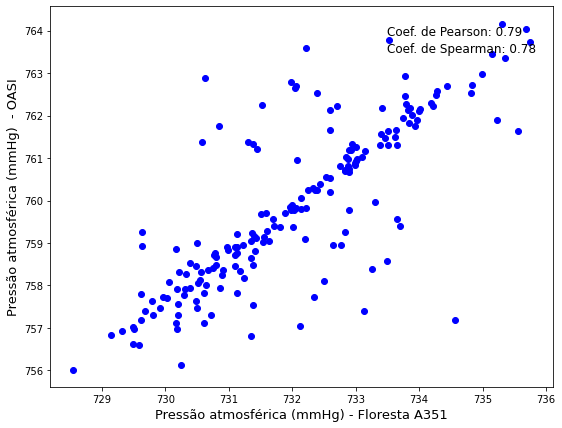

In [130]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Pressure (Floresta)'],
                               df_diario_OASI_Floresta['Pressure (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Pressure (Floresta)'],
                               df_diario_OASI_Floresta['Pressure (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_diario_OASI_Floresta['Pressure (Floresta)'], df_diario_OASI_Floresta['Pressure (OASI)'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(733.5, 763.9, pearson, fontsize = 12)
plt.text(733.5, 763.5, spearman, fontsize = 12)
#plt.ylim(756,764)
#plt.xlim(972,980)
plt.ylabel('Pressão atmosférica (mmHg)  - OASI', size = 13)
plt.xlabel('Pressão atmosférica (mmHg) - Floresta A351', size = 13)
plt.savefig('pressao_corr.png')
plt.show()

### **temperatura**

In [ ]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_diario_OASI_Floresta['Temp (Floresta)'],
                               df_diario_OASI_Floresta['Temp (OASI)'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_diario_OASI_Floresta['Temp (Floresta)'],
                               df_diario_OASI_Floresta['Temp (OASI)'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_diario_OASI_Floresta['Temp (Floresta)'], df_diario_OASI_Floresta['Temp (OASI)'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(22.5,35.7, pearson, fontsize = 12)
plt.text(22.5,35, spearman, fontsize = 12)
#plt.ylim(756,764)
plt.xlim(22,32)
plt.ylabel(r'Temperatura ($\degree$ C)  - OASI', size = 13)
plt.xlabel(r'Temperatura ($\degree$ C) - Floresta A351', size = 13)
plt.savefig('temp_corr.png')
plt.show()

In [ ]:
# correlacao de pearson pelo pandas
corr = df_diario_OASI_Floresta.corr()
corr.to_csv('coeficiente_pearson_OASI-Floresta')
print(corr.head())

#diagrama de correlacao
plt.figure(figsize = (10,5))
plt.imshow(corr, cmap = 'Blues', interpolation = 'none', aspect = 'auto')
plt.colorbar()

#corr.columns = ['Umidade relativa (OASI)', 'Precipitação (mm) (OASI)', 'Precipitação (mm) (Floresta)', 'Umidade relativa (Floresta)', ]
plt.xticks(range(len(corr)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr)), corr.columns)


plt.savefig('correlacao_OASI-Floresta.png')
plt.show()

# **Seeing**

## **Seeing 2019**

In [103]:
#seeing em 2019, imagens com 30s de exposicao
seeing_30 = pd.read_csv('seeing_30s.csv', usecols = ['DATE-OBS','SEEING'])

seeing_30.columns = ['Datetime', 'Seeing']
seeing_30.to_csv('seeing-data_30s_R')

seeing_30.head()

Datetime    Seeing
0  2019-04-05T23:25:06  1.181833
1  2019-04-06T00:00:20  1.203707
2  2019-04-06T01:00:28  1.181152
3  2019-04-06T02:14:52  1.477593
4  2019-04-06T02:47:09  1.200506

In [104]:
#seeing em 2019, imagens com 40s de exposicao
seeing_40 = pd.read_csv('seeing_40s.csv', usecols = ['DATE-OBS','SEEING'])

seeing_40.columns = ['Datetime', 'Seeing']

seeing_40.to_csv('seeing-data_40s_R')
seeing_40.head()

Datetime    Seeing
0  2019-01-08T23:11:50  0.754727
1  2019-01-09T00:00:41  0.869891
2  2019-01-09T01:00:31  1.158670
3  2019-01-09T02:00:28  1.150532
4  2019-01-09T03:00:21  1.048416

In [105]:
#transformando a coluna Datetime em objeto datetime do pandas para fazer o groupby
seeing_30.Datetime = pd.to_datetime(seeing_30.Datetime)
seeing_40.Datetime = pd.to_datetime(seeing_40.Datetime)

In [106]:
#media diaria dos seeings em 2019 com 30 e 40s de tempo de exposicao
seeing_30_diario = seeing_30.groupby(by = seeing_30.Datetime.dt.date).mean()
seeing_40_diario = seeing_40.groupby(by = seeing_40.Datetime.dt.date).mean()


seeing_30_diario.to_csv('seeing-data_diario_30s_R')
seeing_40_diario.to_csv('seeing-data_diario_40s_R')

In [107]:
(seeing_30_diario.info())
seeing_30_diario.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2019-04-05 to 2019-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seeing  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0+ bytes


Seeing
Datetime            
2019-04-05  1.181833
2019-04-06  1.265739
2019-04-08  1.123272
2019-07-05  1.401407
2019-07-06  1.157226

In [108]:
(seeing_40_diario.info())
seeing_40_diario.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2019-01-08 to 2019-10-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seeing  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0+ bytes


Seeing
Datetime            
2019-01-08  0.754727
2019-01-09  1.067362
2019-01-10  0.899092
2019-01-11  1.047945
2019-01-13  1.222681

## **Seeing 2011-2018 (Rondon et al 2020)**

In [109]:
seeing_OASI = pd.read_csv('FWHMTotal_Total_Prueba.txt', delim_whitespace = True,
                               names = ['Datetime', '?', 'Objeto', 'FWHM', 'Seeing'])

del seeing_OASI['?']
del seeing_OASI['Objeto']
del seeing_OASI['FWHM']

seeing_OASI.to_csv('seeing_OASI_2011-2018')

print(seeing_OASI.info())
seeing_OASI.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22078 entries, 0 to 22077
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  22078 non-null  object 
 1   Seeing    22078 non-null  float64
dtypes: float64(1), object(1)
memory usage: 345.1+ KB
None


Datetime    Seeing
0  2011-05-12T01:14:37  1.503684
1  2011-05-12T01:15:10  1.487708
2  2011-05-12T01:15:43  1.519978
3  2011-05-12T01:16:16  1.474059
4  2011-05-12T01:16:49  1.568380

In [110]:
seeing_OASI.Datetime = pd.to_datetime(seeing_OASI.Datetime)

seeing_OASI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22078 entries, 0 to 22077
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  22078 non-null  datetime64[ns]
 1   Seeing    22078 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 345.1 KB


In [111]:
seeing_OASI_diario = seeing_OASI.groupby(by = seeing_OASI.Datetime.dt.date).mean()
seeing_OASI_diario.head()

Seeing
Datetime            
2011-05-12  1.496963
2011-06-24  0.954734
2011-06-25  0.907572
2011-06-27  2.034281
2011-06-28  0.917489

In [112]:
seeing_OASI_diario = seeing_OASI_diario.reset_index()

seeing_OASI_diario.Datetime = pd.to_datetime(seeing_OASI_diario.Datetime)
print(seeing_OASI_diario.info())

seeing_OASI_diario.to_csv('seeing_data_OASI')

seeing_OASI_diario

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  230 non-null    datetime64[ns]
 1   Seeing    230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB
None


Datetime    Seeing
0   2011-05-12  1.496963
1   2011-06-24  0.954734
2   2011-06-25  0.907572
3   2011-06-27  2.034281
4   2011-06-28  0.917489
..         ...       ...
225 2018-09-08  1.363372
226 2018-09-09  1.185772
227 2018-10-13  1.062135
228 2018-10-14  1.268909
229 2018-10-15  1.259975

[230 rows x 2 columns]

In [113]:
print(dados_dia.info())
dados_dia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datetime    200 non-null    datetime64[ns]
 1   Temp Ext    200 non-null    float64       
 2   Hum         200 non-null    float64       
 3   Wind Speed  200 non-null    float64       
 4   Pressure    200 non-null    float64       
 5   Rain        200 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.5 KB
None


Datetime   Temp Ext        Hum  Wind Speed    Pressure  Rain
0 2014-09-03  24.221074  75.652893    7.407231  761.327686   0.0
1 2014-09-04  27.152471  62.340304    8.105038  761.209981   0.0
2 2014-09-05  26.796304  59.585077    6.485983  761.950139   0.0
3 2014-09-06  27.344306  58.622917    6.678056  761.891875   0.0
4 2014-09-07  29.739083  49.670306    5.808079  761.641376   0.0

In [114]:
df_meteo_seeing = seeing_OASI_diario.merge(dados_dia, on = 'Datetime')
df_meteo_seeing.to_csv('seeing_dados-meteor_OASI')

print(df_meteo_seeing.info())

#df_meteo_seeing.columns = ['Datetime', 'Temp' 'Seeing', 'Umidade', 'Vel. Vento', 'Pressão Atm', 'Precipitção']

df_meteo_seeing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datetime    20 non-null     datetime64[ns]
 1   Seeing      20 non-null     float64       
 2   Temp Ext    20 non-null     float64       
 3   Hum         20 non-null     float64       
 4   Wind Speed  20 non-null     float64       
 5   Pressure    20 non-null     float64       
 6   Rain        20 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.2 KB
None


Datetime    Seeing   Temp Ext        Hum  Wind Speed    Pressure  Rain
0 2014-09-03  1.092224  24.221074  75.652893    7.407231  761.327686   0.0
1 2014-09-04  1.698317  27.152471  62.340304    8.105038  761.209981   0.0
2 2015-03-14  0.859240  33.622926  49.334061    2.699782  758.923799   0.0
3 2015-04-13  2.041861  31.269835  54.416819    5.071664  760.258684   0.0
4 2015-04-14  1.034545  32.498769  49.866154    4.932000  759.082615   0.0

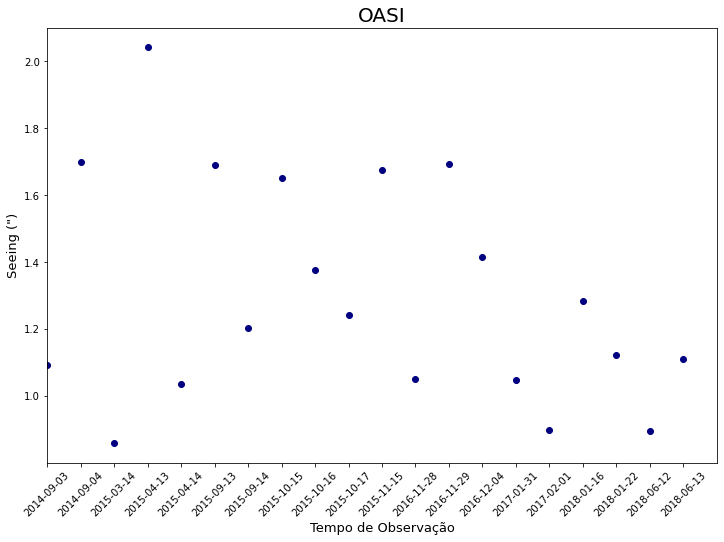

In [115]:
A0 = ['2014-09-03', '2014-09-04', '2015-03-14', '2015-04-13',
      '2015-04-14', '2015-09-13', '2015-09-14', '2015-10-15',
     '2015-10-16', '2015-10-17', '2015-11-15', '2016-11-28',
      '2016-11-29', '2016-12-04', '2017-01-31', '2017-02-01',
      '2018-01-16', '2018-01-22', '2018-06-12', '2018-06-13']

plt.figure(figsize = (12,8))
plt.scatter(x = np.arange(20), y = df_meteo_seeing['Seeing'], color = 'navy')
plt.xticks(ticks = np.arange(20), labels = A0, rotation = 45)
plt.ylabel('Seeing (")', size = 13)
plt.xlabel("Tempo de Observação", size = 13)
plt.xlim(0,20)
plt.title('OASI', size = 20)
plt.savefig('seeing_dados-meteorxtempo.png')

In [116]:
df_meteo_seeing

Datetime    Seeing   Temp Ext        Hum  Wind Speed    Pressure  Rain
0  2014-09-03  1.092224  24.221074  75.652893    7.407231  761.327686   0.0
1  2014-09-04  1.698317  27.152471  62.340304    8.105038  761.209981   0.0
2  2015-03-14  0.859240  33.622926  49.334061    2.699782  758.923799   0.0
3  2015-04-13  2.041861  31.269835  54.416819    5.071664  760.258684   0.0
4  2015-04-14  1.034545  32.498769  49.866154    4.932000  759.082615   0.0
5  2015-09-13  1.691198  28.175694  55.895833    5.341667  761.331944   0.0
6  2015-09-14  1.203782  30.017040  50.040896    6.029503  762.123466   0.0
7  2015-10-15  1.651751  23.741667  69.958333    6.843750  762.172917   0.0
8  2015-10-16  1.377360  27.341111  59.375694    7.649861  761.630347   0.0
9  2015-10-17  1.242190  27.941286  56.063374    5.911277  761.185741   0.0
10 2015-11-15  1.676501  36.750198  31.698413    3.912302  757.625595   0.0
11 2016-11-28  1.049084  29.545628  51.827333    6.238501  758.910727   0.0
12 2016-11-29  1.691812  29.686370  50.983501    5.490818  757.918938   0.0
13 2016-12-04  1.413542  31.514111  45.314264    4.141114  757.183982   0.0
14 2017-01-31  1.046218  34.073898  42.820106    5.208642  758.470370   0.0
15 2017-02-01  0.898242  34.938278  37.939560    5.012088  757.479304   0.0
16 2018-01-16  1.283863  32.427946  41.789562    7.677609  759.816162   0.0
17 2018-01-22  1.121636  31.375000  41.191176    3.427941  756.119118   0.0
18 2018-06-12  0.895765  26.365278  65.868056    5.424583  762.019375   0.0
19 2018-06-13  1.110936  26.801635  62.975962    5.269904  762.107981   0.0

In [117]:
umidade_16_17 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 16) & (df_meteo_seeing['Hum'] <= 17)]
#umidade_16_17.set_index('Datetime', inplace = True)


umidade_17_18 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 17) & (df_meteo_seeing['Hum'] <= 18)]
#umidade_17_18.set_index('Datetime', inplace = True)


umidade_18_19 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 18) & (df_meteo_seeing['Hum'] <= 19)]
#umidade_18_19.set_index('Datetime', inplace = True)


umidade_19_20 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 19) & (df_meteo_seeing['Hum'] <= 20)]
#umidade_19_20.set_index('Datetime', inplace = True)


umidade_20_21 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 20) & (df_meteo_seeing['Hum'] <= 21)]
#umidade_20_21.set_index('Datetime', inplace = True)

umidade_21 = df_meteo_seeing.loc[(df_meteo_seeing['Hum'] > 21)]
#umidade_21.set_index('Datetime', inplace = True)

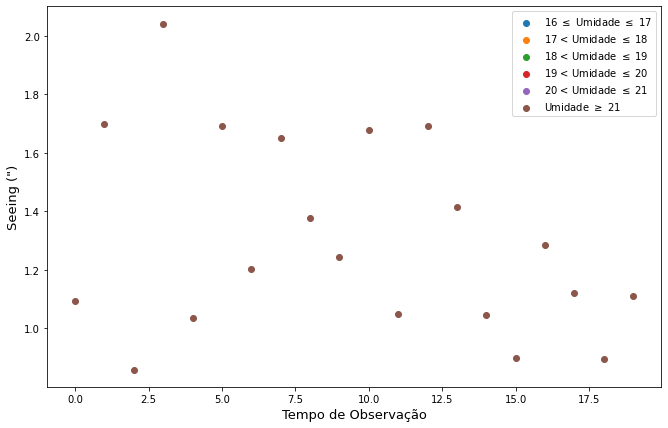

In [65]:
plt.figure(figsize = (11,7))


#plt.scatter(list(df_meteo_seeing['Datetime'].astype('str')), list(df_meteo_seeing['Seeing']))


plt.scatter(x = list(umidade_16_17['Seeing'].index.values), y = umidade_16_17['Seeing'], 
            label = r'16 $\leq$ Umidade $\leq$ 17')

plt.scatter(x = list(umidade_17_18['Seeing'].index.values),
            y = umidade_17_18['Seeing'], label = r'17 < Umidade $\leq$ 18')

plt.scatter(x = list(umidade_18_19['Seeing'].index.values),
            y = umidade_18_19['Seeing'], label = r'18 < Umidade $\leq$ 19')

plt.scatter(x = list(umidade_19_20['Seeing'].index.values),
            y = umidade_19_20['Seeing'], label = r'19 < Umidade $\leq$ 20')

plt.scatter(x = list(umidade_20_21['Seeing'].index.values),
            y = umidade_20_21['Seeing'], label = r'20 < Umidade $\leq$ 21')

plt.scatter(x = list(umidade_21['Seeing'].index.values), y = umidade_21['Seeing'], label = r'Umidade $\geq$ 21')


A0 = ['2014-09-03', '2014-09-04', '2015-03-14', '2015-04-13',
      '2015-04-14', '2015-09-13', '2015-09-14', '2015-10-15',
     '2015-10-16', '2015-10-17', '2015-11-15', '2016-11-28',
      '2016-11-29', '2016-12-04', '2017-01-31', '2017-02-01',
      '2018-01-16', '2018-01-22', '2018-06-12', '2018-06-13']
#sns.scatterplot(data = df_meteo_seeing, x = A0, y = 'Seeing', hue = 'Umidade',
#                hue_norm = (16,21), legend = 'brief',
#                palette = 'deep')


plt.ylabel('Seeing (")', size = 13)
plt.xlabel("Tempo de Observação", size = 13)
plt.legend(loc = 'upper right')
plt.savefig('seeing_dados-meteorxtempo.png')

## **Seeing 2011-2019**

In [118]:
seeing_OASI_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  230 non-null    datetime64[ns]
 1   Seeing    230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [119]:
seeing_OASI_diario.dtypes

Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [120]:
seeing_30_diario.reset_index(inplace = True)
seeing_40_diario.reset_index(inplace = True)

In [121]:
seeing_30_diario.Datetime = pd.to_datetime(seeing_30_diario.Datetime)
seeing_40_diario.Datetime = pd.to_datetime(seeing_40_diario.Datetime)

In [122]:
seeing_30_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  25 non-null     datetime64[ns]
 1   Seeing    25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


In [123]:
seeing_40_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  34 non-null     datetime64[ns]
 1   Seeing    34 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.0 bytes


In [124]:
df_seeing_2011_2019 = pd.concat([seeing_OASI_diario,seeing_30_diario, seeing_40_diario], axis = 0, ignore_index=False)

df_seeing_2011_2019.to_csv('seeing_OASI_2011-2019')
df_seeing_2011_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  289 non-null    datetime64[ns]
 1   Seeing    289 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


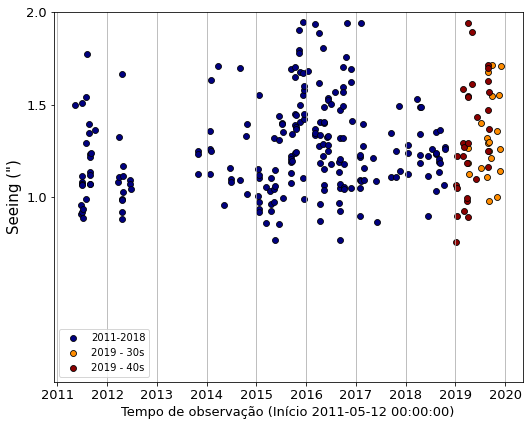

In [125]:
plt.figure(figsize = (8.4,6.8))

plt.scatter(seeing_OASI_diario.Datetime, seeing_OASI_diario.Seeing, color = 'navy', label = '2011-2018', alpha = 1,lw = 0.8,edgecolor = 'black')
plt.scatter(seeing_30_diario.Datetime, seeing_30_diario.Seeing, color = 'darkorange', label = '2019 - 30s', alpha = 1,lw = 0.8,edgecolor = 'black')
plt.scatter(seeing_40_diario.Datetime, seeing_40_diario.Seeing, color = 'darkred', label = '2019 - 40s', alpha = 1,lw = 0.8,edgecolor = 'black')

plt.ylim(0,2)
plt.yticks(np.arange(1,2.5,0.5),size = 13)
plt.ylabel('Seeing (")', size = 15)

plt.xticks(size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + str(seeing_OASI_diario['Datetime'][0]) + ')', size = 13)

plt.grid(axis = 'x')
plt.legend()


plt.savefig('seeing_OASI_2011-2019.png')
plt.show()

In [126]:
seeing_OASI_diario_2011 = seeing_OASI_diario.set_index('Datetime').filter(like = '2011', axis = 0).reset_index()
seeing_OASI_diario_2012 = seeing_OASI_diario.set_index('Datetime').filter(like = '2012', axis = 0).reset_index()
seeing_OASI_diario_2013 = seeing_OASI_diario.set_index('Datetime').filter(like = '2013', axis = 0).reset_index()
seeing_OASI_diario_2014 = seeing_OASI_diario.set_index('Datetime').filter(like = '2014', axis = 0).reset_index()
seeing_OASI_diario_2015 = seeing_OASI_diario.set_index('Datetime').filter(like = '2015', axis = 0).reset_index()
seeing_OASI_diario_2016 = seeing_OASI_diario.set_index('Datetime').filter(like = '2016', axis = 0).reset_index()
seeing_OASI_diario_2017 = seeing_OASI_diario.set_index('Datetime').filter(like = '2017', axis = 0).reset_index()
seeing_OASI_diario_2018 = seeing_OASI_diario.set_index('Datetime').filter(like = '2018', axis = 0).reset_index()

In [127]:
seeing_OASI_diario_2012.dtypes

Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [128]:
#seeing_OASI_diario_2011.Datetime = pd.to_datetime(seeing_OASI_diario_2011.Datetime)
seeing_OASI_diario_2011.Datetime = Time(seeing_OASI_diario_2011.Datetime, scale = 'utc')
seeing_OASI_diario_2012.Datetime = Time(seeing_OASI_diario_2012.Datetime, scale = 'utc')
seeing_OASI_diario_2013.Datetime = Time(seeing_OASI_diario_2013.Datetime, scale = 'utc')
seeing_OASI_diario_2014.Datetime = Time(seeing_OASI_diario_2014.Datetime, scale = 'utc')
seeing_OASI_diario_2015.Datetime = Time(seeing_OASI_diario_2015.Datetime, scale = 'utc')
seeing_OASI_diario_2016.Datetime = Time(seeing_OASI_diario_2016.Datetime, scale = 'utc')
seeing_OASI_diario_2017.Datetime = Time(seeing_OASI_diario_2017.Datetime, scale = 'utc')
seeing_OASI_diario_2018.Datetime = Time(seeing_OASI_diario_2018.Datetime, scale = 'utc')

In [129]:
it = Time('2011-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2011 = [(i - it).value/30 for i in (seeing_OASI_diario_2011['Datetime'])]

it = Time('2012-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2012 = [(i - it).value/30 for i in (seeing_OASI_diario_2012['Datetime'])]

it = Time('2013-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2013 = [(i - it).value/30 for i in (seeing_OASI_diario_2013['Datetime'])]

it = Time('2014-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2014 = [(i - it).value/30 for i in (seeing_OASI_diario_2014['Datetime'])]

it = Time('2015-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2015 = [(i - it).value/30 for i in (seeing_OASI_diario_2015['Datetime'])]

it = Time('2016-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2016 = [(i - it).value/30 for i in (seeing_OASI_diario_2016['Datetime'])]

it = Time('2017-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2017 = [(i - it).value/30 for i in (seeing_OASI_diario_2017['Datetime'])]

it = Time('2018-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2018 = [(i - it).value/30 for i in (seeing_OASI_diario_2018['Datetime'])]

In [130]:
seeing_30_diario.Datetime = Time(seeing_30_diario.Datetime, scale = 'utc')
seeing_40_diario.Datetime = Time(seeing_40_diario.Datetime, scale = 'utc')

In [131]:
it = Time('2019-01-01T00:00:00.000000000', format = 'isot' ,scale = 'utc')
dt_2019_30 = [(i - it).value/30 for i in (seeing_30_diario['Datetime'])]
dt_2019_40 = [(i - it).value/30 for i in (seeing_40_diario['Datetime'])]

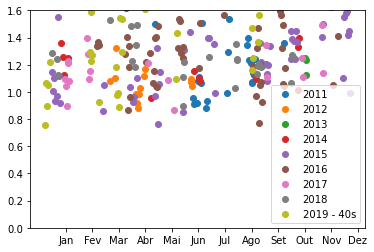

In [132]:
plt.scatter(dt_2011,seeing_OASI_diario_2011['Seeing'], label = '2011')
plt.scatter(dt_2012,seeing_OASI_diario_2012['Seeing'], label = '2012')
plt.scatter(dt_2013,seeing_OASI_diario_2013['Seeing'], label = '2013')
plt.scatter(dt_2014,seeing_OASI_diario_2014['Seeing'], label = '2014')
plt.scatter(dt_2015,seeing_OASI_diario_2015['Seeing'], label = '2015')
plt.scatter(dt_2016,seeing_OASI_diario_2016['Seeing'], label = '2016')
plt.scatter(dt_2017,seeing_OASI_diario_2017['Seeing'], label = '2017')
plt.scatter(dt_2018,seeing_OASI_diario_2018['Seeing'], label = '2018')
plt.scatter(dt_2019_40,seeing_40_diario['Seeing']    , label = '2019 - 40s')
plt.xticks(np.arange(1,13,1), ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.ylim(0,1.6)
plt.legend()

<Figure size 720x504 with 0 Axes>

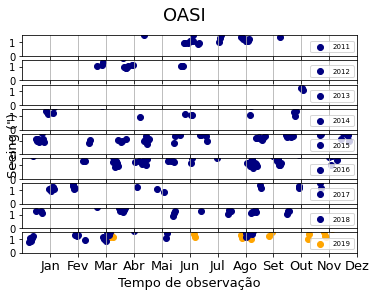

In [133]:
plt.figure(figsize = (10,7))
fig, ax = plt.subplots(9,1, sharex = True, sharey = True)

ax[0].scatter(dt_2011, seeing_OASI_diario_2011['Seeing'], label = '2011', color = 'navy' )
ax[0].legend(['2011'], loc = 'lower right', fontsize = 7)
ax[0].grid(axis = 'x')


ax[1].scatter(dt_2012, seeing_OASI_diario_2012.Seeing, label = '2012', color = 'navy' )
ax[1].legend(['2012'], loc = 'lower right', fontsize = 7)
ax[1].grid(axis = 'x')


ax[2].scatter(dt_2013, seeing_OASI_diario_2013.Seeing, label = '2013', color = 'navy' )
ax[2].legend(['2013'], loc = 'lower right', fontsize = 7)
ax[2].grid(axis = 'x')


ax[3].scatter(dt_2014, seeing_OASI_diario_2014.Seeing, label = '2014', color = 'navy' )
ax[3].legend(['2014'], loc = 'lower right', fontsize = 7)
ax[3].grid(axis = 'x')


ax[4].scatter(dt_2015, seeing_OASI_diario_2015.Seeing, label = '2015', color = 'navy' )
ax[4].legend(['2015'], loc = 'lower right', fontsize = 7)
ax[4].grid(axis = 'x')


ax[5].scatter(dt_2016, seeing_OASI_diario_2016.Seeing, label = '2016', color = 'navy' )
ax[5].legend(['2016'], loc = 'lower right', fontsize = 7)
ax[5].grid(axis = 'x')


ax[6].scatter(dt_2017, seeing_OASI_diario_2017.Seeing, label = '2017', color = 'navy' )
ax[6].legend(['2017'], loc = 'lower right', fontsize = 7)
ax[6].grid(axis = 'x')


ax[7].scatter(dt_2018, seeing_OASI_diario_2018.Seeing, label = '2018', color = 'navy' )
ax[7].legend(['2018'], loc = 'lower right', fontsize = 7)
ax[7].grid(axis = 'x')


ax[8].scatter(dt_2019_30, seeing_30_diario.Seeing, label = '30s - 2019', color = 'orange' )
ax[8].scatter(dt_2019_40, seeing_40_diario.Seeing, label = '40s - 2019', color = 'navy' )
ax[8].set_xlim(0,12)
ax[8].set_xticks(np.arange(1,13,1))
ax[8].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'], size = 13)
ax[8].set_xlabel('Tempo de observação', size = 13)

ax[8].legend(['2019'], loc = 'lower right', fontsize = 7)
ax[8].grid(axis = 'x')

plt.setp(ax, ylim = (0,1.5))
fig.text(0.09,0.5,'Seeing (")', va = 'center', rotation='vertical', size = 13)
fig.suptitle('OASI', size = 18)
plt.savefig('seeingxtempo_2011-2019.png')

In [134]:
dados_dia

Datetime   Temp Ext        Hum  Wind Speed    Pressure      Rain
0   2014-09-03  24.221074  75.652893    7.407231  761.327686  0.000000
1   2014-09-04  27.152471  62.340304    8.105038  761.209981  0.000000
2   2014-09-05  26.796304  59.585077    6.485983  761.950139  0.000000
3   2014-09-06  27.344306  58.622917    6.678056  761.891875  0.000000
4   2014-09-07  29.739083  49.670306    5.808079  761.641376  0.000000
..         ...        ...        ...         ...         ...       ...
195 2018-12-01  30.567439  55.903158    3.115860  756.976982  0.068351
196 2018-12-02  29.272244  66.373513    2.735924  756.707058  0.811737
197 2018-12-03  28.860151  65.537358    3.039170  756.038717  0.000000
198 2018-12-05  28.264425  67.208577    2.631579  757.611988  0.844932
199 2018-12-06  27.111708  70.198944    1.983979  759.496479  0.212060

[200 rows x 6 columns]

### **Dados Meteo Floresta + Seeing**

In [136]:
df

Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  Vel. Vento (m/s)  \
0                28.4           48.0               974.2               4.5   
1                27.1           59.0               974.3               4.8   
2                26.1           63.0               974.3               2.9   
3                25.3           66.0               974.0               3.3   
4                24.7           68.0               973.7               2.6   
...               ...            ...                 ...               ...   
52577            25.6           75.0               972.7               1.3   
52578            25.3           77.0               972.7               1.9   
52579            24.8           78.0               972.9               1.1   
52580            24.2           85.0               973.9               0.8   
52581            24.0           88.0               974.9               1.2   

       Dir. Vento (º)  Chuva (mm)                       Datetime  
0               134.0         0.0  2014-01-01T01:00:00.000000000  
1               131.0         0.0  2014-01-01T02:00:00.000000000  
2               139.0         0.0  2014-01-01T03:00:00.000000000  
3               140.0         0.0  2014-01-01T04:00:00.000000000  
4               120.0         0.0  2014-01-01T05:00:00.000000000  
...               ...         ...                            ...  
52577             5.0         0.0  2019-12-31T19:00:00.000000000  
52578           341.0         0.0  2019-12-31T20:00:00.000000000  
52579           346.0         0.0  2019-12-31T21:00:00.000000000  
52580           138.0         0.8  2019-12-31T22:00:00.000000000  
52581           165.0         0.6  2019-12-31T23:00:00.000000000  

[48518 rows x 7 columns]

In [137]:
df_seeing_2011_2019.dtypes

Datetime    datetime64[ns]
Seeing             float64
dtype: object

In [138]:
df.dtypes

Temp. Ins. (C)        float64
Umi. Ins. (%)         float64
Pressao Ins. (hPa)    float64
Vel. Vento (m/s)      float64
Dir. Vento (º)        float64
Chuva (mm)            float64
Datetime               object
dtype: object

In [139]:
df['Datetime'] = pd.to_datetime(df['Datetime'].astype('str'))

In [140]:
df.dtypes

Temp. Ins. (C)               float64
Umi. Ins. (%)                float64
Pressao Ins. (hPa)           float64
Vel. Vento (m/s)             float64
Dir. Vento (º)               float64
Chuva (mm)                   float64
Datetime              datetime64[ns]
dtype: object

In [141]:
df_meteo_seeing_Floresta = df_seeing_2011_2019.merge(df, on = 'Datetime')
df_meteo_seeing_Floresta.to_csv('seeing_dados-meteor_Floresta')

In [172]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

#### **correlação**

##### **velocidade**

In [92]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

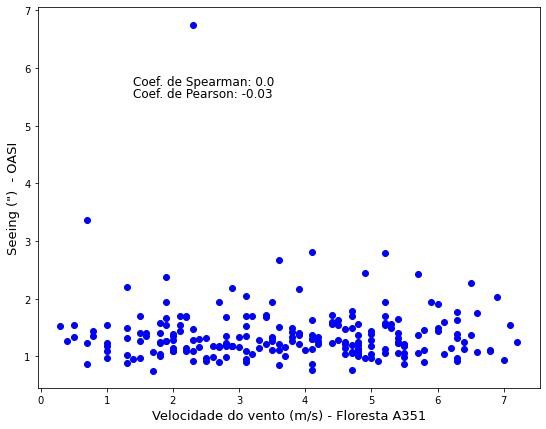

In [176]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Vel. Vento (m/s)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Vel. Vento (m/s)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Vel. Vento (m/s)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(1.4, 5.5, pearson, fontsize = 12)
plt.text(1.4, 5.7, spearman, fontsize = 12)
#plt.ylim(756,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel('Velocidade do vento (m/s) - Floresta A351', size = 13)
plt.savefig('ventovel_corr_Floresta.png')
plt.show()

#### **pressao**

In [145]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

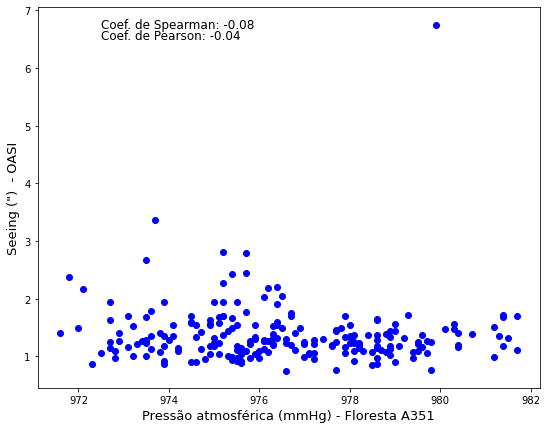

In [177]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(972.5, 6.5, pearson, fontsize = 12)
plt.text(972.5, 6.7, spearman, fontsize = 12)
#plt.ylim(972,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel('Pressão atmosférica (mmHg) - Floresta A351', size = 13)
plt.savefig('pressao_corr_Floresta.png')
plt.show()

#### **umidade**

In [162]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

<ipython-input-179-83e8adef50ea>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem


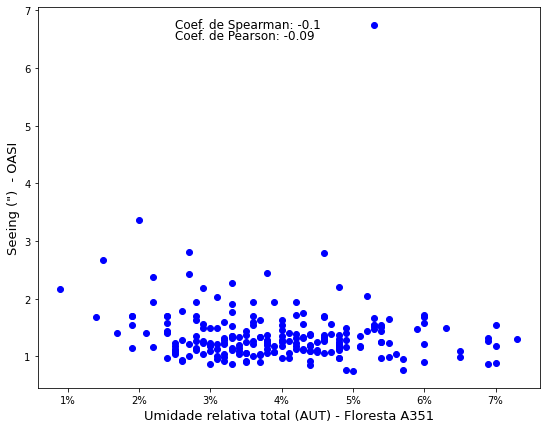

In [179]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Umi. Ins. (%)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Umi. Ins. (%)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Umi. Ins. (%)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(35, 6.5, pearson, fontsize = 12)
plt.text(35, 6.7, spearman, fontsize = 12)
plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Umidade relativa total (AUT) - Floresta A351', size = 13)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.savefig('umidade_corr_Floresta.png')
plt.show()

#### **temperatura**

In [164]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

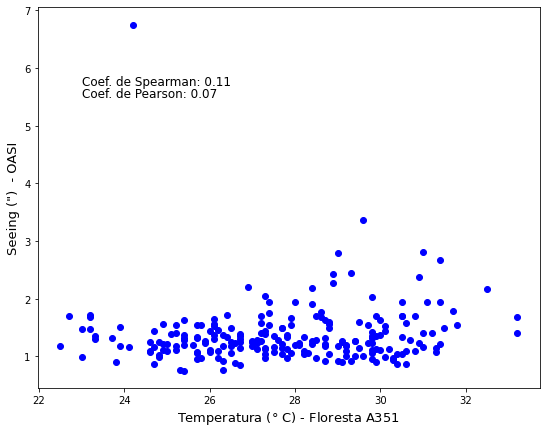

In [180]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Temp. Ins. (C)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Temp. Ins. (C)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Temp. Ins. (C)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(23, 5.5, pearson, fontsize = 12)
plt.text(23, 5.7, spearman, fontsize = 12)
#plt.ylim(756,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel(r'Temperatura ($\degree$ C) - Floresta A351', size = 13)
plt.savefig('temp_corr_Floresta.png')
plt.show()

### **correlação Floresta**

In [171]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

##### **velocidade**

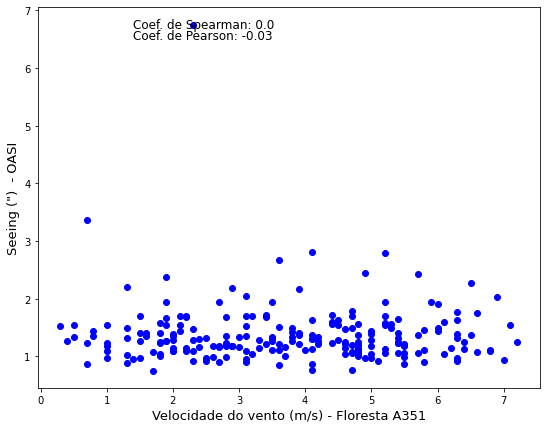

In [153]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Vel. Vento (m/s)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Vel. Vento (m/s)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Vel. Vento (m/s)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(1.4, 6.5, pearson, fontsize = 12)
plt.text(1.4, 6.7, spearman, fontsize = 12)
#plt.ylim(756,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel('Velocidade do vento (m/s) - Floresta A351', size = 13)
plt.savefig('ventovel_corr_Floresta.png')
plt.show()

#### **pressao**

In [145]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

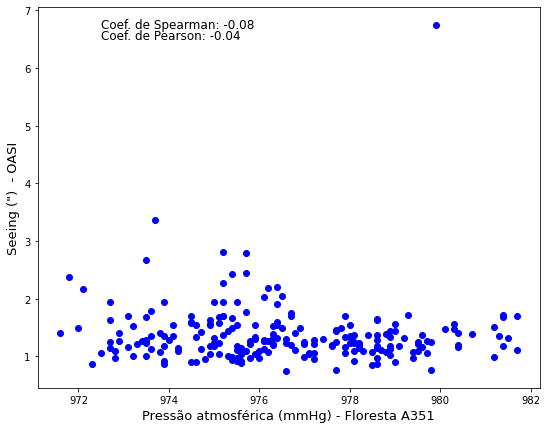

In [160]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Pressao Ins. (hPa)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(972.5, 6.5, pearson, fontsize = 12)
plt.text(972.5, 6.7, spearman, fontsize = 12)
#plt.ylim(972,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel('Pressão atmosférica (mmHg) - Floresta A351', size = 13)
plt.savefig('pressao_corr_Floresta.png')
plt.show()

#### **umidade**

In [162]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

<ipython-input-163-578e941d3a69>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem


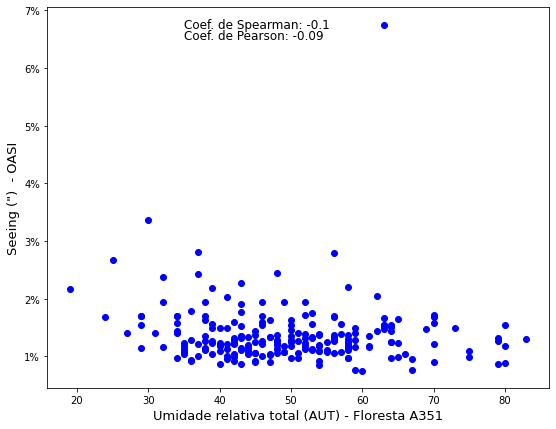

In [163]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Umi. Ins. (%)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Umi. Ins. (%)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Umi. Ins. (%)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(35, 6.5, pearson, fontsize = 12)
plt.text(35, 6.7, spearman, fontsize = 12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Umidade relativa total (AUT) - Floresta A351', size = 13)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.savefig('umidade_corr_Floresta.png')
plt.show()

#### **temperatura**

In [164]:
df_meteo_seeing_Floresta

Datetime    Seeing  Temp. Ins. (C)  Umi. Ins. (%)  Pressao Ins. (hPa)  \
0   2014-01-26  1.357874            27.5           50.0               973.9   
1   2014-01-28  1.259835            27.0           56.0               975.8   
2   2014-01-29  1.126697            27.3           53.0               975.6   
3   2014-02-03  1.251023            29.1           50.0               972.7   
4   2014-02-04  1.631509            28.7           47.0               972.7   
..         ...       ...             ...            ...                 ...   
214 2019-08-30  1.164270            24.7           59.0               979.6   
215 2019-08-31  1.247055            24.6           64.0               979.8   
216 2019-09-05  1.369834            25.4           58.0               979.6   
217 2019-09-06  1.569263            26.1           53.0               980.3   
218 2019-10-26  2.276953            28.9           43.0               975.2   

     Vel. Vento (m/s)  Dir. Vento (º)  Chuva (mm)  
0                 2.8            90.0         0.0  
1                 3.5           120.0         0.0  
2                 4.8           130.0         0.0  
3                 7.2           140.0         0.0  
4                 4.1           138.0         0.0  
..                ...             ...         ...  
214               3.7           138.0         0.0  
215               4.6           150.0         0.0  
216               3.9           150.0         0.0  
217               4.8           142.0         0.0  
218               6.5           126.0         0.0  

[219 rows x 8 columns]

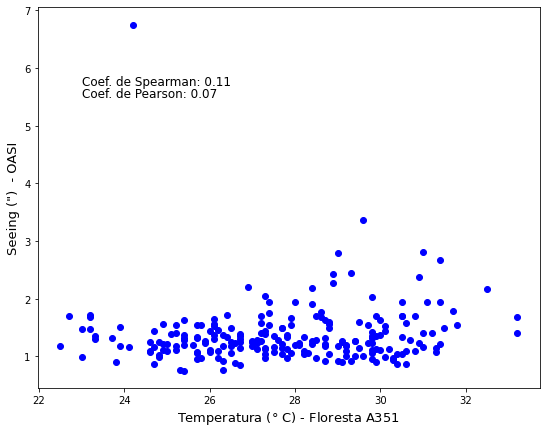

In [166]:
#correlacao de pearson pelo scipy
corr_pearson_scipy, p_value_pearson = pearsonr(df_meteo_seeing_Floresta['Temp. Ins. (C)'],
                               df_meteo_seeing_Floresta['Seeing'])

#correlacao de spearman pelo scipy
corr_spearman_scipy, p_value_spearman = spearmanr(df_meteo_seeing_Floresta['Temp. Ins. (C)'],
                               df_meteo_seeing_Floresta['Seeing'])

corr_pearson_scipy = int(corr_pearson_scipy*100)/100
corr_spearman_scipy = int(corr_spearman_scipy*100)/100

#print('Correlacao de Pearson: {}'.format(corr_pearson_scipy))
#print('Correlacao de Spearman: {}'.format(corr_spearman_scipy))

plt.figure(figsize = (9,7))
plt.scatter(df_meteo_seeing_Floresta['Temp. Ins. (C)'], df_meteo_seeing_Floresta['Seeing'], color = 'blue')
pearson = 'Coef. de Pearson: ' + str(corr_pearson_scipy)
spearman = 'Coef. de Spearman: ' + str(corr_spearman_scipy)
plt.text(23, 5.5, pearson, fontsize = 12)
plt.text(23, 5.7, spearman, fontsize = 12)
#plt.ylim(756,764)
#plt.xlim(972,980)
plt.ylabel('Seeing (")  - OASI', size = 13)
plt.xlabel(r'Temperatura ($\degree$ C) - Floresta A351', size = 13)
plt.savefig('temp_corr_Floresta.png')
plt.show()

# **Plots - OASI + FLORESTA**

## **precipitação**

In [ ]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,pd.Series([i/24 for i in df_2014['Rain']]), label = 2014, color = 'navy')
plt.scatter(dt_2015,pd.Series([i/24 for i in df_2015['Rain']]), label = 2015, color = 'blue')
plt.scatter(dt_2016,pd.Series([i/24 for i in df_2016['Rain']]), label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,pd.Series([i/24 for i in df_2017['Rain']]), label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,pd.Series([i/24 for i in df_2018['Rain']]), label = 2018, color = 'royalblue')
plt.scatter(dt_2019,pd.Series([i/24 for i in df_2019['Rain']]), label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.ylim(0,3)
plt.grid(axis = 'x')
#plt.legend(loc = 'upper left')
plt.subplot(1,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.ylim(0,3)
plt.xlim(0,6)
#plt.ylim(bottom = 0)
plt.grid(axis = 'x')
plt.savefig('chuva_OASI_Floresta_2014-2019.png')

## **umidade**

In [ ]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'darkblue')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
#plt.legend()
plt.subplot(1,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
#plt.ylim(14,25)
plt.ylim(25, 90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.grid(axis = 'x')

plt.savefig('umidade_OASI_Floresta_2014-2019.png')

## **velocidade do vento**

In [ ]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,df_2014['Wind'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Wind'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Wind'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Wind'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Wind'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Wind'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,6)
plt.ylim(0,10)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.subplot(1,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Wind Speed'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Wind Speed'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Wind Speed'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Wind Speed'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Wind Speed'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,6)
plt.ylim(0,10)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.savefig('ventovel_OASI_Floresta_2014-2019.png')

## **pressão**

In [113]:
df['Pressure'].min()

727.2538649333541

In [116]:
dados_dia['Pressure'].min()

756.0225641025648

In [114]:
df['Pressure'].max()

737.06717585

In [115]:
dados_dia['Pressure'].max()

764.1639473684227

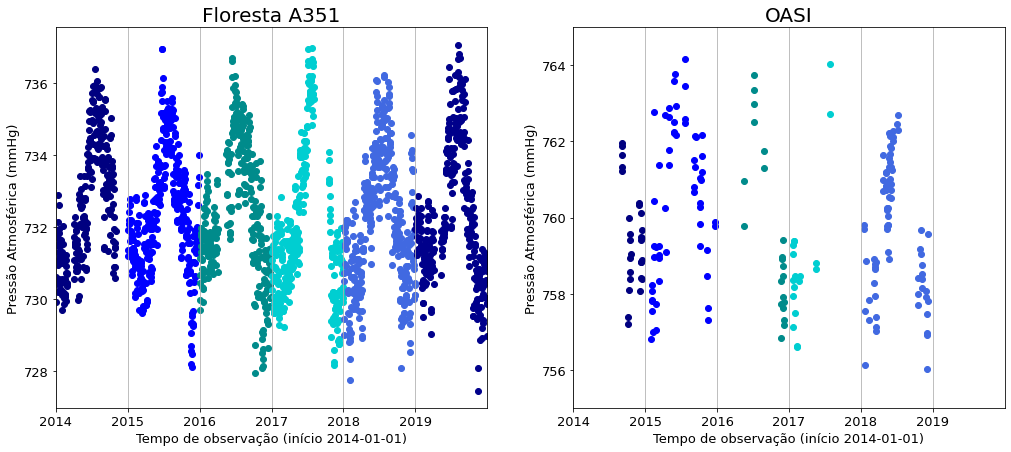

In [131]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,df_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Pressure'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,6)
#plt.ylim(755,765)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.subplot(1,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,6)
plt.ylim(755,765)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.savefig('pressao_OASI_Floresta_2014-2019.png')

## **temperatura**

In [ ]:
plt.figure(figsize = (17,7))
plt.subplot(1,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,df_2014['Temp'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Temp'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Temp'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Temp'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Temp'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Temp'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura ($\degree$ C)', size = 13)
plt.xlim(0,6)
plt.ylim(20,40)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.subplot(1,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Temp Ext'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Temp Ext'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Temp Ext'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Temp Ext'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Temp Ext'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura ($\degree$ C)', size = 13)
plt.xlim(0,6)
plt.ylim(20,40)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.savefig('temp_OASI_Floresta_2014-2019.png')

## **Precipitação + Velocidade + Umidade**

<ipython-input-213-75274cde7090>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
<ipython-input-213-75274cde7090>:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem


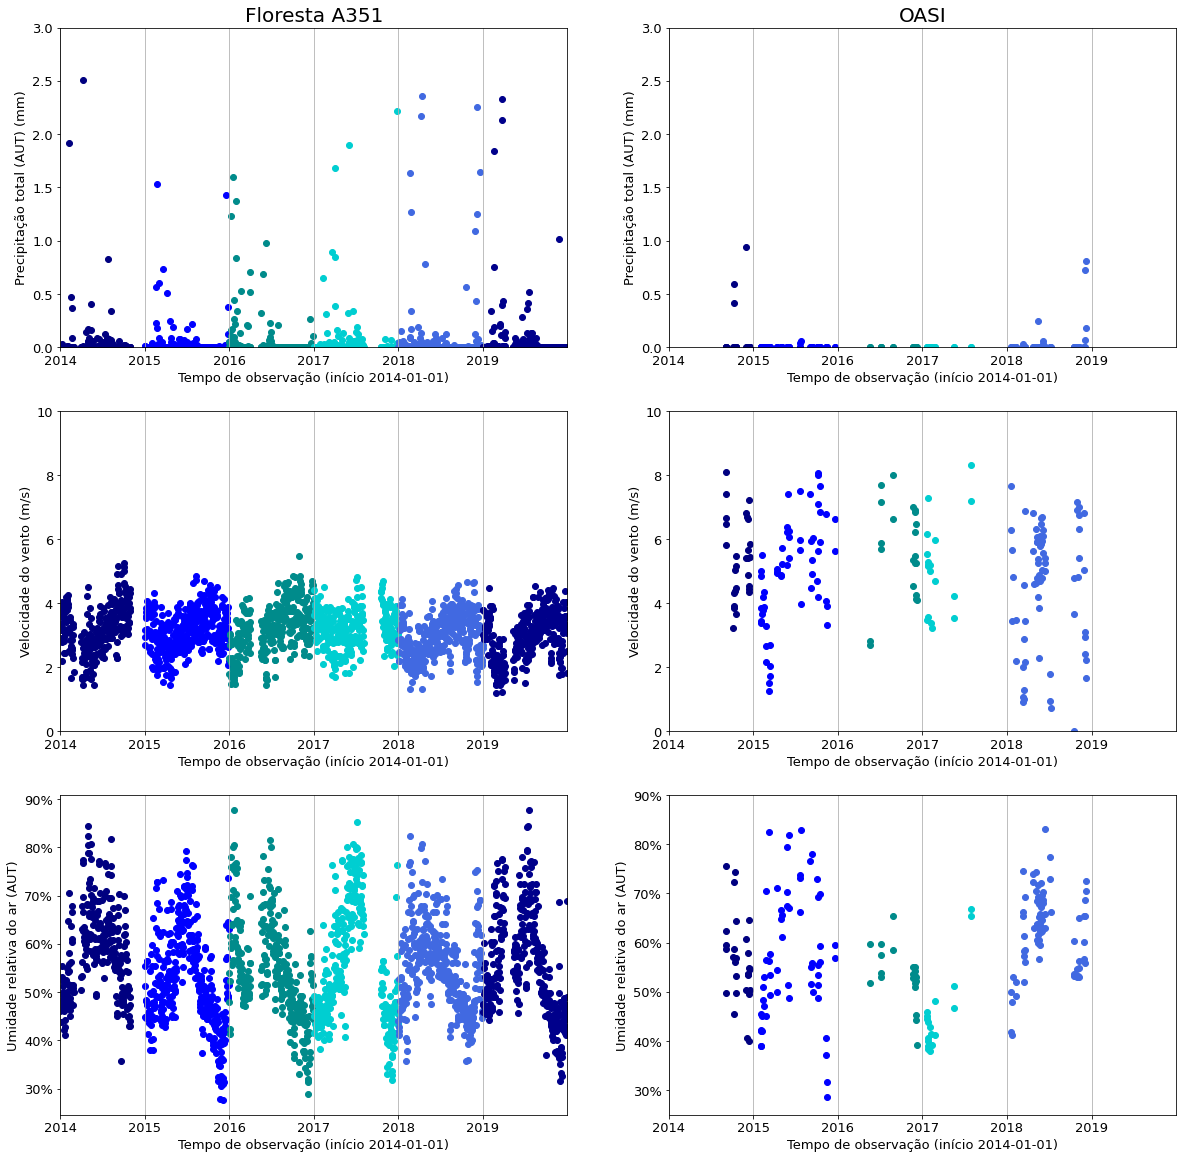

In [213]:
plt.figure(figsize = (20,20))



#### Precipitacao
plt.subplot(3,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,pd.Series([i/24 for i in df_2014['Rain']]), label = 2014, color = 'navy')
plt.scatter(dt_2015,pd.Series([i/24 for i in df_2015['Rain']]), label = 2015, color = 'blue')
plt.scatter(dt_2016,pd.Series([i/24 for i in df_2016['Rain']]), label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,pd.Series([i/24 for i in df_2017['Rain']]), label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,pd.Series([i/24 for i in df_2018['Rain']]), label = 2018, color = 'royalblue')
plt.scatter(dt_2019,pd.Series([i/24 for i in df_2019['Rain']]), label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.ylim(0,3)
plt.grid(axis = 'x')

plt.subplot(3,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Rain'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Rain'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Rain'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Rain'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Precipitação total (AUT) (mm)',size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.ylim(0,3)
plt.xlim(0,6)
plt.grid(axis = 'x')




#### Velocidade
plt.subplot(3,2,3)
plt.scatter(dt_2014,df_2014['Wind'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Wind'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Wind'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Wind'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Wind'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Wind'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,6)
plt.ylim(0,10)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.subplot(3,2,4)
plt.scatter(dt_2014_OASI,dados_dia_2014['Wind Speed'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Wind Speed'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Wind Speed'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Wind Speed'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Wind Speed'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Velocidade do vento (m/s)', size = 13)
plt.xlim(0,6)
plt.ylim(0,10)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')



#### Umidade
plt.subplot(3,2,5)
plt.scatter(dt_2014,df_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Hum'], label = 2019, color = 'darkblue')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xlim(0,6)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.subplot(3,2,6)
plt.scatter(dt_2014_OASI,dados_dia_2014['Hum'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Hum'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Hum'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Hum'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Hum'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylim(25, 90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.ylabel('Umidade relativa do ar (AUT)', size = 13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size = 13)
plt.xlim(0,6)
plt.grid(axis = 'x')


plt.savefig('chuva-vel-um_OASI_Floresta_2014-2019.png')

## **Pressão + Temperatura**

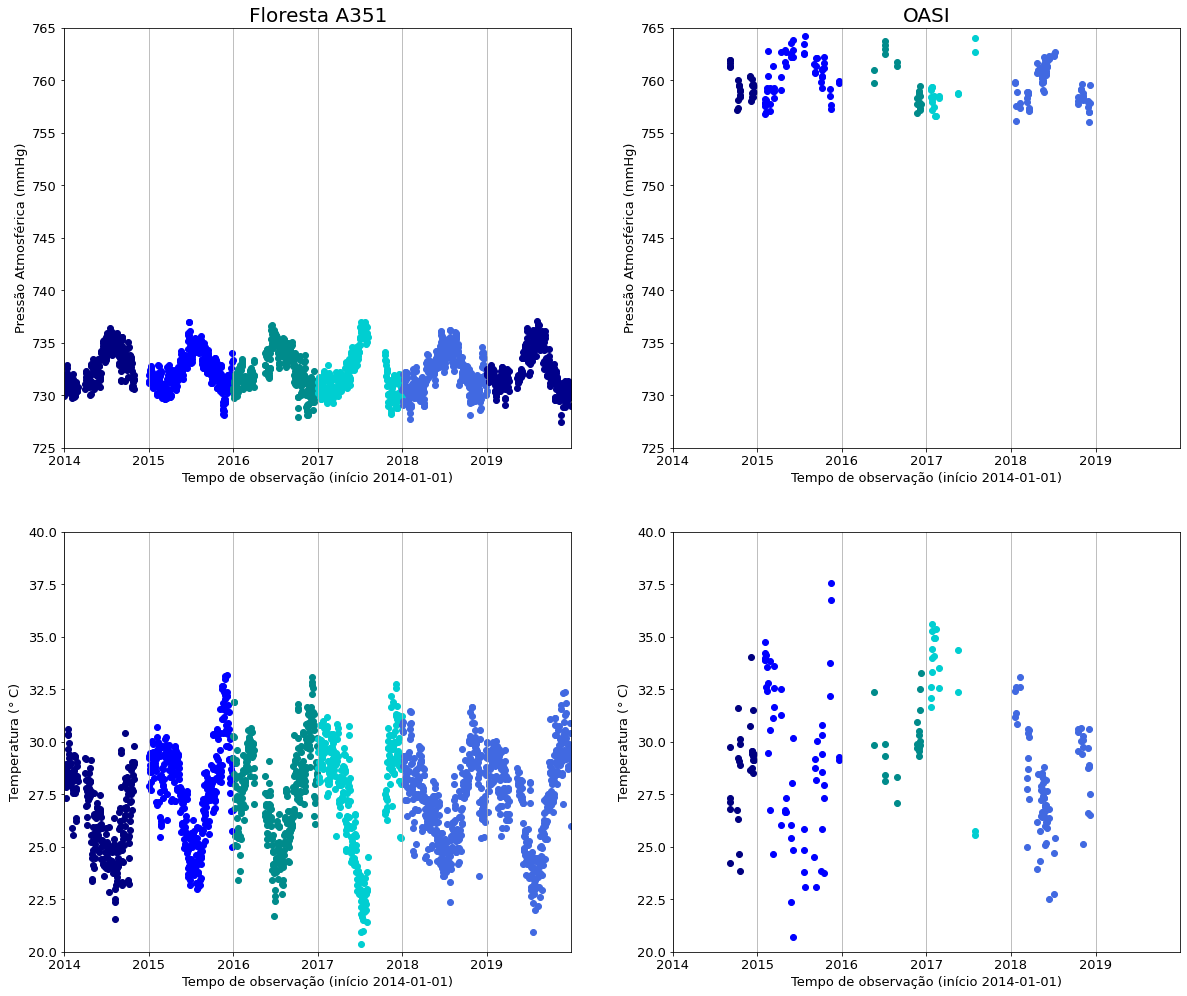

In [212]:
plt.figure(figsize = (20,17))

### Pressao
plt.subplot(2,2,1)
plt.title('Floresta A351', size = 20)
plt.scatter(dt_2014,df_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Pressure'], label = 2019, color = 'darkblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,6)
plt.ylim(725,765)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.subplot(2,2,2)
plt.title('OASI', size = 20)
plt.scatter(dt_2014_OASI,dados_dia_2014['Pressure'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Pressure'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Pressure'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Pressure'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Pressure'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Pressão Atmosférica (mmHg)', size = 13)
plt.xlim(0,6)
plt.ylim(725,765)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')





### Temperatura
plt.subplot(2,2,3)
plt.scatter(dt_2014,df_2014['Temp'], label = 2014, color = 'navy')
plt.scatter(dt_2015,df_2015['Temp'], label = 2015, color = 'blue')
plt.scatter(dt_2016,df_2016['Temp'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017,df_2017['Temp'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018,df_2018['Temp'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019,df_2019['Temp'], label = 2019, color = 'royalblue')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura ($\degree$ C)', size = 13)
plt.xlim(0,6)
plt.ylim(20,40)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018', '2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')

plt.subplot(2,2,4)
plt.scatter(dt_2014_OASI,dados_dia_2014['Temp Ext'], label = 2014, color = 'navy')
plt.scatter(dt_2015_OASI,dados_dia_2015['Temp Ext'], label = 2015, color = 'blue')
plt.scatter(dt_2016_OASI,dados_dia_2016['Temp Ext'], label = 2016, color = 'darkcyan')
plt.scatter(dt_2017_OASI,dados_dia_2017['Temp Ext'], label = 2017, color = 'darkturquoise')
plt.scatter(dt_2018_OASI,dados_dia_2018['Temp Ext'], label = 2018, color = 'royalblue')
plt.scatter(dt_2019_OASI,pd.Series(np.zeros(len(dt_2019_OASI))), label = 2019, color = 'white')
plt.xlabel('Tempo de observação ' + '(início 2014-01-01)' ,size = 13)
plt.ylabel('Temperatura ($\degree$ C)', size = 13)
plt.xlim(0,6)
plt.ylim(20,40)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')



plt.savefig('pressaoxtemperatura_OASI_Floresta_2014-2019.png')

# **Plots - Rosa dos ventos OASI + FLORESTA**

## 2014

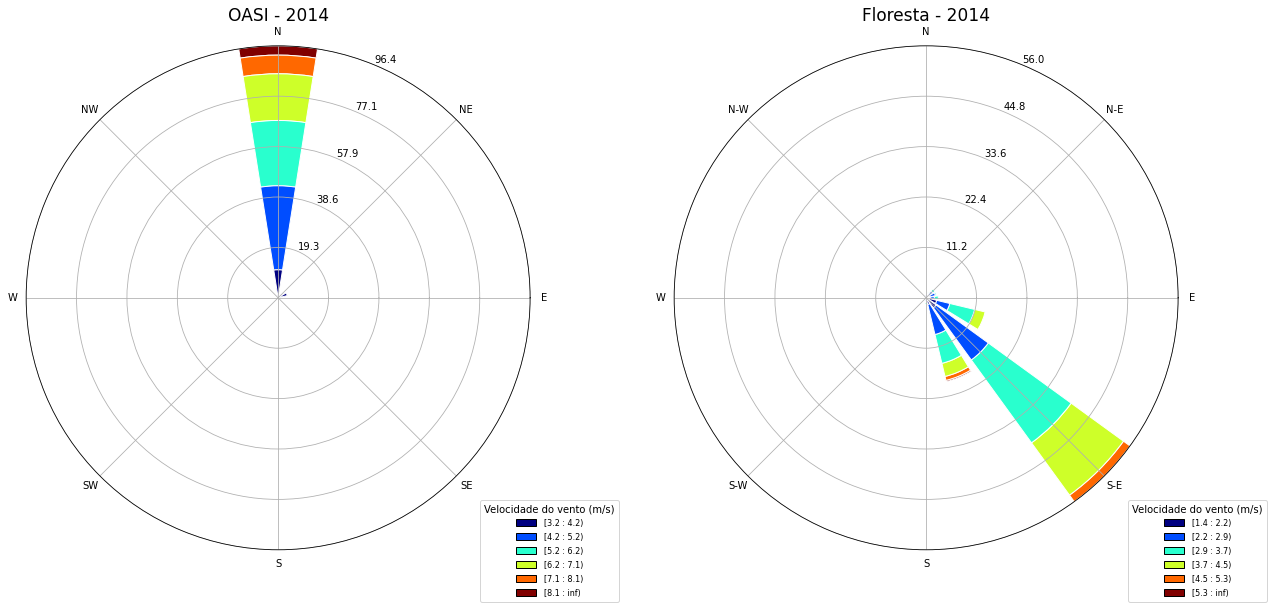

In [520]:
fig = plt.figure()


###OASI
rect = [0.1, 0, 1, 1]  #[lowerleft_x,lowerleft_y,width,height]
ax = WindroseAxes(fig, rect)

fig.add_axes(ax)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.bar(df_OASI_2014_mode['Angles'], df_OASI_2014_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2014', size = 17)


#ax = WindroseAxes.from_ax()
#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade
#ws =[0,4,5,5,6]
#wd =[0,0,0,0,22.5]



###FLORESTA

rect1 = [1, 0, 1, 1]
ax2 = WindroseAxes(fig, rect1)
fig.add_axes(ax2)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#ws =[0,4,5,5,6]
ws = df_2014_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2014_median_mode['Dir. Vento (º)'].values

ax2.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax2.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2014', size = 17)


#ax2 = WindroseAxes.from_ax()


#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade


plt.savefig('rosadosventos_2014')
plt.show()

## 2015

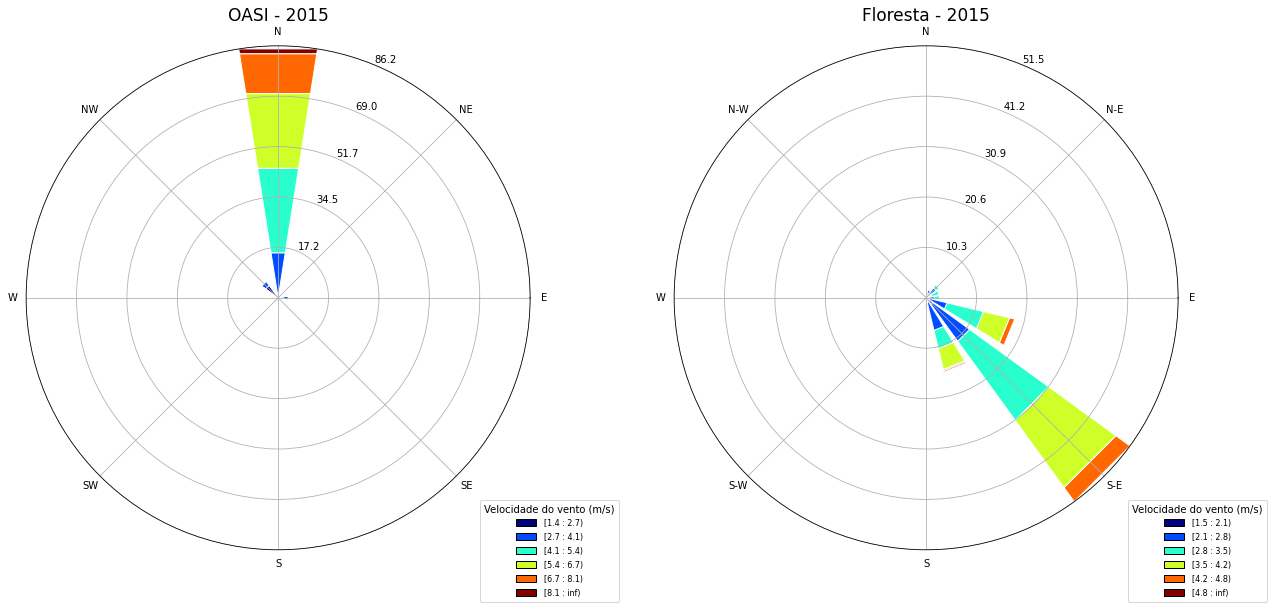

In [201]:
fig = plt.figure()


###OASI
rect = [0.1, 0, 1, 1]  #[lowerleft_x,lowerleft_y,width,height]
ax = WindroseAxes(fig, rect)

fig.add_axes(ax)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.bar(df_OASI_2015_mode['Angles'], df_OASI_2015_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2015', size = 17)


#ax = WindroseAxes.from_ax()
#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade
#ws =[0,4,5,5,6]
#wd =[0,0,0,0,22.5]



###FLORESTA

rect1 = [1, 0, 1, 1]
ax2 = WindroseAxes(fig, rect1)
fig.add_axes(ax2)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#ws =[0,4,5,5,6]
ws = df_2015_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2015_median_mode['Dir. Vento (º)'].values

ax2.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax2.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2015', size = 17)


#ax2 = WindroseAxes.from_ax()


#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade


plt.savefig('rosadosventos_2015')
plt.show()

## 2016

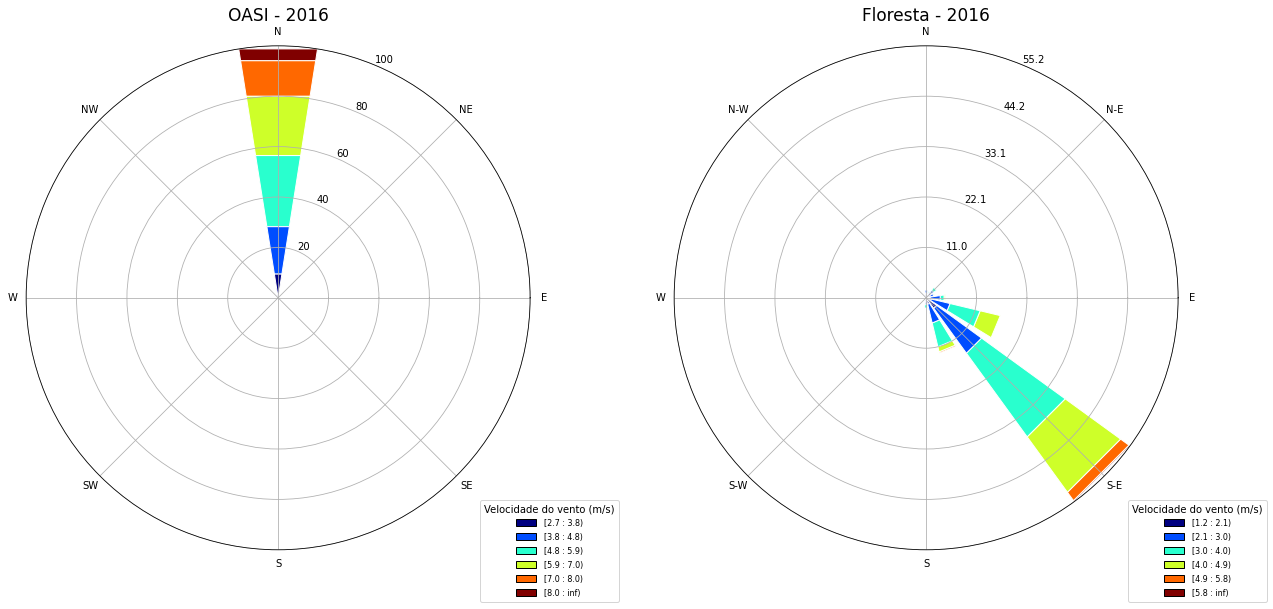

In [202]:
fig = plt.figure()


###OASI
rect = [0.1, 0, 1, 1]  #[lowerleft_x,lowerleft_y,width,height]
ax = WindroseAxes(fig, rect)

fig.add_axes(ax)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.bar(df_OASI_2016_mode['Angles'], df_OASI_2016_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2016', size = 17)


#ax = WindroseAxes.from_ax()
#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade
#ws =[0,4,5,5,6]
#wd =[0,0,0,0,22.5]



###FLORESTA

rect1 = [1, 0, 1, 1]
ax2 = WindroseAxes(fig, rect1)
fig.add_axes(ax2)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#ws =[0,4,5,5,6]
ws = df_2016_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2016_median_mode['Dir. Vento (º)'].values

ax2.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax2.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2016', size = 17)


#ax2 = WindroseAxes.from_ax()


#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade


plt.savefig('rosadosventos_2016')
plt.show()

## 2017

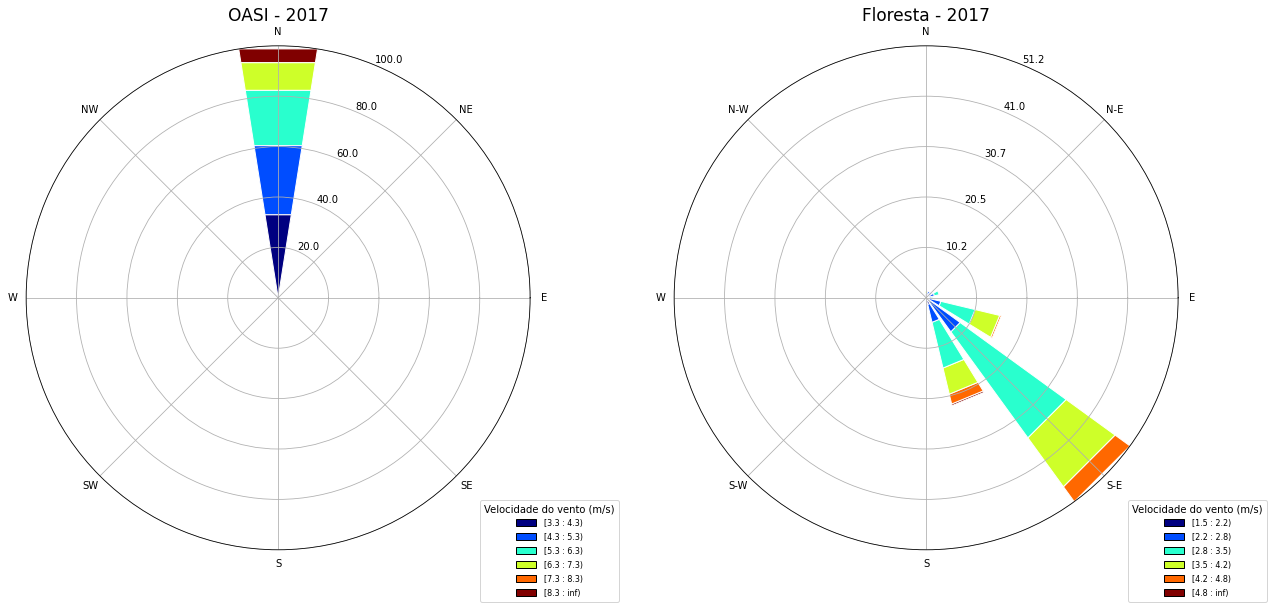

In [203]:
fig = plt.figure()


###OASI
rect = [0.1, 0, 1, 1]  #[lowerleft_x,lowerleft_y,width,height]
ax = WindroseAxes(fig, rect)

fig.add_axes(ax)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.bar(df_OASI_2017_mode['Angles'], df_OASI_2017_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2017', size = 17)


#ax = WindroseAxes.from_ax()
#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade
#ws =[0,4,5,5,6]
#wd =[0,0,0,0,22.5]



###FLORESTA

rect1 = [1, 0, 1, 1]
ax2 = WindroseAxes(fig, rect1)
fig.add_axes(ax2)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#ws =[0,4,5,5,6]
ws = df_2017_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2017_median_mode['Dir. Vento (º)'].values

ax2.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax2.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2017', size = 17)


#ax2 = WindroseAxes.from_ax()


#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade


plt.savefig('rosadosventos_2017')
plt.show()

## 2018

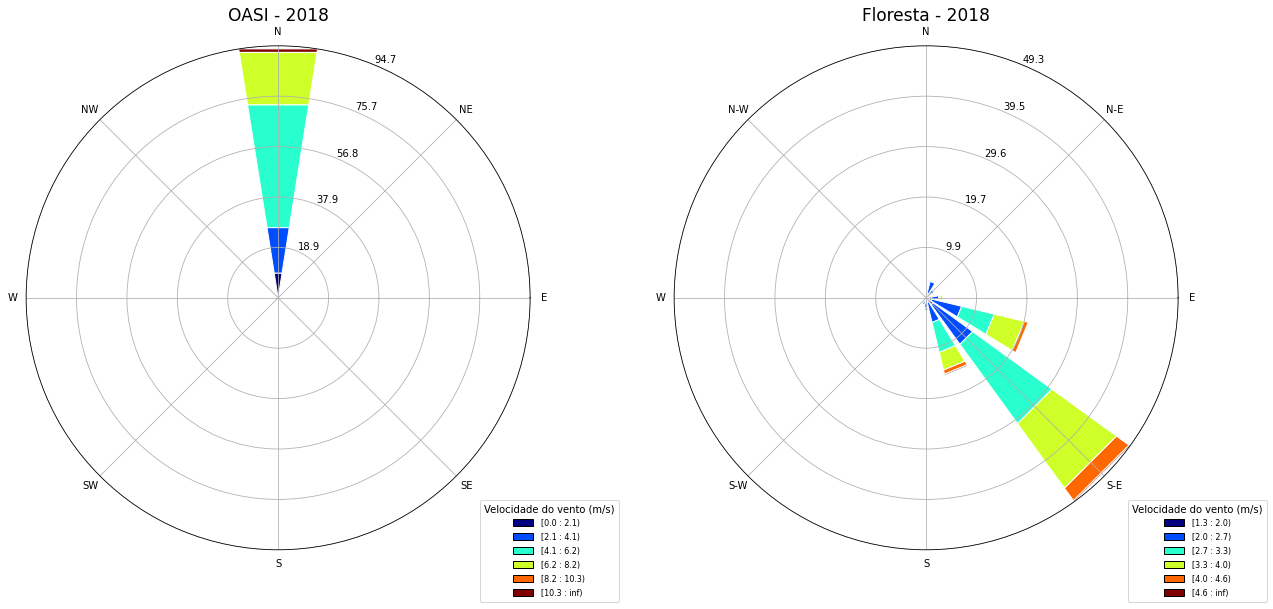

In [204]:
fig = plt.figure()


###OASI
rect = [0.1, 0, 1, 1]  #[lowerleft_x,lowerleft_y,width,height]
ax = WindroseAxes(fig, rect)

fig.add_axes(ax)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.bar(df_OASI_2018_mode['Angles'], df_OASI_2018_WindSpeed_median['Wind Speed'], normed='true',opening=0.8, edgecolor='white')

ax.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('OASI - 2018', size = 17)


#ax = WindroseAxes.from_ax()
#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade
#ws =[0,4,5,5,6]
#wd =[0,0,0,0,22.5]



###FLORESTA

rect1 = [1, 0, 1, 1]
ax2 = WindroseAxes(fig, rect1)
fig.add_axes(ax2)
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

#ws =[0,4,5,5,6]
ws = df_2018_mean['Vel. Vento (m/s)'].values

#wd =[0,0,0,0,22.5]
wd = df_2018_median_mode['Dir. Vento (º)'].values

ax2.bar(wd, ws, normed='true',opening=0.8, edgecolor='white')

ax2.set_legend(title = 'Velocidade do vento (m/s)', bbox_to_anchor=(1, 0), loc='upper left',
              borderaxespad=-5)
plt.title('Floresta - 2018', size = 17)


#ax2 = WindroseAxes.from_ax()


#wd -> moda da direção do vento
#ws -> mediana do modulo da velocidade


plt.savefig('rosadosventos_2018')
plt.show()